# Índice del proyecto
1. Introduccion al proyecto
2. Preparacion de los datos
    
    2.1 Informacion sobre el conjunto de datos
    
    2.2 Cargando los datos
    
    2.3 Exploración de los datos
    
        2.2.1 Valores nulos
        2.2.2 Duplicidad de registros
        2.2.3 Detección de ruido y/o outliers
        2.2.4 Atributos redundantes / Análisis de correlaciones
        
    2.4 Normalización de los datos
    
    2.5 Transformación de los datos
    
3. Reducción de datos 
    
    3.1 Selección de características y selección de instancias
    
    3.2 Método de envoltura
    
    3.3 Método integrado
    
    3.4 Análisis de componentes principales
    
4. Rebalanceo de variable objetivo y modelado
    
    4.1 Dataset utilizado df
        4.1.1 Sobremuestreo y modelado
        4.1.2 Submuestreo y modelado
    4.2 Dataset utilizado df_normalized_featureReduced_encoded
        4.2.1 Sobremuestreo y modelado
        4.2.2 Submuestreo y modelado
    4.3 Dataset utilizado df_normalized_encoded
        4.3.1 Sobremuestreo y modelado
        4.3.2 Submuestreo y modelado
        4.3.3 Sin balanceamiento de datos
    4.4 Dataset utilizado df_PCA
        4.3.1 Sobremuestreo y modelado

5. Tabla comparativa de resultados utilizando los diferentes conjuntos de datos

6. Comparativa de modelos de clasificación

    6.1 DecisionTree Classifier
        6.1.1 Validación Cruzada con submuestreo y datos sin normalizar
        6.1.2 Validación Cruzada con sobremuestreo y datos sin normalizar
        6.1.3 Validación Cruzada con submuestreo, datos normalizados y reducción de características
        6.1.4 Validación Cruzada con sobremuestreo, datos normalizados y reducción de características
        6.1.5 Validación Cruzada con submuestreo y variables normalizadas
        6.1.6 Validación Cruzada con sobremuestreo y variables normalizadas
        6.1.7 Validación Cruzada con sobremuestreo aplicado a componentes principales
        
	6.2 RandomForest Classifier
		6.2.1 Validación Cruzada con submuestreo y datos sin normalizar
		6.2.2 Validación Cruzada con sobremuestreo y datos sin normalizar
		6.2.3 Validación Cruzada con submuestreo, datos normalizados y reducción de características
		6.2.4 Validación Cruzada con sobremuestreo, datos normalizados y reducción de características
		6.2.5 Validación Cruzada con submuestreo y variables normalizadas
		6.2.6 Validación Cruzada con sobremuestreo y variables normalizadas
		6.2.7 Validación Cruzada con sobremuestreo aplicado a componentes principales
        
	6.3 SupportVectorMachine Classifier
		6.3.1 Validación Cruzada con submuestreo y datos sin normalizar
		6.3.2 Validación Cruzada con sobremuestreo y datos sin normalizar
		6.3.3 Validación Cruzada con submuestreo, datos normalizados y reducción de características
		6.3.4 Validación Cruzada con sobremuestreo, datos normalizados y reducción de características
		6.3.5 Validación Cruzada con submuestreo y variables normalizadas
		6.3.6 Validación Cruzada con sobremuestreo y variables normalizadas
		6.3.7 Validación Cruzada con sobremuestreo aplicado a componentes principales
	6.4 Tabla comparativa de modelos
    
7. Clustering del conjunto de datos

    7.1 Clustering con Kmeans
    	7.1  Clustering con las variables age, job, marital y education y 100 registros
		7.2 Clustering con las variables age,job, marital, education, housing y loan y 100 registros
        
	7.2 Clustering jerárquico

# Proyecto Final Preprocesado de datos

## 1. Introducción al proyecto
En este proyecto vamos a desarrollar todas las etapas de un preprocesado de un conjunto de datos. Esto incluirá la análisis, exploración, preparación, imputación, borrado, normalización y transformación de los datos. En este caso nuestro conjunto de datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una entidad bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y). 

## 2. Preparación de los datos
### 2.1. Información sobre el conjunto de datos

Este conjunto de datos se basa en el conjunto de datos UCI "Bank Marketing" (consulte la descripción en: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Los datos se han enriquecido con la adición de cinco nuevas características/atributos sociales y económicos (indicadores nacionales de un país de unos 10 millones de habitantes), publicados por el Banco de Portugal y disponibles públicamente en: https://www.bportugal.pt/estatisticasweb.

Tenemos variables que van desde información más personal sobre la persona como su edad, trabajo, estado marital y educación, hasta información financiera como por ejemplo si tiene una hipoteca o un préstamo. A partir de aquí nos podemos encontrar datos sobre las acciones pasadas de marketing, duraciones de la llamada, si se ha contactado, etc.

El objetivo de la clasificación binaria es predecir si el cliente suscribirá un depósito bancario a plazo (variable y).

Número de registros: 41188 

Número de atributos: 20 + atributos de salida


**Nota**:Valores de atributos que faltan: Hay varios valores perdidos en algunos atributos categóricos, todos codificados con la etiqueta **Unknown**. Estos valores perdidos pueden tratarse como una posible etiqueta de clase o utilizando técnicas de supresión o imputación.





## 2.1 Cargando los datos

En este apartado vamos a importar las diferentes librerías que nos hacen falta para realizar las distintas operaciones que haremos a lo largo del proyecto. También cargaremos los datos en forma de dataframe, ya que es un formato ampliamente utilizado para el análisis de datos. 

In [ ]:
# Importamos los paquetes básicos
# ==============================================================================
import pandas as pd #tratamiento de los datos
import matplotlib.pyplot as plt #visualización de los datos
import numpy as np #operaciones numéricas
import seaborn as sns #visualización de los datos
import matplotlib #visualización de los datos
import multiprocessing

# EImportamos las herramientas para realizar las tareas de preprocesado, análisis 
# de correlaciones, Selección de características, etiquetado, 
# ==============================================================================
import scipy.stats as stats #operaciones estadísticas y de modelado
from scipy.stats import chi2_contingency #test de chi2
import warnings
from sklearn.preprocessing import OneHotEncoder #codificacion de variables categóricas sin perder propiedades de variable categóricas
from sklearn.preprocessing import LabelEncoder #codificación de variables categóricos a números correlativos
from sklearn import preprocessing #paquete para preprocesamiento de los datos
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso #modelos lineales
import statsmodels.api as sm

# Importamos los modelos de machine learning con los que vamos a trabajar
# ==============================================================================
from xgboost import XGBClassifier #clasificador Extreme Gradient Boosting
from sklearn.model_selection import train_test_split #paquete para crear conjuntos de test y entrenamiento
from sklearn.metrics import accuracy_score #métrica para evaluación de modelos
from sklearn.metrics import classification_report #reporte de métricas para evaluación de modelos
from sklearn.feature_selection import f_classif #correlación anova para correlaciones continuas y variable objetivo
from sklearn.metrics import confusion_matrix #matriz de correlaciones para evaluar modelos
from sklearn.tree import DecisionTreeClassifier# clasficador de Arboles de decision
from sklearn.tree import plot_tree # dibujar el árbol de decision
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV # búsqueda en malla de hiperparámetros
from sklearn.ensemble import RandomForestClassifier #clasficador de random forest
# from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC # clasificador de support vector machine

# Importamos las herramientas necesarias para realizar tareas de clustering
# ==============================================================================
from sklearn.cluster import KMeans # importamos el modelo k means
from scipy.cluster.hierarchy import dendrogram # importamos el paquete para dibujar dendogramas
from sklearn.cluster import AgglomerativeClustering # importamos el método de clustering aglomerativo
from sklearn.metrics import silhouette_score# importamos el método de silhouette para determinar nº de clústeres óptimos


warnings.filterwarnings('ignore') #ignorar warnings

# plotear en propia celda
%matplotlib inline 
# matplotlib.style.use('ggplot')

sns.set() #establecer por defecto el estilo de seaborn en los gráficos
plt.rcParams.update({'font.size': 30}) # establecer la fuente al tamaño 30.
#algunas gráficas mostraban la fuente de sus etiquetas y títulos bastante pequeños

In [ ]:
## Cargamos los datos utilizando la librería pandas
# ==============================================================================

df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [ ]:
## Mostramos los primeros 10 regitros de nuestro dataset
# ==============================================================================

df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.2 Exploración de los datos

Lo que haremos a continuación es inspeccionar los datos. Esto comprende acciones como ver cuantas variables tenemos, de qué tipo son, si hay valores nulos, ruido, outliers, y en general obtener una visión de los datos con los que vamos a trabajar.

In [ ]:
## Mostramos las columnas de nuestro dataset
# ==============================================================================

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
## Mostramos la información de tipo de variables
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Tenemos en total 21 columnas. Nuestra variable objetivo es 'y'. A continuación inspeccionaremos el dataset, para ver posibles datos interesantes como son la media, desviación típica o cuantos valores únicos tenemos en el caso de las variables categóricas.

In [ ]:
# Exploramos los datos
# ==============================================================================
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
# Observamos la filas y columnas que tiene nuestro conjunto de datos
# ==============================================================================

df.shape

(41188, 21)

### 2.2.1 Valores nulos
En este apartado inspeccionaremos los valores nulos. En cierta manera ya habíamos adelantado esta información en el apartado anterior, pero la veremos con más detalle a continuación.

In [ ]:
# Observación de valores nulos o valores faltantes.
# ==============================================================================

print('------------------------------')
print('Busqueda de valores nulos')
print('------------------------------\n')

df.isnull().sum()/len(df)

------------------------------
Busqueda de valores nulos
------------------------------



age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Observamos que no presenta valores nulos como tal, aunque si atendemos a la descripción indicada en la fuente de los datos, los valores nulos están marcados con la etiqueta **'unknown'**. Sabiendo esta informacíón, vamos a buscar específicamente estos valores. Utilizaremos un gráfico de barras para una representación más visual.

------------------------------
Busqueda de valores unknown
------------------------------



[Text(0.5, 1.0, 'Recuento de unknown'),
 Text(0, 0.5, 'Unknown encontrados'),
 Text(0.5, 0, 'Categorías')]

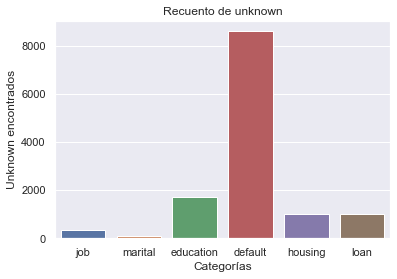

In [ ]:
# Buscamos los valores unknown
# ==============================================================================

print('------------------------------')
print('Busqueda de valores unknown')
print('------------------------------\n')


value=[]
value_2=[]
for a in df.columns:
#     print(a)
#     print(df[df[a]== 'unknown'].count()[0])
    value.append( a)
    value_2.append(df[df[a]== 'unknown'].count()[0])

## poner títulos a los ejes, titulo del gráfico y en generar etiquetar los gráficos
sns.barplot(x=value[1:7],y=value_2[1:7]).set(title='Recuento de unknown',
                                             ylabel = 'Unknown encontrados',xlabel='Categorías')


Una vez detectados los valores nulos, vemos que la única variable con una nº significativo de valores unknown es 'default', el resto no son significativos. Por ello, realizamos las siguientes acciones:
1. Eliminamos los registros del resto de variables donde toman el valor 'unknown'
2. Eliminamos la variable 'default' completamente.

In [ ]:

# Eliminamos los registros con 'unknown'
# ==============================================================================

df = df.drop(df[df['job']== 'unknown'].index)
df = df.drop(df[df['marital']== 'unknown'].index)
df = df.drop(df[df['education']== 'unknown'].index)
df = df.drop(df[df['housing']== 'unknown'].index)
df = df.drop(df[df['loan']== 'unknown'].index)

# eliminamos la variable 'default'
df=df.drop(columns='default')

df.shape

(38245, 20)

## 2.2.2 Duplicidad de registros
Eliminamos aquellos registros que sean idénticos.

In [ ]:
# Eliminamos registros duplicados
# ==============================================================================
df = df.drop_duplicates()
df.shape

(38232, 20)

## 2.2.3 Detección de ruido y/o outliers

En este apartado vamos a usar gráficos de tipo boxplot e histogramas para determinar si nuestro dataset posee ruido de clase o de atributo (valores erróneos dentro del conjunto), o si existie algún outliers(valores fuera de rango que son claramente erróneos). 

En primer lugar utilizamos Boxplot para representar las variables continuas de nuestro dataset. Un diagrama de caja no es nada más que un histograma visto por encima y, de la misma forma, un histograma es un diagrama de caja visto desde un lado. A continuación, se puede ver un ejemplo.

La primera característica que comparten ambos gráficos es el mínimo y el máximo del conjunto de datos. Las barras del extremo después de los guiones indican el mínimo (barra inferior) y el máximo (barra superior). Los datos atípicos estarían representados fuera del intervalo del máximo y el mínimo. Es decir, más allá de las barras después de los guiones. También podemos encontrar diagramas de caja horizontales, **que será nuestro caso.**

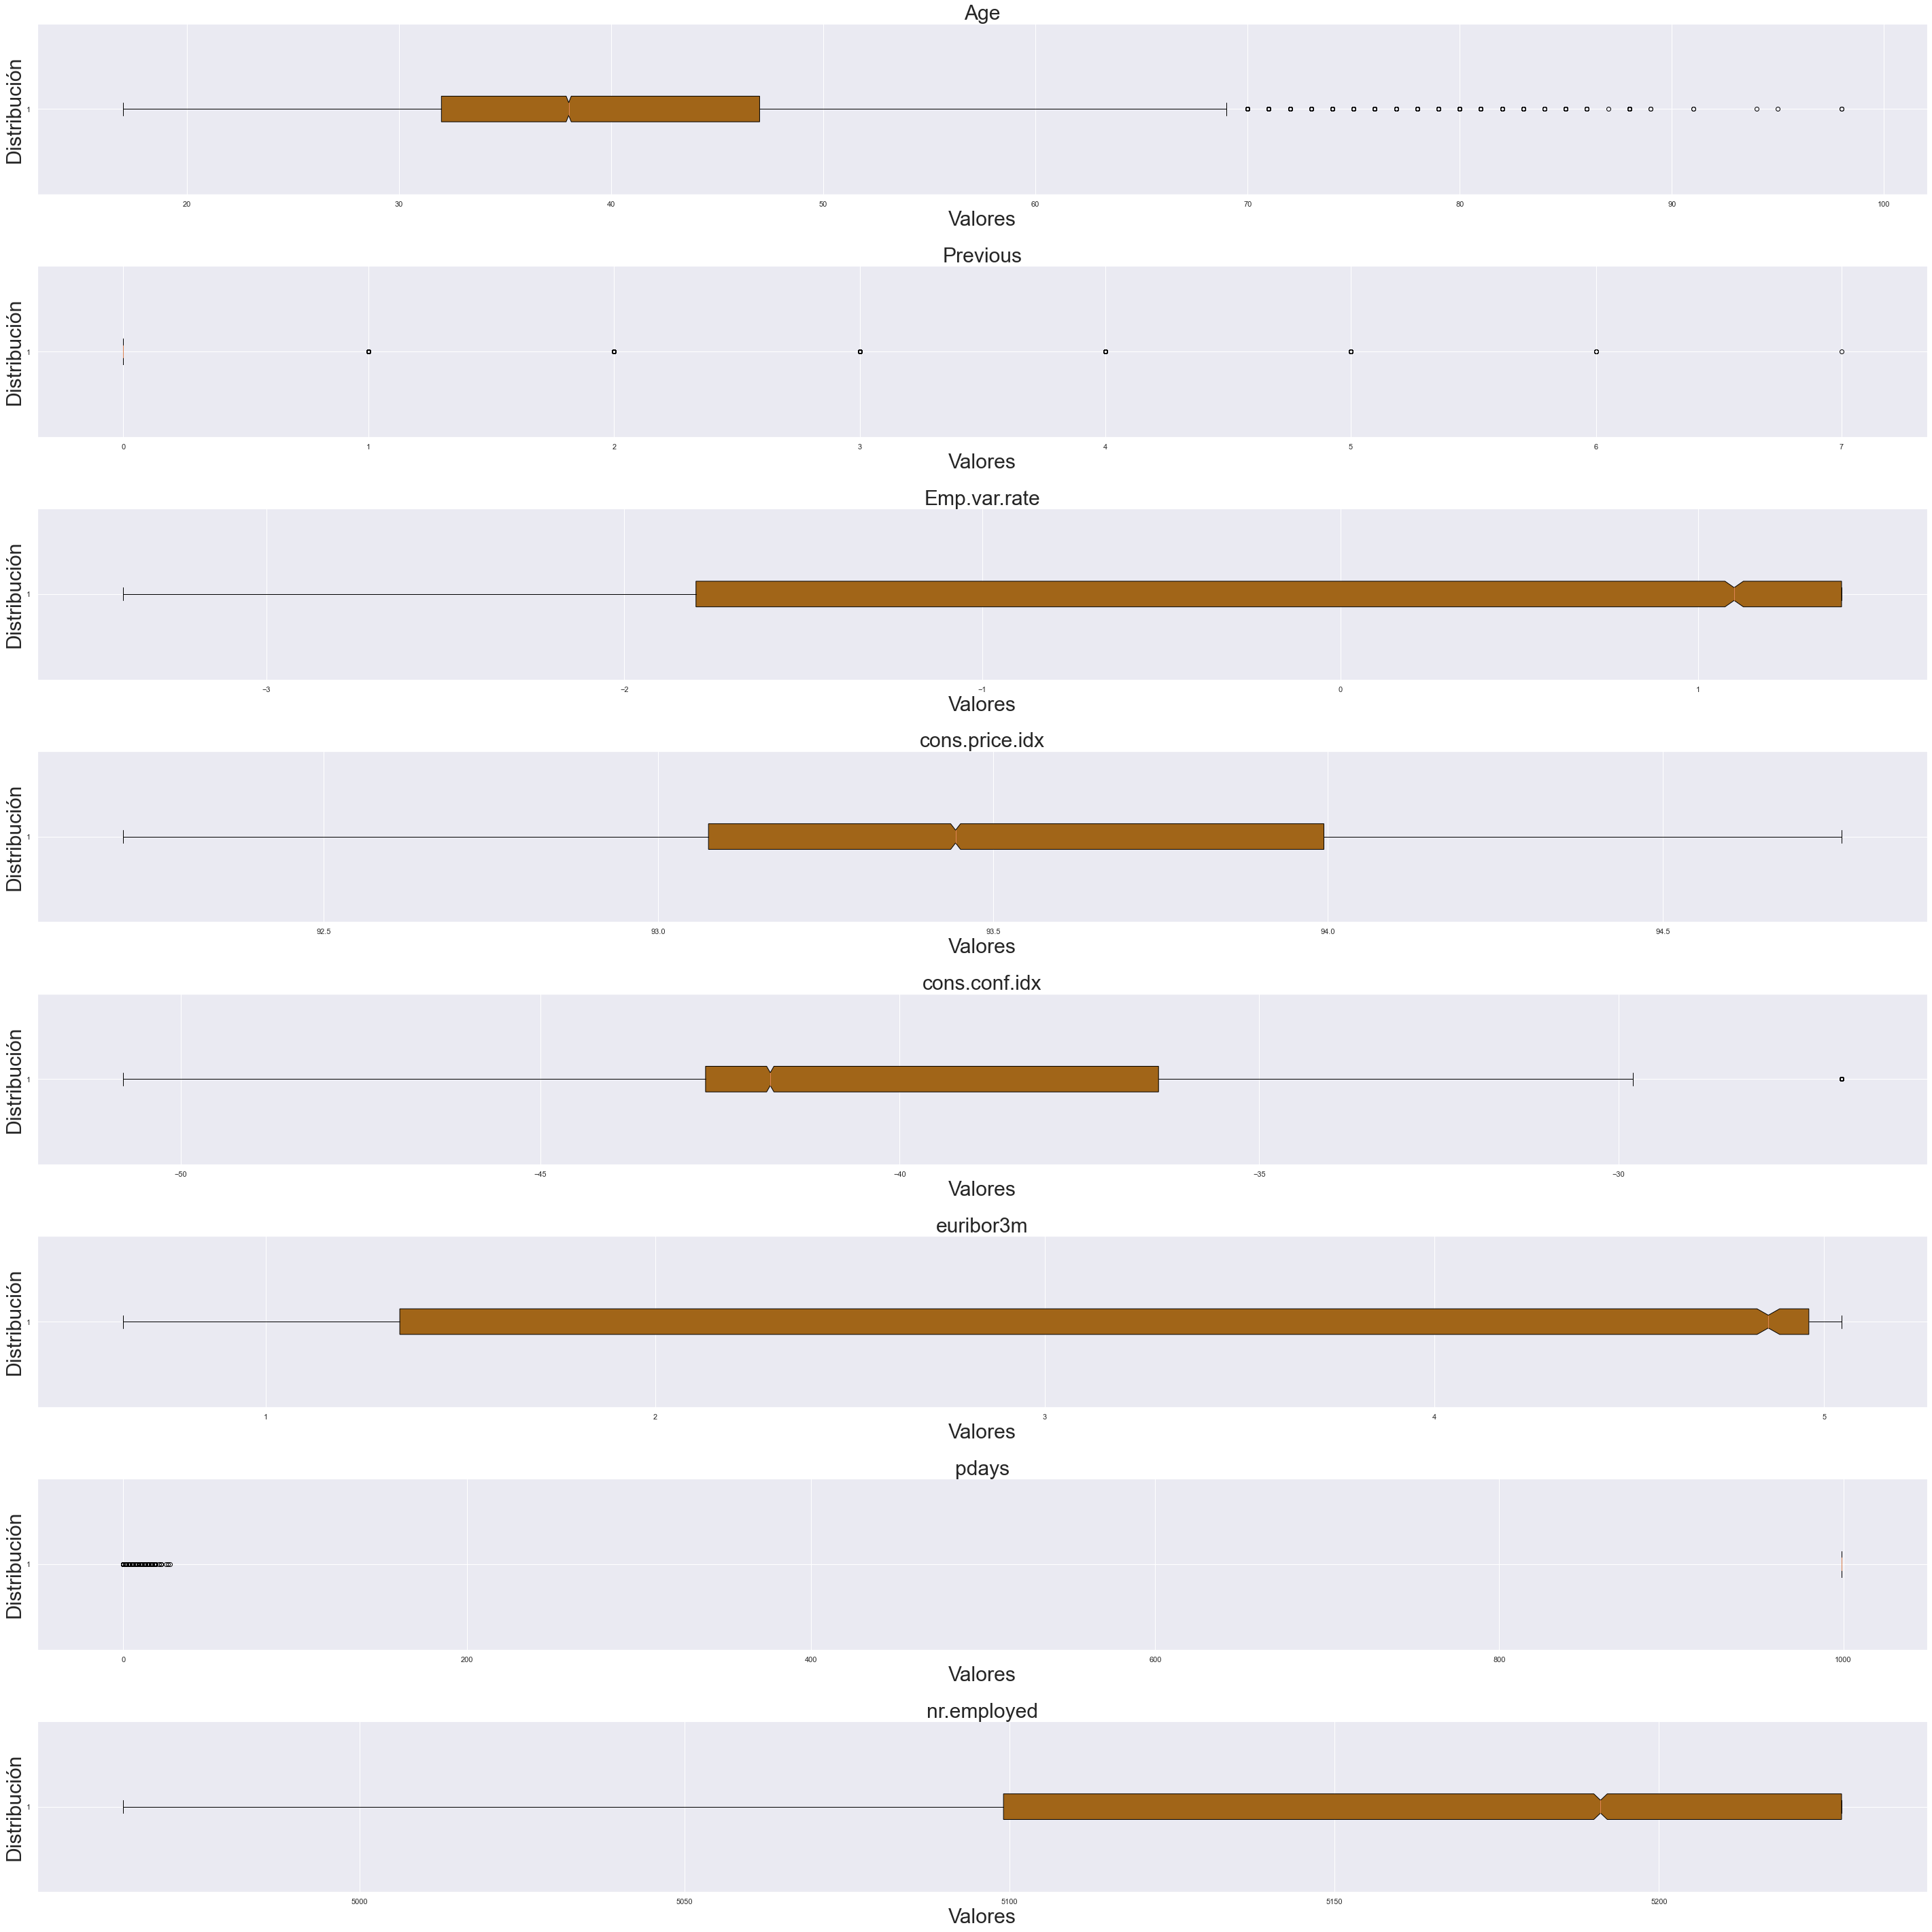

In [ ]:
# https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

# Utilizamos la visualización de boxplot para las variables numéricas
# ==============================================================================

fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=8, figsize =(40,40))
sns.set_palette('BrBG')

# Creamos las instancias de los ejes
# ==============================================================================
ax0.set_title('Age', fontsize=30)
ax0.set_xlabel('Valores', fontsize=30)
ax0.set_ylabel('Distribución', fontsize=30)
ax0.boxplot(df['age'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

ax1.set_title('Previous', fontsize=30)
ax1.set_xlabel('Valores', fontsize=30)
ax1.set_ylabel('Distribución', fontsize=30)
ax1.boxplot(df['previous'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

ax2.set_title('Emp.var.rate', fontsize=30)
ax2.set_xlabel('Valores', fontsize=30)
ax2.set_ylabel('Distribución', fontsize=30)
ax2.boxplot(df['emp.var.rate'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

ax3.set_title('cons.price.idx', fontsize=30)
ax3.set_xlabel('Valores', fontsize=30)
ax3.set_ylabel('Distribución', fontsize=30)
ax3.boxplot(df['cons.price.idx'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

ax4.set_title('cons.conf.idx', fontsize=30)
ax4.set_xlabel('Valores', fontsize=30)
ax4.set_ylabel('Distribución', fontsize=30)
ax4.boxplot(df['cons.conf.idx'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

ax5.set_title('euribor3m', fontsize=30)
ax5.set_xlabel('Valores', fontsize=30)
ax5.set_ylabel('Distribución', fontsize=30)
ax5.boxplot(df['euribor3m'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

ax6.set_title('pdays', fontsize=30)
ax6.set_xlabel('Valores', fontsize=30)
ax6.set_ylabel('Distribución', fontsize=30)
ax6.boxplot(df['pdays'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

ax7.set_title('nr.employed',  fontsize=30)
ax7.set_xlabel('Valores', fontsize=30)
ax7.set_ylabel('Distribución', fontsize=30)
ax7.boxplot(df['nr.employed'].squeeze(), patch_artist = True,
                notch ='True', vert = 0)

sns.set(font_scale=2)
fig.tight_layout()


In [ ]:
# Estudiamos la variable cons.conf.idx
# ==============================================================================
df[df['cons.conf.idx'] >= -28]

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38154,50,management,married,university.degree,yes,no,cellular,oct,thu,305,2,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
38155,37,admin.,single,university.degree,yes,no,cellular,oct,thu,447,3,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
38156,59,technician,single,basic.6y,no,no,cellular,oct,thu,86,1,999,2,failure,-3.4,92.431,-26.9,0.754,5017.5,no
38157,31,admin.,married,university.degree,yes,no,cellular,oct,thu,760,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,no
38158,35,admin.,married,high.school,yes,no,cellular,oct,thu,194,1,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,retired,married,basic.4y,yes,yes,cellular,oct,fri,257,3,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38597,18,student,single,basic.6y,no,yes,cellular,oct,fri,368,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes
38598,59,retired,divorced,basic.4y,yes,no,telephone,oct,fri,152,4,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,no
38599,37,admin.,single,university.degree,no,no,cellular,oct,fri,416,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,yes


Algunos observaciones interesantes son:

    1. La variable Previous es numérica, pero se podría tratar como variable categórica ya que indica el número de contactos realizados antes de esta campaña y para este cliente
    
    2. La variable pdays presenta ese comportamiento extraño, porque a las personas que no han sido contactadas, se indican con 999, de ahí que la media de sitúe en ese valor y aparentemente presente outliers.
    
    3. La variable cons.conf.idx presenta un posible outliers, pero al estudiarlo, observamos 408 registros con el mismo valor del atributo, pero el resto de variables parece normal, por lo que no tomaremos ninguna acción al respecto.
    
    4. De resto de variables no observamos ningún comportamiento anómalo.

Ahora estudiamos las variables categóricas utilizando los histogramas. Este tipo de gráficas nos permiten contar la frecuencia con la que aparece un valor, por lo que son ideales para estudiar y detectar posible ruido.

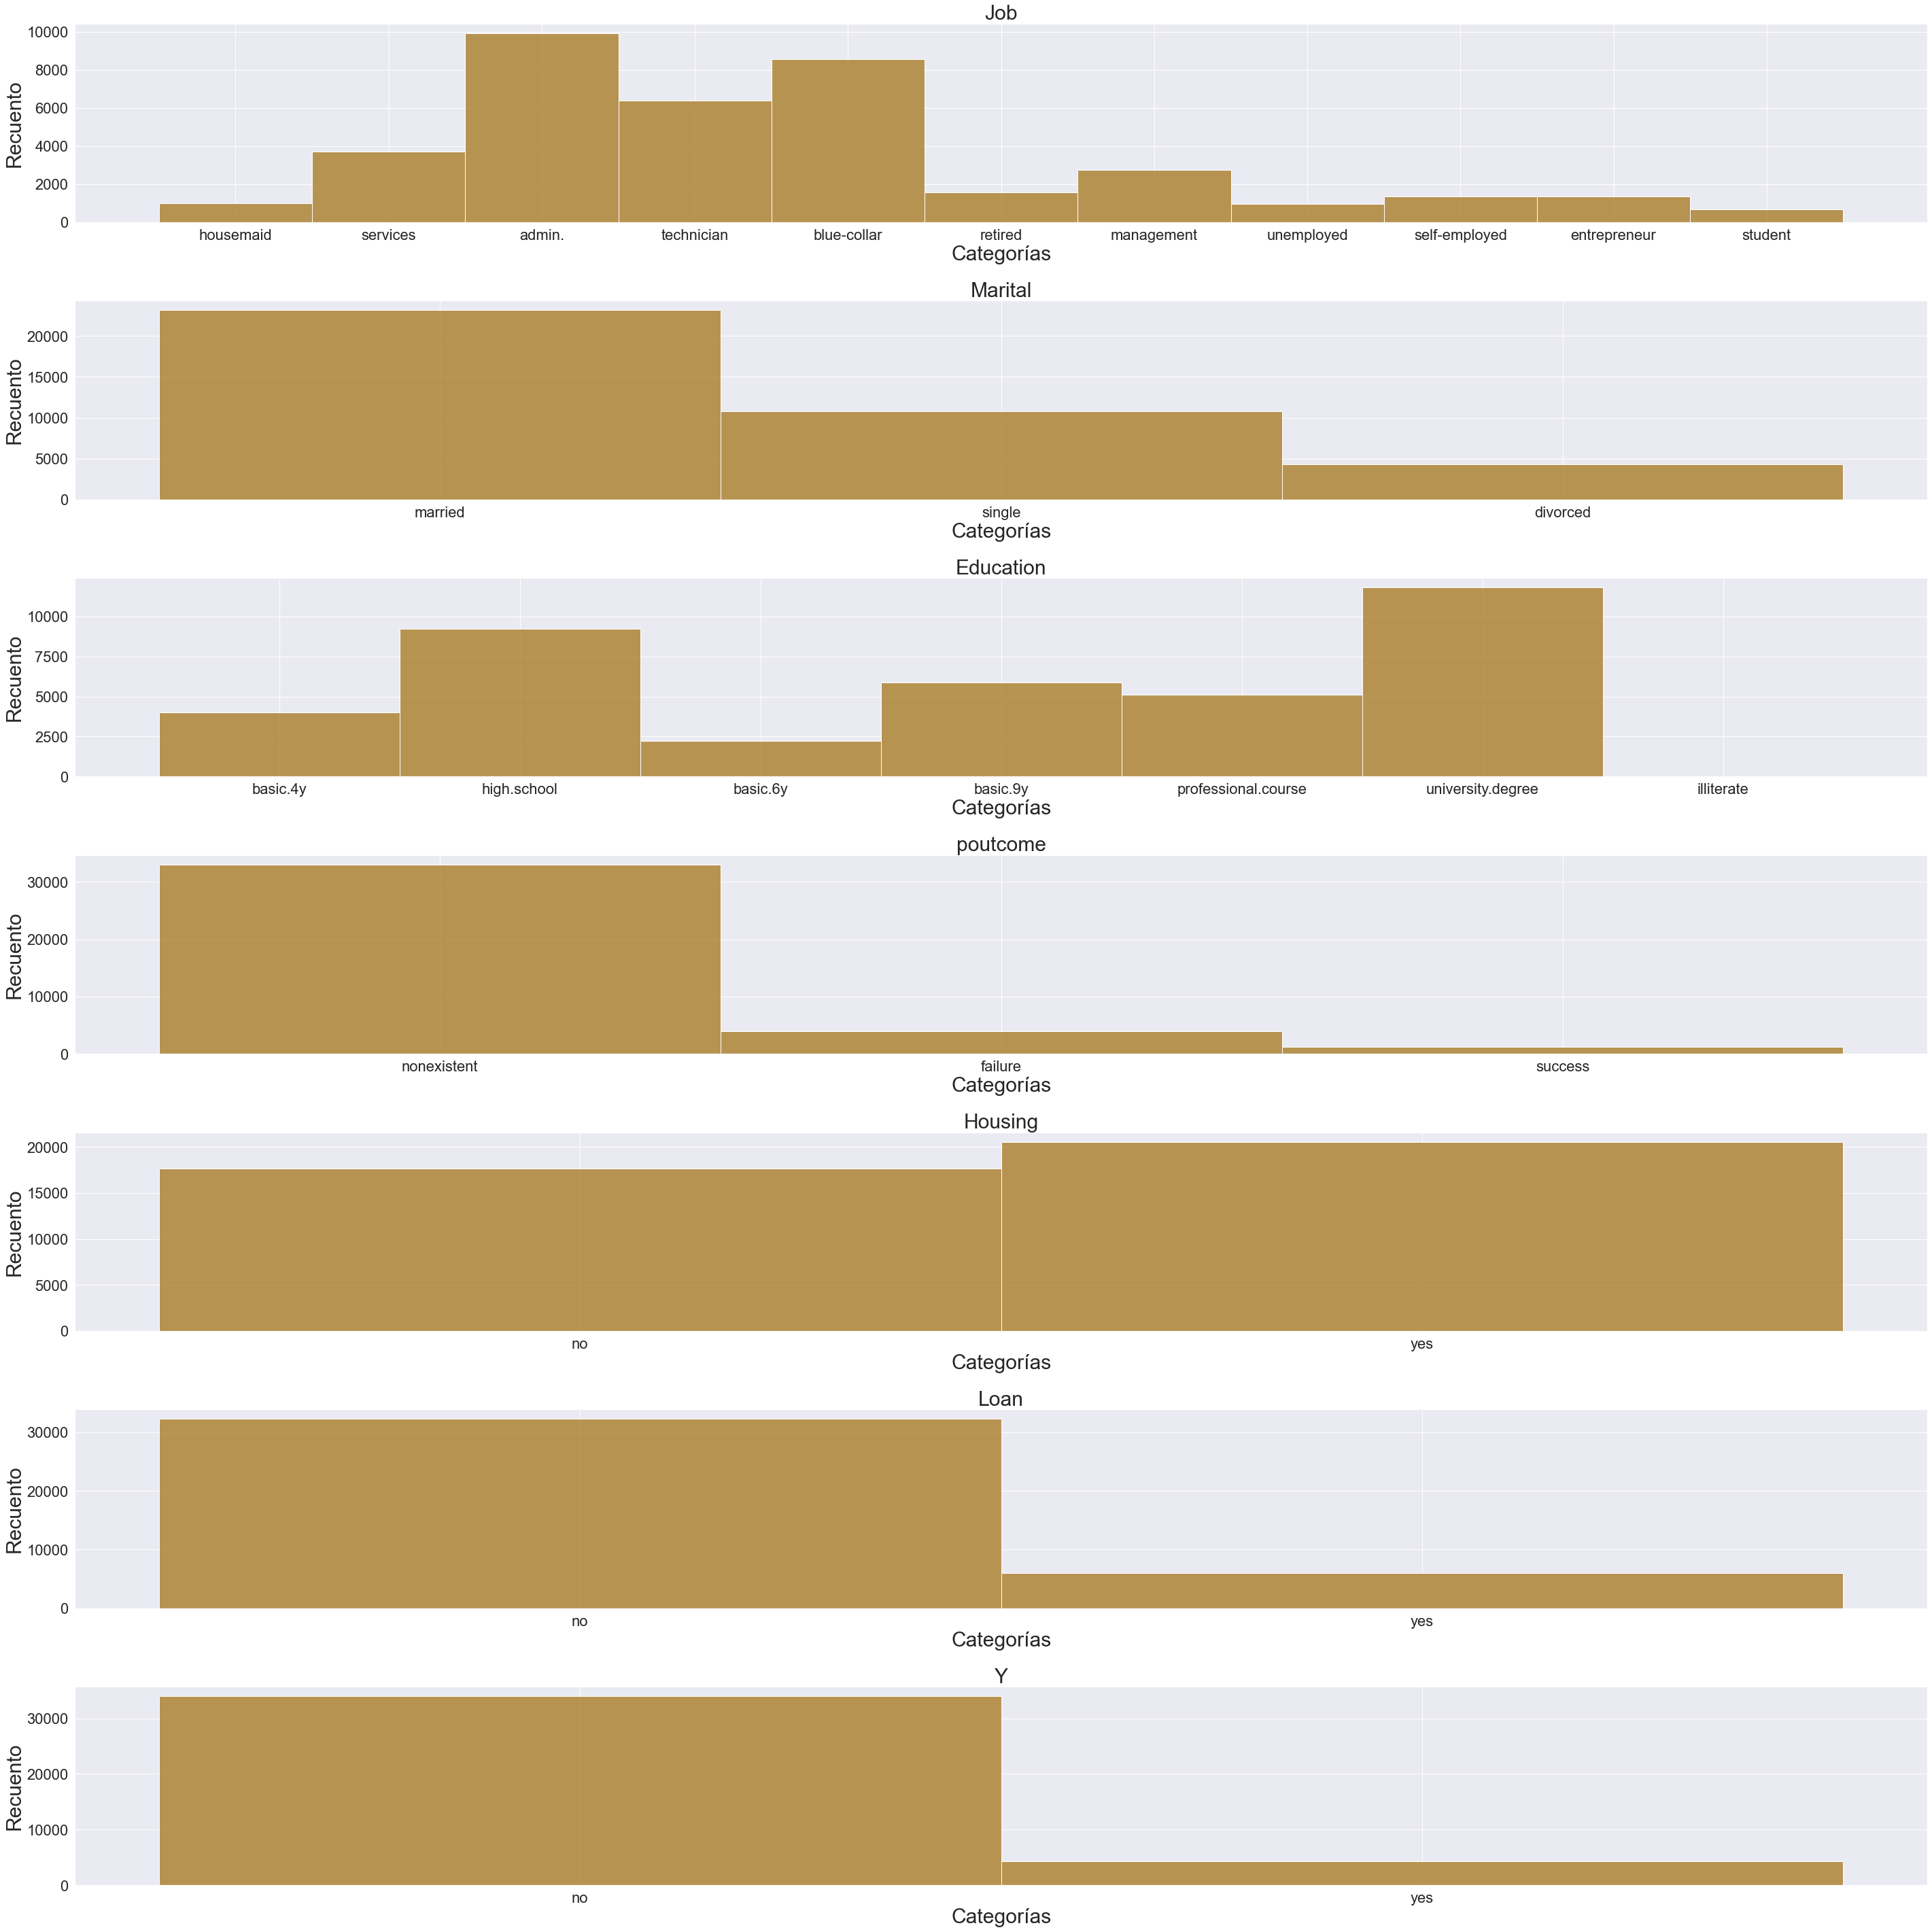

In [ ]:
## Utilizamos los histogramas para inspeccionar las variables categóricas y la variable
## objetivo. 
# ==============================================================================

col_name_categorical=['job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y' ]


fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7, figsize =(40,40))
sns.set_palette('Dark2_r')


ax0.set_title('Job', fontsize=30)
ax0.set_xlabel('Categorías', fontsize=30)
ax0.set_ylabel('Recuento', fontsize=30)
sns.histplot(data=df['job'], ax=ax0)

ax1.set_title('Marital', fontsize=30)
ax1.set_xlabel('Categorías', fontsize=30)
ax1.set_ylabel('Recuento', fontsize=30)
sns.histplot(data=df['marital'], ax=ax1)

ax2.set_title('Education', fontsize=30)
ax2.set_xlabel('Categorías', fontsize=30)
ax2.set_ylabel('Recuento', fontsize=30)
sns.histplot(data=df['education'], ax=ax2)

ax3.set_title('poutcome', fontsize=30)
ax3.set_xlabel('Categorías', fontsize=30)
ax3.set_ylabel('Recuento', fontsize=30)
sns.histplot(data=df['poutcome'], ax=ax3)

ax4.set_title('Housing', fontsize=30)
ax4.set_xlabel('Categorías', fontsize=30)
ax4.set_ylabel('Recuento', fontsize=30)
sns.histplot(data=df['housing'], ax=ax4)

ax5.set_title('Loan', fontsize=30)
ax5.set_xlabel('Categorías', fontsize=30)
ax5.set_ylabel('Recuento', fontsize=30)
sns.histplot(data=df['loan'], ax=ax5)


ax6.set_title('Y', fontsize=30)
ax6.set_ylabel('Recuento', fontsize=30)
ax6.set_xlabel('Categorías', fontsize=30)
sns.histplot(data=df['y'], ax=ax6)

sns.set(font_scale=2)
fig.tight_layout()

Algunos observaciones interesantes son:

    1. No se observa ruido de clase. El ruido de atributo se presentó con el atributo asignado 'unknown' pero ya se ha corregido.
    
    2. Se observa un gran desbalanceo en la variable objetivo 'y'

Atendiendo a las descripción de los datos, descartamos la duración ya que la mayoría de las llamadas han sido de 0 segundos y también descartaremos la variable Campaign ya que nos revela lo mismo, el nº de contactos con el cliente en esta campaña, sucediendo que en la mayoría de los casos no se ha contactado con los cliente. Además, dejar estas variables supondría que los futuros modelos tomaran estas variables con una alta correlación con la variable objetivo, ya que si no se ha producido llamada, los clientes no habrán aceptado.    

In [ ]:
# Eliminamos las columnas 'campaign' y 'duration'
# ==============================================================================
df = df.drop(columns=['campaign', 'duration'],axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### 2.2.4 Atributos redundantes / Análisis de correlaciones

En este apartado analizaremos los posibles variables redundantes o fuertemente correlacionadas. Para ello haremos uso del Análisis Chi2 para las variables categóricas y el Análisis de correlaciones para las variables continuas.


##### Aplicando el test de Chi2
En este caso escogemos las variables 'job' y 'education', ya que nos parece interesante estudiar si existe alguna posible relación entre el tipo de trabajo y el nivel de educación.
Para ello planteamos el siguiente contraste de hipótesis:  
    
    H0: Las dos variables son independientes
    H1: Las dos variables no son independientes
    
Estableceremos un nivel de significancia 0,05, o lo que es lo mismo, un nivel de confianza de 95%.

In [ ]:
# Creamos la tabla de frecuencias de las dos variables a estudiar
# ==============================================================================
data_crosstab = pd.crosstab(df['job'],
                            df['education'],
                           margins=True, margins_name="Total")
data_crosstab.head()


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,Total
job,,,,,,,,
admin.,75,148,490,3245,1,355,5619,9933
blue-collar,2252,1384,3521,858,8,443,92,8558
entrepreneur,132,69,207,227,2,129,594,1360
housemaid,459,73,92,170,1,59,133,987
management,97,85,161,291,0,85,2009,2728


In [ ]:
# Fijamos el nivel de significancia
# ==============================================================================
alpha = 0.05

# Calculamos el p-valor 
# ==============================================================================
chi_square = 0
rows = df['job'].unique()
columns = df['education'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Comparamos los p-valor con el nivel de significancia para ver si aceptamos o rechazamos la hipótesis nula
# ==============================================================================
print("Prueba 1: El enfoque del valor p para la prueba de hipótesis nula")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "No se rechaza la hipótesis nula."
if p_value <= alpha:
    conclusion = "Se rechaza la hipótesis nula."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Calculamos el valor crítico y lo comparamos con el p-valor
print("\n--------------------------------------------------------------------------------------")
print("Prueba 2: El enfoque del valor crítico para la comprobación de hipótesis nula")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "No se rechaza la hipótesis nula."
if chi_square > critical_value:
    conclusion = "Se rechaza la hipótesis nula."
        
print("chisquare-score es:", chi_square, " y p value es:", critical_value)
print(conclusion)

Prueba 1: El enfoque del valor p para la prueba de hipótesis nula
chisquare-score is: 34627.4978946979  and p value is: 0.0
Se rechaza la hipótesis nula.

--------------------------------------------------------------------------------------
Prueba 2: El enfoque del valor crítico para la comprobación de hipótesis nula
chisquare-score es: 34627.4978946979  y p value es: 79.08194448784874
Se rechaza la hipótesis nula.


Rechazamos la hipótesis nula ya que el valor de p es <0,05. Por lo tanto, no podemos descartar que ambas variables no sean independientes.

In [ ]:
# Rechazamos (o aceptamos) la hipótesis nula ya que el valor de p es <0,05. Por lo tanto, no podemos descartar que ambas variables no sean independientes.
# # Chi-square test of independence.
# c, p, dof, expected = chi2_contingency(data_crosstab)
# p.round(5)

##### Analizamos las correlaciones en las variables continuas

A continuación vamos a realizar un análisis de correlaciones entre las variables contínuas que tenemos en nuestro dataset. Este procedimiento tiene por objetivo indicarnos si existe relación entre dos eventos – es decir, variables–, un poco sobre la naturaleza de dicha relación, y su fuerza.


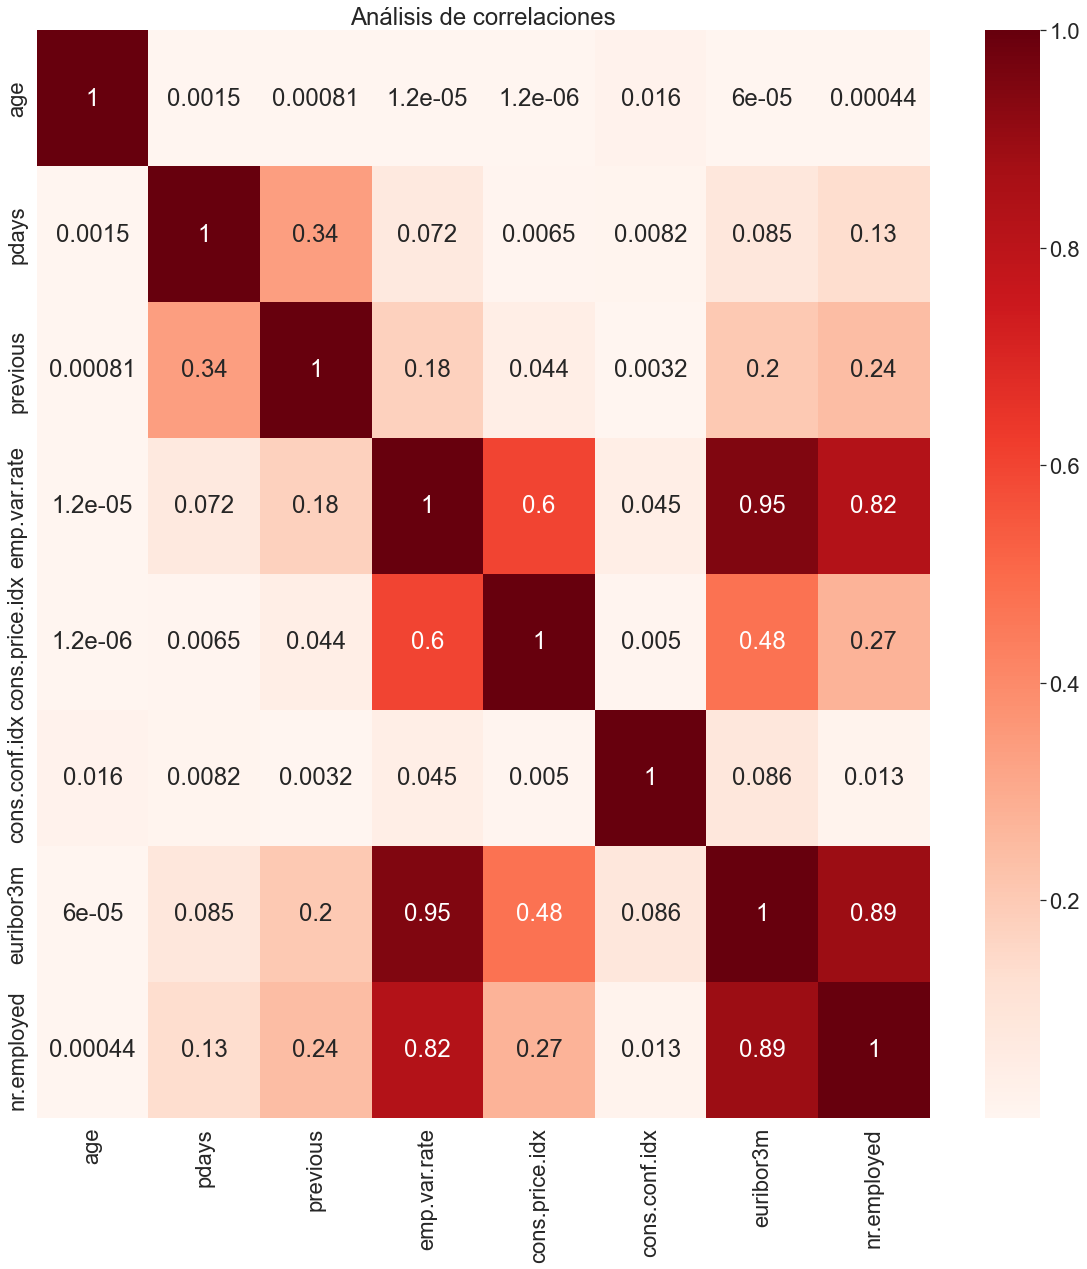

In [ ]:
# Correlación de Pearson
# ==============================================================================
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor**2, annot=True, cmap=plt.cm.Reds, )
plt.title("Análisis de correlaciones")
plt.show()

Observamos que en general no existe una gran correlación entre las variables. No obstante, la variable **nr.employed**presenta una alta correlación con las variables **euribor3m** y **emp.var.rate**. Optamos por mantenerlas las tres para futuros análisis y decidir si las eliminamos del conjunto.

## 2.4 Normalización de los datos

#### Explicar por qué que hacemos con la normalización, y  las pruebas que realizaremos posteriormente, con modelos con datos normalizados y sin normalizar
En esta sección nos disponemos a estudiar algunas de las técnicas de normalización de los datos como son el escalado de Mínimos y Máximos, el escalado basado en Z-Score y el escalado basado en Z-score robusto. Este tipo de técnicas sirven para reescalar los datos y que todo el conjunto de datos continuos estén en la misma escala. De esta manera no hay datos con escalas muy dispares.

Cabe resaltar que no siempre hace falta normalizar los datos, ya que a veces pierden sus propiedades de cara a la implementación futura en los modelos de clasificación. Es por ello que haremos una comparativa de los resultados con los datos normalizados y sin normalizar.


###### Normalización de Min Max

El método de estandarización min-max es transformar linealmente las variables numéricas de los datos originales. Sea minA y maxA los valores mínimos y máximos del atributo A, respectivamente, y asigne un valor original x de A a través de la normalización min-max al valor x 'en el intervalo [0,1].

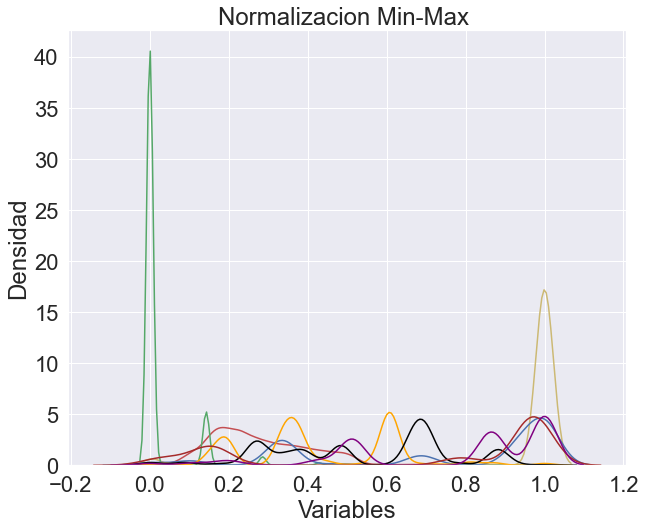

In [ ]:
# Normalización min max
# ==============================================================================

mm_scaler = preprocessing.MinMaxScaler()
col_names=['age','pdays','previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_mm = df[col_names]
df_mm = mm_scaler.fit_transform(df_mm)

df_mm = pd.DataFrame(df_mm, columns=col_names)

# Gráfico de distribución de cada variable
# ==============================================================================
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Normalizacion Min-Max ')
ax1.set_ylabel('Densidad')
ax1.set_xlabel('Variables')
sns.kdeplot(df_mm['age'], ax=ax1, color='r')
sns.kdeplot(df_mm['pdays'], ax=ax1, color='y')
sns.kdeplot(df_mm['previous'], ax=ax1,color='g')
sns.kdeplot(df_mm['emp.var.rate'], ax=ax1, color='b')
sns.kdeplot(df_mm['cons.conf.idx'], ax=ax1,color='orange')
sns.kdeplot(df_mm['cons.price.idx'], ax=ax1,color='black');
sns.kdeplot(df_mm['euribor3m'], ax=ax1, color='brown');
sns.kdeplot(df_mm['nr.employed'], ax=ax1, color='purple');


Se consigue estandarizar los datos pero consideramos que no es suficiente, ya que lo ideal sería conseguir una distribución de datos cercana a la distr. Gaussiana o normal.

###### Normalización Z-score

Es un método común de procesamiento de datos. A través de él, se pueden convertir diferentes niveles de datos en un puntaje Z-Score unificado para comparación.

Se puede explicar en una oración de manera concisa:Z-Score convierte dos o más conjuntos de datos en puntajes Z-Score sin unidades a través de (x-μ) / σ, que unifica los estándares de datos, mejora la comparabilidad de los datos y debilita la interpretación de los datos.

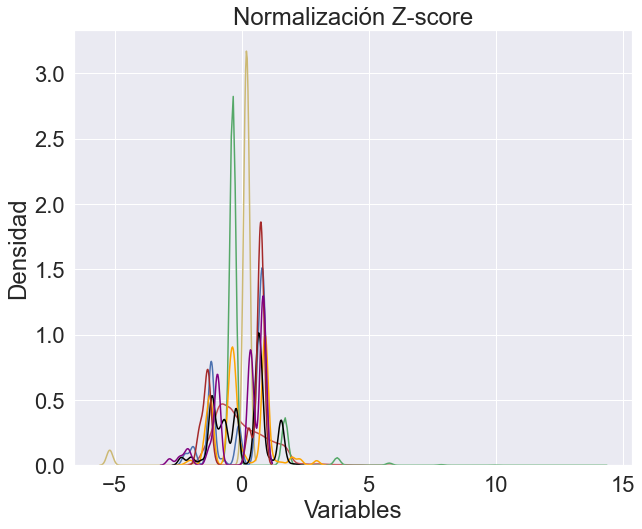

In [ ]:
# Normalización z-score
# ==============================================================================

s_scaler = preprocessing.StandardScaler()
df_s= df[col_names]
df_s = s_scaler.fit_transform(df_s)

df_s = pd.DataFrame(df_s, columns=col_names)

# Gráfico de distribución z-score de cada variable
# ==============================================================================

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Normalización Z-score')
ax1.set_ylabel('Densidad')
ax1.set_xlabel('Variables')
sns.kdeplot(df_s['age'], ax=ax1, color='r')
sns.kdeplot(df_s['pdays'], ax=ax1, color='y')
sns.kdeplot(df_s['previous'], ax=ax1,color='g')
sns.kdeplot(df_s['emp.var.rate'], ax=ax1, color='b')
sns.kdeplot(df_s['cons.conf.idx'], ax=ax1,color='orange')
sns.kdeplot(df_s['cons.price.idx'], ax=ax1,color='black');
sns.kdeplot(df_s['euribor3m'], ax=ax1, color='brown');
sns.kdeplot(df_s['nr.employed'], ax=ax1, color='purple');


Con esta normalización se consigue una distribución de datos cercana a una distribución gaussiana de media 0 y desviación típica cercana a 1 en la mayoría de los casos. 

###### Escalado robusto
Es una forma de escalado basado en Z-score pero se realiza de una forma más robusta, es decir, en lugar de restar la media y dividir por la desviación típica, se puede restar la mediana y dividir por el rango intercuartil.

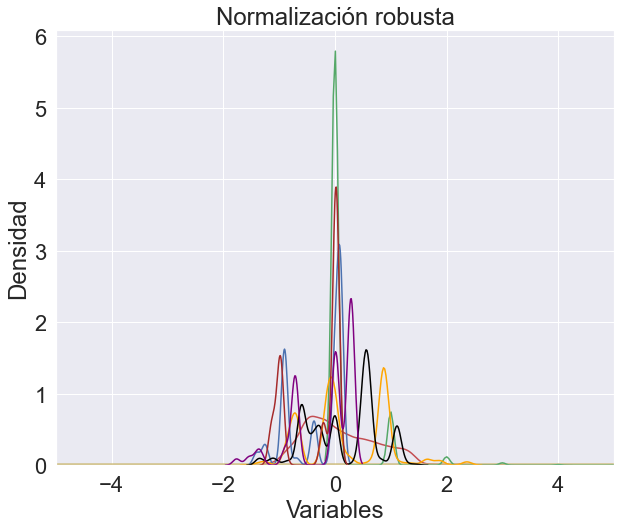

In [ ]:
# Normalización z-score
# ==============================================================================

r_scaler = preprocessing.RobustScaler()
df_r=df[col_names]
df_r = r_scaler.fit_transform(df_r)

df_r = pd.DataFrame(df_r, columns=col_names)

# Gráfico de distribución robusta z-score de cada variable
# ==============================================================================

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Normalización robusta')
ax1.set_xlim(left=-5, right=5)
ax1.set_ylabel('Densidad')
ax1.set_xlabel('Variables')
sns.kdeplot(df_r['age'], ax=ax1, color='r')
sns.kdeplot(df_r['pdays'], ax=ax1, color='y')
sns.kdeplot(df_r['previous'], ax=ax1,color='g')
sns.kdeplot(df_r['emp.var.rate'], ax=ax1, color='b')
sns.kdeplot(df_r['cons.conf.idx'], ax=ax1,color='orange')
sns.kdeplot(df_r['cons.price.idx'], ax=ax1,color='black');
sns.kdeplot(df_r['euribor3m'], ax=ax1, color='brown');
sns.kdeplot(df_r['nr.employed'], ax=ax1, color='purple');

Observando los resultado nos damos cuenta de que las variables pdays y previous no tienen una distribución acorde al resto, ya que mientras que 999 indica que no se ha llamado. Es por ello que para su correcta representación hemos optado por limitar el eje X.

###### Conclusiones:
Después de estudiar las diferentes normalizaciones, nos quedamos con la normalización estándar, que está basada en el Z-score, para futuras pruebas

## 2.5 Transformación de los datos

En esta sección crearemos un conjunto de datos donde las variables continuas están normalizadas. Además transformaremos la variable objetivo a entero asignándole 0 y 1 a las opciones no y yes respectivamente.

In [ ]:
# Transformación de datos y obtención de un nuevo conjunto de datos tratados
# ==============================================================================
df['y'] = df['y'].replace(['yes', 'no'],[1,0]).astype('int')

df_normalized=df.copy()

df_normalized['age']=df_s['age'].values
df_normalized['pdays']=df_s['pdays'].values
df_normalized['previous']=df_s['previous'].values
df_normalized['emp.var.rate']=df_s['emp.var.rate'].values
df_normalized['cons.conf.idx']=df_s['cons.conf.idx'].values
df_normalized['cons.price.idx']=df_s['cons.price.idx'].values
df_normalized['euribor3m']=df_s['euribor3m'].values
df_normalized['nr.employed']=df_s['nr.employed'].values
# df_normalized.head(5)
# df_normalized.info()

df_normalized = df_normalized.reset_index(drop=True) # reseteamos el índice


#### En este punto tenemos 2 datasets que usaremos en implementaremos en los futuros modelos:
    1. df: conjunto de datos tratado, sin duplicados ni atributos de ruido/ outliers
    2. df_normalized: conjunto de datos que parte del estado de df y además sus variables continuas están normalizadas

## 3. Reducción de los datos
En este apartado del proyecto, se implementarán diversas técnicas de reducción de los datos como puede ser la selcción de características e instancias, usando el análisis de correlaciones tal como lo hemos usado anteriormente.

También usaremos métodos basados en modelos de machine learning como son los métodos de envoltura o los métodos integrados. Una vez realizadas las pruebas, conformaremos un nuevo dataset con aquellos resultados que consideremos apropiados.

### 3.1 Selección de características y selección de instancias
Como ya hemos hecho en apartados anteriores, utilizaremos la correlación de Pearson para estudiar las diferentes correlaciones entre las variables numéricas. Se observa que se incluye la variable objetivo en el análisis, ya que previamente se transformado a una variable numérica.

Los otros métodos se pueden utilizar para datasets con variables categóricas?
Si





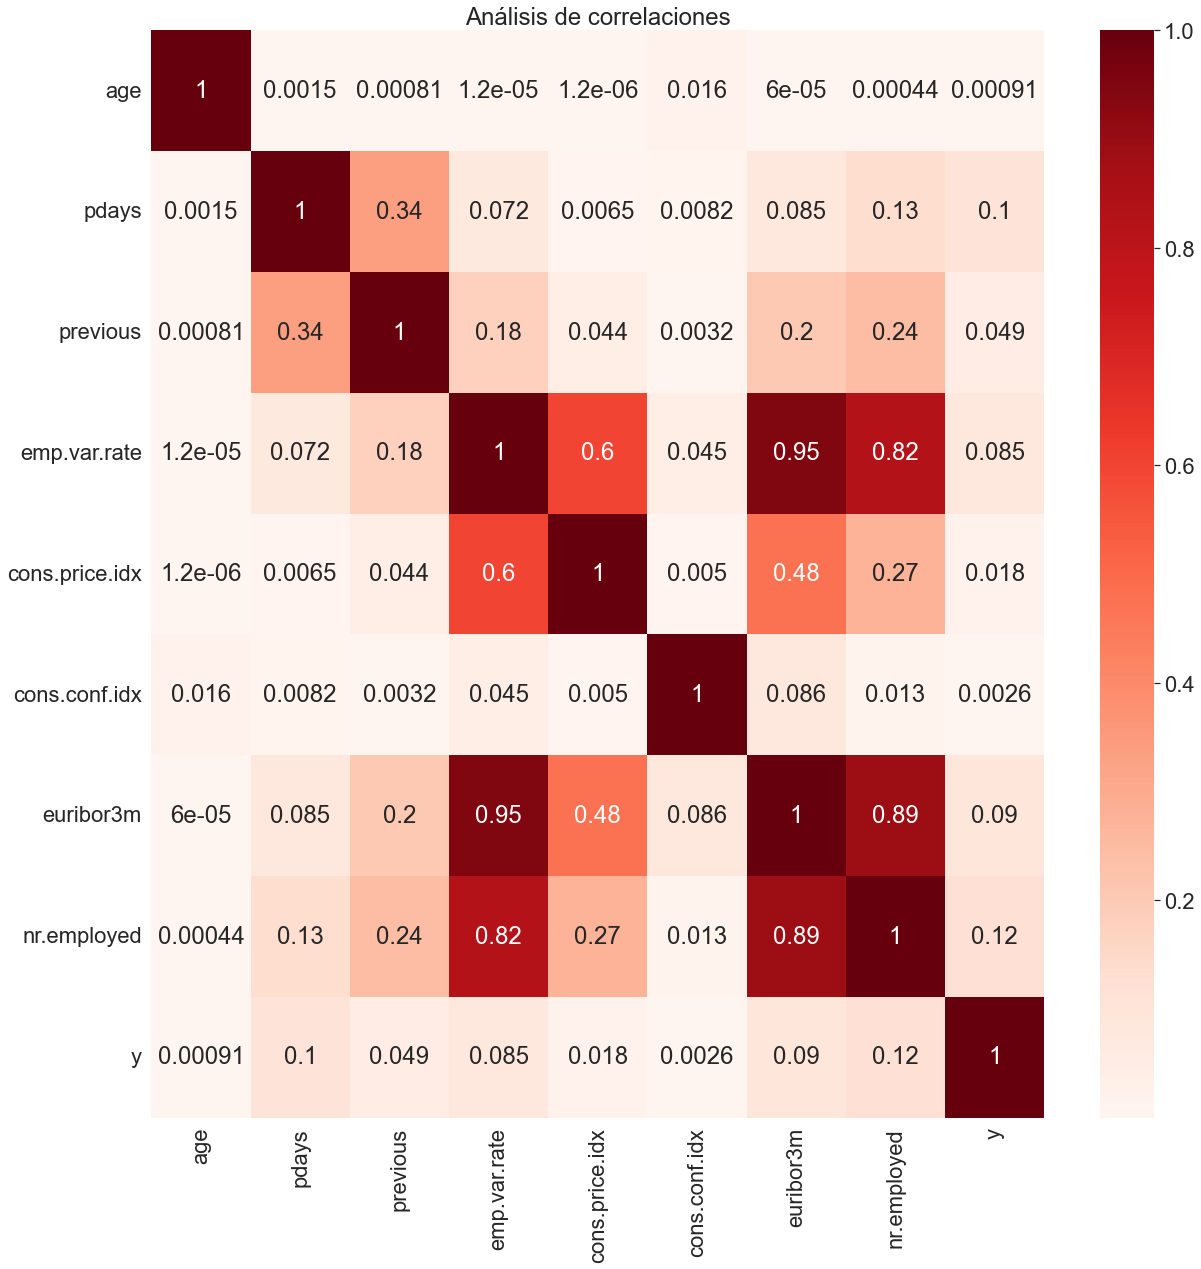

In [ ]:
# Análisis de correlaciones con Pearson
# ==============================================================================
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor**2, annot=True, cmap=plt.cm.Reds)
plt.title("Análisis de correlaciones")
plt.show()

##### Conclusiones:
La variable **nr.employed**presenta una alta correlación con las variables **euribor3m** y **emp.var.rate**. Se podría optar por eliminar dos de las tres variables y eliminamos la multicolinealidad.

### 3.2 Método de envoltura

Vamos a aplicar la técnica de reducción de la dimensionalidad basada en el método de envoltura. Los métodos de envoltura se basan en algoritmos de búsqueda exhaustivos, ya que evalúan todas las combinaciones posibles y seleccionan la combinación que produce el mejor resultado para un algoritmo de Machine Learning específico.

En este caso utilizamos el método de Eliminación hacia atrás. Como su nombre lo indica, al principio se utilizan todas las características posibles en el modelo. Verificamos el rendimiento del modelo y luego eliminamos iterativamente las características de peor rendimiento una por una hasta que el rendimiento general se encuentre en un rango aceptable. La métrica utilizada aquí para evaluar el rendimiento de la característica es el p-valor. Si el valor p está por encima de 0.05, eliminamos la característica, de lo contrario la conservamos. Primero se ejecuta una iteración sólo para tener una idea del concepto y luego se va ejecutando el mismo código en un bucle, que dará el conjunto final de características. Aquí estamos utilizando el modelo de "mínimos cuadrados ordinarios" (regresión lineal).

In [ ]:
# Método de envoltura basado en Mínimos Cuadradros Ordinarios
# ==============================================================================

categorical_columns=[]

for i, x in enumerate(df_normalized.columns):
    if df_normalized[x].dtypes == object:
        categorical_columns.append(df_normalized.columns[i])
categorical_columns

#
# Establecemos las variables
# ==============================================================================
X = df_normalized.drop(['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome', 'y'],axis = 1)
y= df_normalized['y']

# Aplicando el modelo de envoltura con elminación hacia atrás
# ==============================================================================

#Se añade una columna con valor constante, ya que es imperativo para el funcionamiento
#del modelo
X_1 = sm.add_constant(X)
#Entrenamos el modelo
model = sm.OLS(y,X_1).fit()
print(model.pvalues.sort_values().round(2),'\n')

#Algoritmo de Eliminación hacia atrás
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

const             0.00
pdays             0.00
previous          0.00
cons.conf.idx     0.00
nr.employed       0.00
cons.price.idx    0.00
emp.var.rate      0.00
age               0.08
euribor3m         0.12
dtype: float64 

['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']


###### Conclusiones:
En este caso el algoritmo nos indica que ha descartado la variable ***euribor3m** y **age**.

### 3.3 Método integrado

Los métodos integrados son iterativos en el sentido que, en cada iteración del proceso de entrenamiento del modelo, se encarga de comprobar y extraer las características que más contribuyen al entrenaimiento para una iteración en particular. Los métodos de regularización son los métodos integrados más utilizados que penalizan una característica dado un coeficiente umbral. (regularización de Lasso). Si la característica es irrelevante, el método penaliza su coeficiente y lo convierte en 0. Por lo tanto, las características con coeficiente = 0 se eliminan y se toman el resto.

El mejor coeficiente alpha usando el modelo LassoCV: 0.001446
La mejor puntuación alpha usando el modelo LassoCV: 0.171199 

El modelo Lasso ha escogido 7 variables y eliminado las otras 1 variables




Text(0.5, 1.0, 'Importancia de características usando el modelo de Lasso')

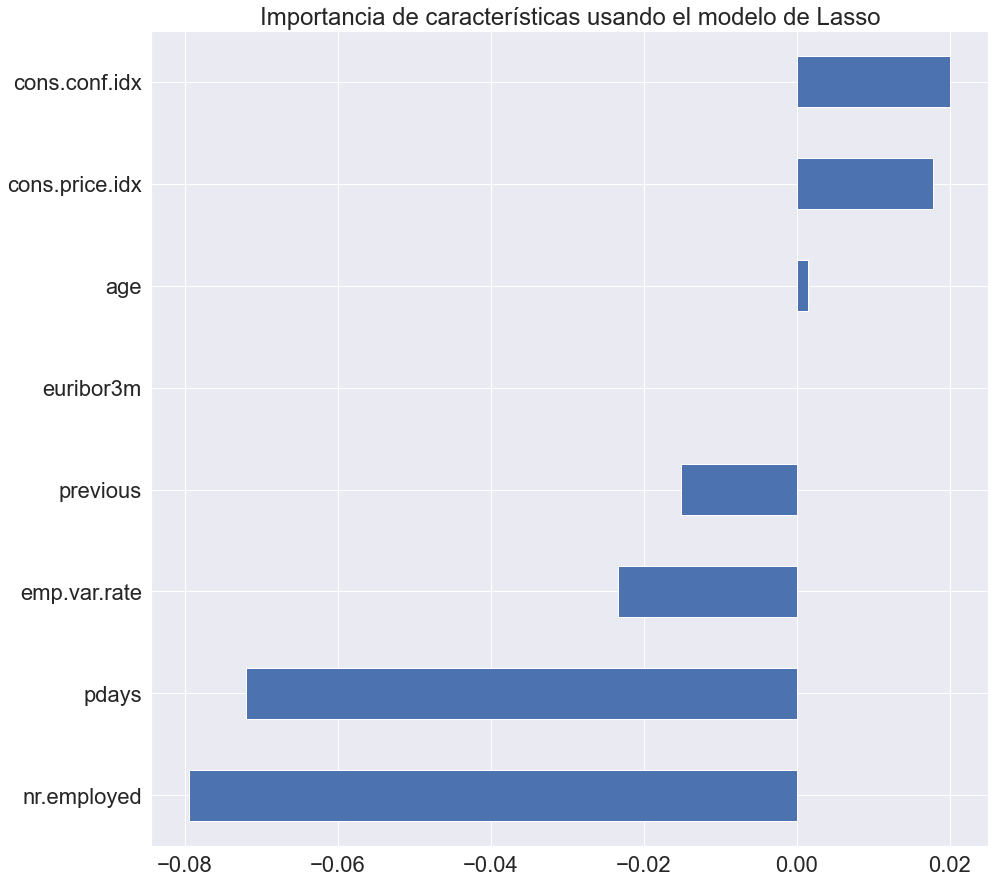

In [ ]:
# Establecemos las variables
# ==============================================================================

X = df_normalized.drop(['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome', 'y'],axis = 1)
y= df_normalized['y']

# Aplicando el modelo integrado con el estimador de Laso
# ==============================================================================

reg = LassoCV()
reg.fit(X, y)
print("El mejor coeficiente alpha usando el modelo LassoCV: %f" % reg.alpha_)
print("La mejor puntuación alpha usando el modelo LassoCV: %f \n" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("El modelo Lasso ha escogido " + str(sum(coef != 0)) + " variables y eliminado las otras " +  str(sum(coef == 0)) + " variables\n\n")

imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (15,15)
imp_coef.plot(kind = "barh")
plt.title("Importancia de características usando el modelo de Lasso")

##### Conclusiones:
En este caso el modelo ha descartado sólo la variable **euribor3m** aunque también observamos que le da asigna muy poca importancia a la variable ***age**.

##### Elección de nuestro dataset con Feature Reduced:

Una vez realizado todas los análisis, **optamos por adoptar los resultados obtenidos en el método de envoltura**. Por lo tanto, eliminaremos las variables indicadas por ese modelo y conformaremos otro conjunto de datos para nuestros análisis posteriores.

Finalmente, nuestro dataset con las variables continuas reducidas para realizar el modelo será el siguiente:

In [ ]:
df_normalized_featureReduced = df_normalized.drop(['euribor3m', 'age'],axis=1)
df_normalized_featureReduced.head(5)

,job,marital,education,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,housemaid,married,basic.4y,no,no,telephone,may,mon,0.19249,-0.349045,nonexistent,0.649568,0.735,0.895949,0.328443,0
1,services,married,high.school,no,no,telephone,may,mon,0.19249,-0.349045,nonexistent,0.649568,0.735,0.895949,0.328443,0
2,services,married,high.school,yes,no,telephone,may,mon,0.19249,-0.349045,nonexistent,0.649568,0.735,0.895949,0.328443,0
3,admin.,married,basic.6y,no,no,telephone,may,mon,0.19249,-0.349045,nonexistent,0.649568,0.735,0.895949,0.328443,0
4,services,married,high.school,no,yes,telephone,may,mon,0.19249,-0.349045,nonexistent,0.649568,0.735,0.895949,0.328443,0


#### En este punto tenemos  datasets:
    1. df: conjunto de datos tratado, sin duplicados ni atributos de ruido/ outliers
    2. df_normalized: conjunto de datos que parte del estado de df y además sus variables continuas están normalizadas
    el punto tres está comentado
    3. df_normalized_featureReduced: conjunto de datos que parte del estado de df_normalized y además se ha reducido el nº de variables aplicando métodos de selección de características.

## 3.4 Análisis de componentes principales

En este apartado vamos a realizar el análisis de componentes principales (PCA). Es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Utilizaremos el conjunto de datos **df**, por lo que tendremos que etiquetar las variables categóricas con números consecutivos para poder aplicar PCA. 

Tenemos en cuenta también que PCA no se debe aplicar cuando existen variables categóricas. Esto se debe a que el PCA está diseñado para minimizar la varianza (desviaciones al cuadrado), lo que no tiene mucho sentido cuando se realiza con variables binarias o variables etiquetadas. Igualmente, haremos la prueba. 

In [ ]:
# Realizamos el análisis de componentes
# ==============================================================================

from sklearn.decomposition import PCA
pca = PCA()

# Etiquetamos cada atributo de las variables categóricas con números
# ==============================================================================
df_normalized_encoded = df_normalized.copy()

categorical_columns=[]

# Todos las variables categóricas las almacenamos en la lista categorical_columns
for i, x in enumerate(df_normalized_encoded.columns):
    if df_normalized_encoded[x].dtypes == object:
        categorical_columns.append(df_normalized_encoded.columns[i])
             

#Utilizamos el módulo Label Encoder para codificar las categorías 
#de las variables
# ==============================================================================
label_encoder = LabelEncoder()

for x in categorical_columns:
    
    integer_encoded = label_encoder.fit_transform(df_normalized_encoded[x])

    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    
    df_normalized_encoded[x]=integer_encoded


# Obtenemos los componentes principales 
# ==============================================================================
pca.fit(df_normalized_encoded.iloc[:,:-1])
X = pca.transform(df_normalized_encoded.iloc[:,:-1])
print('--------Componentes principales-----\n')
print(pca.components_)

--------Componentes principales-----

[[-3.24983617e-03  9.91495859e-01  4.87117280e-03  1.19389532e-01
   1.01884717e-03 -1.14784543e-03 -6.10253700e-03 -4.70785547e-02
  -2.04573440e-03 -7.37036406e-03  4.35830163e-03  1.41479470e-03
  -1.23591572e-03 -7.99503642e-03  1.54004431e-02 -1.29065948e-03
  -2.83439265e-03]
 [ 2.08142305e-03  6.40988552e-02 -1.49129921e-03 -1.83079507e-01
  -5.51918581e-04 -1.54533083e-03  3.23093432e-02  9.23443696e-01
   1.49932160e-02 -6.41129505e-02  1.04418044e-01 -1.65531272e-02
  -1.72254545e-01 -7.25054781e-02 -2.60166695e-02 -1.50550734e-01
  -1.86516394e-01]
 [-8.05950116e-02 -1.07780292e-01  4.82084723e-02  8.57307254e-01
   1.19162043e-02  2.14547307e-03 -7.16719799e-02  1.19089439e-02
  -2.66807115e-02 -1.14818155e-01  1.47519166e-01 -1.19521543e-02
  -2.36789155e-01 -2.08209399e-01 -1.86617212e-02 -2.32881500e-01
  -2.22172535e-01]
 [ 6.48558535e-02  3.13921392e-02  2.04234450e-03 -4.49154870e-01
   1.54917907e-02 -5.75602300e-04 -1.20144178e-

Utilizamos el **ratio de varianza explicada** como métrica para evaluar la utilidad de sus componentes principales y para elegir cuántos componentes utilizar en su modelo. El ratio de varianza explicada es el porcentaje de varianza que se atribuye a cada uno de los componentes seleccionados. Lo ideal es elegir el número de componentes que se incluirán en el modelo sumando el ratio de varianza explicada de cada componente hasta alcanzar un total de alrededor de 0,8 u 80% para evitar el sobreajuste


In [ ]:
# Obtenemos la varianza explicada
# ==============================================================================

print('\n--------Varianza explicada-----\n')
print(pca.explained_variance_)
print('\n--------Ratio de Varianza explicada-----\n')
print(pca.explained_variance_ratio_)
print('\n--------Ratio de Varianza explicada acumulada-----\n')
np.cumsum(pca.explained_variance_ratio_)


--------Varianza explicada-----

[1.27787961e+01 5.74455525e+00 4.31485709e+00 3.50309425e+00
 1.95325008e+00 1.37925576e+00 1.09213974e+00 8.50246291e-01
 4.84385450e-01 4.47841913e-01 2.80904851e-01 2.46431215e-01
 1.30923803e-01 1.09653191e-01 2.28676421e-02 1.95344318e-02
 7.11283827e-03]

--------Ratio de Varianza explicada-----

[3.82990277e-01 1.72168707e-01 1.29319562e-01 1.04990410e-01
 5.85403964e-02 4.13373483e-02 3.27322620e-02 2.54825306e-02
 1.45174018e-02 1.34221641e-02 8.41893290e-03 7.38573169e-03
 3.92388636e-03 3.28638985e-03 6.85360694e-04 5.85461839e-04
 2.13177194e-04]

--------Ratio de Varianza explicada acumulada-----



array([0.38299028, 0.55515898, 0.68447855, 0.78946896, 0.84800935,
       0.8893467 , 0.92207896, 0.94756149, 0.9620789 , 0.97550106,
       0.98391999, 0.99130572, 0.99522961, 0.998516  , 0.99920136,
       0.99978682, 1.        ])

A continuación construimos el dataset con los componentes principales y las variables. Así podemos observar los pesos datos a cada variable.

In [ ]:
# Construimos el dataset de las componentes principales
# ==============================================================================

pd.DataFrame(
    data    = pca.components_,
    columns = df_normalized_encoded.columns[:-1],
    index   = ['componente ' + str(i+1) for i, x in enumerate(df_normalized_encoded.columns[:-1])]
)

,age,job,marital,education,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
componente 1,-0.003250,0.991496,0.004871,0.119390,0.001019,-0.001148,-0.006103,-0.047079,-0.002046,-0.007370,0.004358,0.001415,-0.001236,-0.007995,0.015400,-0.001291,-0.002834
componente 2,0.002081,0.064099,-0.001491,-0.183080,-0.000552,-0.001545,0.032309,0.923444,0.014993,-0.064113,0.104418,-0.016553,-0.172255,-0.072505,-0.026017,-0.150551,-0.186516
componente 3,-0.080595,-0.107780,0.048208,0.857307,0.011916,0.002145,-0.071672,0.011909,-0.026681,-0.114818,0.147519,-0.011952,-0.236789,-0.208209,-0.018662,-0.232882,-0.222173
componente 4,0.064856,0.031392,0.002042,-0.449155,0.015492,-0.000576,-0.120144,-0.364162,-0.049537,-0.173460,0.238319,-0.025919,-0.385534,-0.311739,-0.134975,-0.405733,-0.356525
componente 5,-0.014398,-0.001033,0.006717,-0.002166,0.002564,-0.002830,-0.019554,-0.031502,0.995086,-0.052868,0.039500,0.007069,-0.011878,-0.033496,0.047146,-0.008184,-0.014111
componente 6,0.295467,-0.011689,-0.078507,0.009692,-0.016346,-0.002874,0.075565,-0.020814,-0.056264,-0.630063,0.453680,0.099062,0.137643,0.249894,0.431417,0.125689,-0.028137
componente 7,-0.728276,0.007971,0.229163,-0.058488,-0.007192,0.002628,0.016845,-0.018568,-0.009068,-0.290397,0.283190,0.020122,0.108945,0.280601,-0.393652,0.030842,0.037342
componente 8,0.517521,0.004000,-0.208849,0.106270,0.004923,0.003143,-0.029661,0.020647,0.047698,-0.013956,0.178445,-0.052062,0.076470,0.264639,-0.748035,-0.014140,0.056961
componente 9,-0.040234,-0.000385,-0.024074,-0.012646,0.010312,-0.000434,-0.102132,0.011622,-0.010716,0.447734,0.701423,-0.414493,0.084671,-0.206128,0.116909,0.140040,0.199133
componente 10,-0.001118,-0.000877,0.059928,0.018422,-0.068021,-0.008380,0.320810,-0.082121,0.026049,0.389420,0.066991,-0.135804,-0.072285,0.629213,0.172469,-0.218610,-0.477264


Vemos la varianza explicada acumulada de forma gráfica. Así detectatemos fácilmente el nº de componentes necesarios para explicar un alto porcentaje de la varianza.

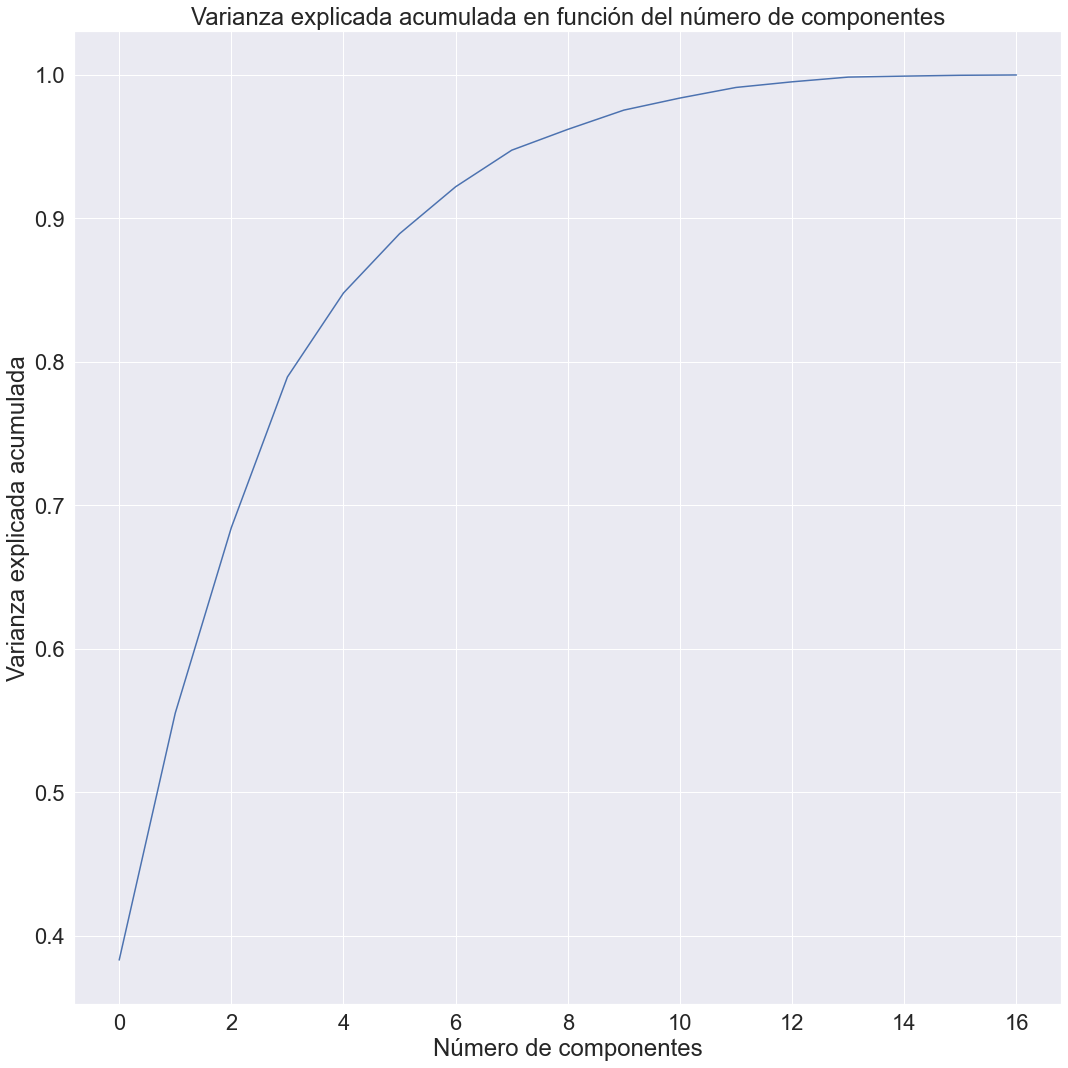

In [ ]:
# Obsercamos la varianza explicada acumulada en función del número de componentes
# ==============================================================================

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada en función del número de componentes')
sns.set(font_scale=1)
plt.tight_layout()
plt.show()

Observamos que con 6 componentes podemos explicar más del 90% de la varianza de los datos. Si plasmamos estos datos en un gráfico de barras, observamos el porcentaje que explica cada componente.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.82990277e-01 1.72168707e-01 1.29319562e-01 1.04990410e-01
 5.85403964e-02 4.13373483e-02 3.27322620e-02 2.54825306e-02
 1.45174018e-02 1.34221641e-02 8.41893290e-03 7.38573169e-03
 3.92388636e-03 3.28638985e-03 6.85360694e-04 5.85461839e-04
 2.13177194e-04]


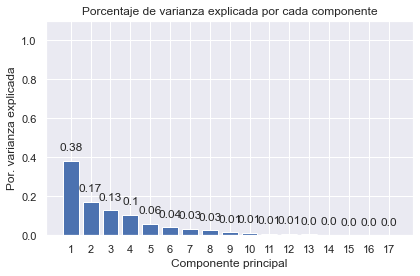

In [ ]:
# https://www.cienciadedatos.net/documentos/py19-pca-python.html

# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_normalized_encoded.columns[:-1])) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

# Dibujamos el porcentaje de varianza explicada por cada componente
# ==============================================================================
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
sns.set(font_scale=1)
plt.tight_layout();

##### Conclusiones:
En base a los dos gráficos anteriores observamos que en torno a 6º componente se explica el 90% de a varianza de nuestro conjunto de datos, por lo que esta será nuestra elección para las futuras implementaciones de modelos.

In [ ]:
# Construimos nuestro dataframe de componentes principales
# ==============================================================================
df_PCA = pd.DataFrame(data = X, columns = ['PC' + str(i+1) for i, x in enumerate(df_normalized_encoded.columns[:-1])])
df_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.167202,1.857108,-3.802364,-0.101970,-1.111646,0.994111,-1.179373,-0.058988,-0.066826,0.292818,0.336352,-0.492035,-0.111003,0.117169,0.039802,0.085821,0.039834
1,3.156634,1.564467,-1.669397,-1.317562,-1.123678,1.005150,-1.393738,0.326121,-0.110216,0.344466,0.339113,-0.504120,-0.111654,0.158443,0.035312,0.082721,0.031413
2,3.163970,1.559869,-1.500810,-1.428145,-1.093126,0.414438,0.014785,-0.674978,-0.021692,0.278617,-0.217483,0.532645,-0.181498,0.147535,0.027046,0.069078,0.035164
3,-4.017246,1.478495,-2.496379,-0.746161,-1.088323,0.579378,-0.129202,-0.769535,-0.015747,0.315610,-0.160129,-0.458854,-0.117931,0.090971,0.037365,0.081826,0.045005
4,3.155802,1.562719,-1.659418,-1.324441,-1.125108,0.973558,-1.320325,0.278963,-0.106740,0.336194,0.315380,-0.433791,0.885838,0.167325,0.036731,0.078230,0.032628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38227,1.324335,3.098979,1.588611,0.214935,-2.265073,0.059838,-1.429848,3.771444,-1.763060,2.288710,0.825278,0.575839,-0.179364,-1.283812,-0.012815,0.260378,0.271658
38228,-2.634139,2.837673,2.219322,-0.096327,-2.225720,-0.652454,0.456676,2.392392,-1.666246,2.363174,-0.062991,-0.355858,-0.116781,-1.376634,-0.007899,0.259184,0.288013
38229,1.449094,2.912460,2.579089,-0.341384,-2.243450,-0.418681,-0.284978,3.022595,-1.709226,2.308979,0.293113,0.610525,-0.182057,-1.308120,-0.015558,0.253767,0.276218
38230,5.298460,3.350059,1.372747,0.142203,-2.231186,-0.803404,0.662016,2.323786,-1.661507,2.356373,-0.137563,-0.353320,-0.105466,-1.370200,-0.008664,0.252461,0.286118


In [ ]:
# Añadimos la variable objetivo al dataset
# ==============================================================================

df_PCA['y']=df_normalized_encoded['y']
df_PCA.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,y
0,-1.167202,1.857108,-3.802364,-0.101970,-1.111646,0.994111,-1.179373,-0.058988,-0.066826,0.292818,0.336352,-0.492035,-0.111003,0.117169,0.039802,0.085821,0.039834,0
1,3.156634,1.564467,-1.669397,-1.317562,-1.123678,1.005150,-1.393738,0.326121,-0.110216,0.344466,0.339113,-0.504120,-0.111654,0.158443,0.035312,0.082721,0.031413,0
2,3.163970,1.559869,-1.500810,-1.428145,-1.093126,0.414438,0.014785,-0.674978,-0.021692,0.278617,-0.217483,0.532645,-0.181498,0.147535,0.027046,0.069078,0.035164,0
3,-4.017246,1.478495,-2.496379,-0.746161,-1.088323,0.579378,-0.129202,-0.769535,-0.015747,0.315610,-0.160129,-0.458854,-0.117931,0.090971,0.037365,0.081826,0.045005,0
4,3.155802,1.562719,-1.659418,-1.324441,-1.125108,0.973558,-1.320325,0.278963,-0.106740,0.336194,0.315380,-0.433791,0.885838,0.167325,0.036731,0.078230,0.032628,0


Ya hemos construido nuestro dataset de componentes principales. Cuando modelemos, elegiremos las 7 variables principales

#### En este punto tenemos  datasets:
    1. df: conjunto de datos tratado, sin duplicados ni atributos de ruido/ outliers
    2. df_normalized: conjunto de datos que parte del estado de df y además sus variables continuas están normalizadas
    el punto tres está comentado
    3. df_normalized_featureReduced: conjunto de datos que parte del estado de df_normalized y además se ha reducido el nº de variables aplicando métodos de selección de características.
    4. df_PCA: copnjunto de datos conformado por el resultado del análisis de los componentes principales.

## 4.1 Rebalanceo de variable objetivo y modelado

Nuestros datos presentan un gran desbalanceo en la variable objetivo, por lo que en esta sección estudiaremos el comportamiento del Extreme Gradient Boosting Classifier para los diferentes datos que hemos conformado. 

Utilizaremos técnicas de undersampling y oversampling de la variable objetivo. Como nuestro objetivo en esta sección es estudiar que dataset es preferible usar para el modelado, así como qué técnica de rebalanceo es mejor, no analizaremos en profundidad los hiperparámetros del modelo.

###### Creamos las variables dummy a los distintos conjuntos de datos

Al haber escogido el modelo de XGBClassifier, debemos obtener variables dummies ya que sólo trabaja con variables numéricas. Esto consiste en crear tantas columnas como atributos categóricos tenga la variable en cuestion, y asignarles 1 y 0 cuando en esa fila/registro esté una opción y otra.

Esto lo hacemos para todos los conjuntos de datos que hemos conformado hasta ahora, salvbo al de PCA.

In [ ]:
# Creamos las variable dummies para los dataset
# ==============================================================================

df_encoded_dummy = pd.get_dummies(df, dtype='float')

df_normalized_featureReduced_encoded_dummy = pd.get_dummies(df_normalized_featureReduced, dtype='float')

df_normalized_encoded_dummy = pd.get_dummies(df_normalized, dtype='float')

##### Creamos una función que nos permite realizar todas las pruebas de forma más rápida, ya que no tenemos que estar reciclando el código para cada uno de los apartados.

In [ ]:
# Creamos una función para realizar de forma cómo todas las métricas 
# ==============================================================================

def XGB_clasificador(df,x):
    if x == 'sobre':
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================

        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================

        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]

        # Hacemos el remuestreo de la clase 1, para obtener el mismo nº de 1's que de 0's
        # ==============================================================================

        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Sobremuestreo aleatorio:')
        print(df_test_over.y.value_counts())
        df_test_over.y.value_counts().plot(kind='bar', title='Sobremuestreo (y)', figsize=(5,5));

        # Separamos nuestros datos para obtener las características por un lado
        # y la variable objetivo por otro.
        # ==============================================================================


        X_test_over = df_test_over.drop(['y'],axis = 1)
        y_test_over = df_test_over['y']

        # Creamos nuestros conjuntos de entrenamiento y test. Creamos nuestro modelo.
        # Obtemeos las métricas de Accuracy y nuestra matriz de confunsión, ambas métricas
        # necesarias para poder evaluar el buen desempeño del modelo.
        # ==============================================================================

        X_train, X_test, y_train, y_test = train_test_split(X_test_over, y_test_over, test_size=0.3, random_state=1)
        model = XGBClassifier()
        model.fit(X_train, y_train,eval_metric='rmse')
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print('-----------------------------------')
        print("Accuracy: %.2f%% " % (accuracy * 100.0))
        print('-----------------------------------')
        
        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')

        report = classification_report(y_test, y_pred)
        print(report)

        print('-----------------------------------')
        matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
        print('Matriz de Confusion:\n', matriz_confusion)
        print('-----------------------------------')

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
    
        return round(accuracy, 2)
    
    elif x == 'sub':
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]
        
        
        # Hacemos el remuestreo de la clase 0, eliminando registros de 0's, para obtener el mismo nº de 1's que de 0's
        # ==============================================================================
        df_class_0_under = df_class_0.sample(count_class_1)
        df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================
        print('Submuestreo aleatorio:')
        print(df_test_under.y.value_counts())

        df_test_under.y.value_counts().plot(kind='bar', title='Submuestreo (y)', figsize=(5,5));

        
        # Separamos nuestros datos para obtener las características por un lado
        # y la variable objetivo por otro.
        # ==============================================================================

        X = df_test_under.drop('y',axis=1)
        y = df_test_under['y']

        
        # Creamos nuestros conjuntos de entrenamiento y test. Creamos nuestro modelo.
        # Obtemeos las métricas de Accuracy y nuestra matriz de confunsión, ambas métricas
        # necesarias para poder evaluar el buen desempeño del modelo.
        # ==============================================================================
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
        model = XGBClassifier()
        model.fit(X_train, y_train,eval_metric='rmse')
        y_pred = model.predict(X_test)

        # Calculamos el accuracy
        # ==============================================================================
        
        print('-----------------------------------')
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy: %.2f%%" % (accuracy * 100.0))
        print('-----------------------------------')
        
        # Calculamos la matriz de confusión
        # ==============================================================================

        print('-----------------------------------')
        matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
        print('Matriz de Confusion:\n', matriz_confusion)
        print('-----------------------------------')
        
        # Calculamos varias métricas  del modelo
        # ==============================================================================
        
        
        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, y_pred)
        print(report)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================
        

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
    
        return round(accuracy,2)
        
    elif x == 'sin_rebalanceo':
        

        X = df.drop('y', axis=1)
        y = df['y']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)
        model = XGBClassifier()
        model.fit(X_train, y_train,eval_metric='rmse')
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print("\nAccuracy: %.2f%%" % (accuracy * 100.0))

        matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
        print('\nMatriz de Confusion:\n', matriz_confusion)
        
        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, y_pred)
        print(report)

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
    
        return round(accuracy,2)
        
    else:
        pass

Para valorar el desempeño que cada modelo utilizaremos las métricas de Accuracy y Recall, que se pueden obtener utilizando el Reporte de Clasficación. El F1-Score es una combinación de estos y se suele utilizar para datasets desbalanceados en la variable objetivo, que no es nuestro caso porque porque haremos Undersampling y Oversampling.
- Alta precisión y alto recall: el modelo de Machine Learning escogido maneja perfectamente esa clase.
- Alta precisión y bajo recall: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.
- Baja precisión y alto recall: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.
- Baja precisión y bajo recall: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

## 4.1 Análisis utilizando df

Empezamos el análisis con el dataset original tratado **df** (sin duplicados ni atributos de ruido). Tal como hemos comentado anteriormente, realizaremos sobremuestreo y submuestreo, y compararemos resultados.

    1. df: conjunto de datos tratado, sin duplicados ni atributos de ruido/ outliers
    2. df_normalized: conjunto de datos que parte del estado de df y además sus variables continuas están normalizadas
    el punto tres está comentado
    3. df_normalized_featureReduced: conjunto de datos que parte del estado de df_normalized y además se ha reducido el nº de variables aplicando métodos de selección de características.
    4. df_PCA: copnjunto de datos conformado por el resultado del análisis de los componentes principales.

### 4.1.1 Sobremuestreo y modelado sobre el conjunto de datos tratados sin normalizar y sin reducción de características

En esta sección evaluaremos el modelo con el dataset **df**. Utilizaremos la función creada anteriormente para obtener el Accuracy, la matriz de confusión y el Reporte de los resultados de clasificación.

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
-----------------------------------
Accuracy: 80.95% 
-----------------------------------
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10326
           1       0.84      0.75      0.80     10059

    accuracy                           0.81     20385
   macro avg       0.81      0.81      0.81     20385
weighted avg       0.81      0.81      0.81     20385

-----------------------------------
Matriz de Confusion:
 [[8909 1417]
 [2466 7593]]
-----------------------------------


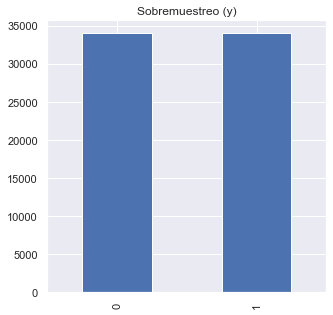

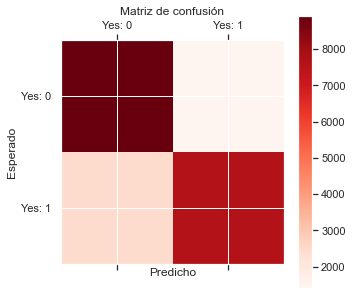

In [ ]:
accuracy_df_sobre = XGB_clasificador(df_encoded_dummy, 'sobre')

##### Conclusiones:
El sobremuestreo funciona relativamente bien con este dataset. Obtenemos un 81,27% de Accuracy. En general está cercano al 80% en todos las métricas. Detecta mejor los 0's que los 1's. Lo corroboramos con la matriz de confusión.

### 4.1.2 Submuestreo y modelado sobre el conjunto de datos tratados sin normalizar y sin reducción de características

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
-----------------------------------
Accuracy: 72.76%
-----------------------------------
-----------------------------------
Matriz de Confusion:
 [[1034  234]
 [ 462  825]]
-----------------------------------
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1268
           1       0.78      0.64      0.70      1287

    accuracy                           0.73      2555
   macro avg       0.74      0.73      0.73      2555
weighted avg       0.74      0.73      0.73      2555



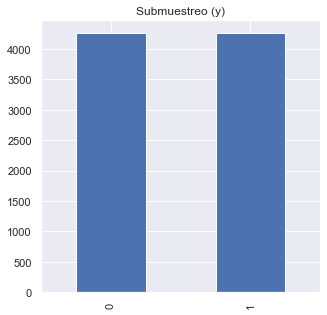

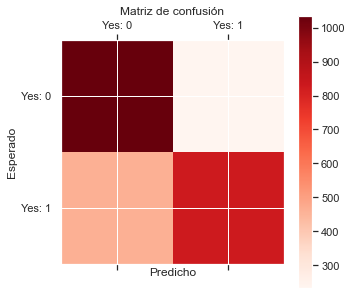

In [ ]:
accuracy_df_sub = XGB_clasificador(df_encoded_dummy, 'sub')

##### Conclusiones:
Obtenemos un peor resultado en general que el modelo anterior, con un Accuracy de 70,96%. EL comportamiento es similar, detectando mejor los 0's que los 1's.

## 4.2 Análisis con df_normalized_featureEncoded_encoded

En esta sección vamos a realizar las mismas pruebas que en el apartado anterior pero con el dataset tratado, normalizado y con la reducción de variables aplicada.

### 4.2.1 Sobremuestreo de la clase objetivo con reduccion de características

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
-----------------------------------
Accuracy: 78.04% 
-----------------------------------
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.74      0.86      0.80     10326
           1       0.83      0.69      0.76     10059

    accuracy                           0.78     20385
   macro avg       0.79      0.78      0.78     20385
weighted avg       0.79      0.78      0.78     20385

-----------------------------------
Matriz de Confusion:
 [[8926 1400]
 [3076 6983]]
-----------------------------------


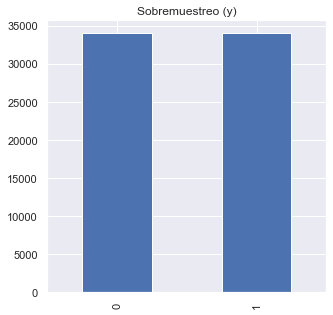

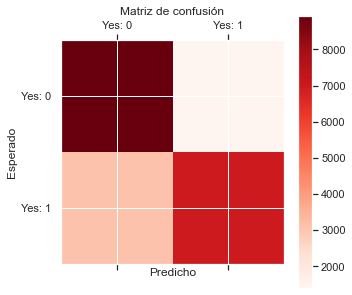

In [ ]:
accuracy_df_normalized_reduced_sobre = XGB_clasificador(df_normalized_featureReduced_encoded_dummy, 'sobre')

##### Conclusiones:
Este modelo nos da un Accuracy de 77,60%, ligeramente inferior al de 4.1.1. Por el contrario, observamos que detecta la clase 0 bastante peor que los modelos anteriores. lo vemos reflejado en la matriz de confusión.

### 4.2.2 Submuestreo de la clase objetivo con variables reducidas

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
-----------------------------------
Accuracy: 71.19%
-----------------------------------
-----------------------------------
Matriz de Confusion:
 [[1045  223]
 [ 513  774]]
-----------------------------------
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1268
           1       0.78      0.60      0.68      1287

    accuracy                           0.71      2555
   macro avg       0.72      0.71      0.71      2555
weighted avg       0.72      0.71      0.71      2555



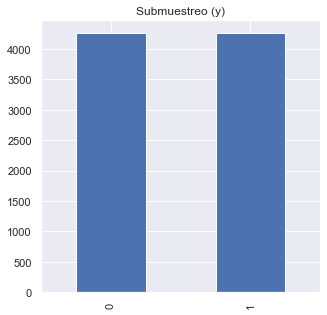

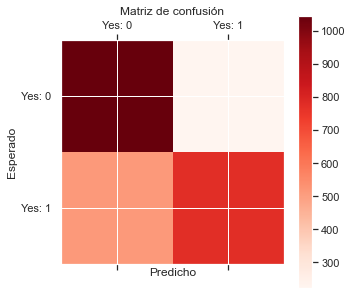

In [ ]:
accuracy_normalized_reduced_sub = XGB_clasificador(df_normalized_featureReduced_encoded_dummy, 'sub')

##### Conclusiones:
Obtenemos un Accuracy de 71%, lo cual es bastante malo pero además seguimos detectando la clase 1 muy mal, con un 62%.

## 4.3 Análisis con df_normalized sin reducción de datos

En este análisis vamos a utilizar el dataset sólo con los datos normalizados, vamos a realizar el oversampling y el undersampling y a analizar los diversos modelos.

### 4.3.1 Sobremuestreo de la clase objetivo con todas las variables

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
-----------------------------------
Accuracy: 80.73% 
-----------------------------------
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     10326
           1       0.85      0.74      0.79     10059

    accuracy                           0.81     20385
   macro avg       0.81      0.81      0.81     20385
weighted avg       0.81      0.81      0.81     20385

-----------------------------------
Matriz de Confusion:
 [[8980 1346]
 [2582 7477]]
-----------------------------------


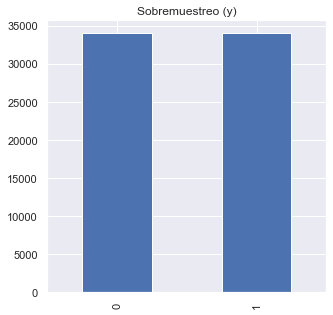

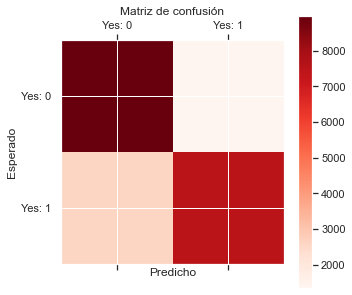

In [ ]:
accuracy_normalized_sobre = XGB_clasificador(df_normalized_encoded_dummy, 'sobre')

##### Conclusiones

Este modelo nos da una Accuracy de 81% aproximadamente. Por el contrario, el manejo de la clase 1 no es muy buena, con un 74%.

### 4.3.2 Submuestreo de la clase objetivo con todas las variables

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
-----------------------------------
Accuracy: 70.57%
-----------------------------------
-----------------------------------
Matriz de Confusion:
 [[998 270]
 [482 805]]
-----------------------------------
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1268
           1       0.75      0.63      0.68      1287

    accuracy                           0.71      2555
   macro avg       0.71      0.71      0.70      2555
weighted avg       0.71      0.71      0.70      2555



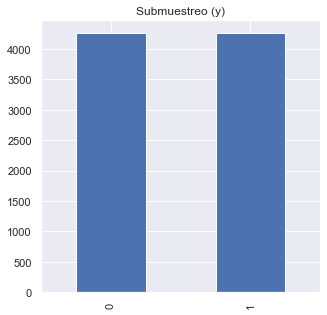

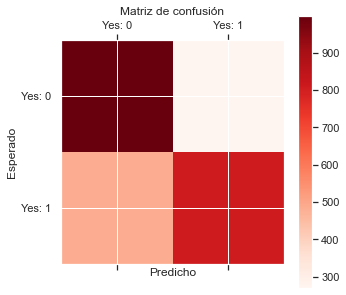

In [ ]:
accuracy_normalized_sub = XGB_clasificador(df_normalized_encoded_dummy, 'sub')

##### Conclusiones
Obtenemos un Accuracy de 70,57%. Sin embargo, manejamos la clase 1 bastante mal, con un 62%.

### 4.3.3 Sin balanceamiento de clase objetivo y con todas las variables


Accuracy: 89.71%

Matriz de Confusion:
 [[9956  256]
 [ 924  334]]
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10212
           1       0.57      0.27      0.36      1258

    accuracy                           0.90     11470
   macro avg       0.74      0.62      0.65     11470
weighted avg       0.88      0.90      0.88     11470



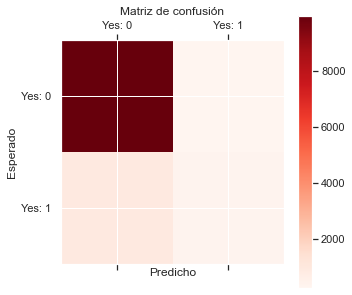

In [ ]:
accuracy_normalized = XGB_clasificador(df_normalized_encoded_dummy,'sin_rebalanceo')

##### Conclusiones

Este modelo sólo detecta la clase 0, porque la variable objetivo está muy desbalanceada, ya que hemos usado el dataser sin balanceo. Por eso tenemos un Accuracy de 89,71%, pero es engañoso. Viendo el Classification report y la matriz de confusión, el rendimiento de este modelo es muy malo, ya que solo determina una clase

## 4.4. Análisis del conjunto de datos con análisis de componentes principales

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
[15:09:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Accuracy: 83.22%
-----------------------------------
-----------------------------------
Matriz de Confusion:
 [[8899 1427]
 [1994 8065]]
-----------------------------------
-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     10326
           1       0.85      0.80      0.83     10059

    accuracy                           0.83     20385
   macro avg       0.83      0.83      0.83     20385
weighted avg       0.83      0.83      0.83     20385



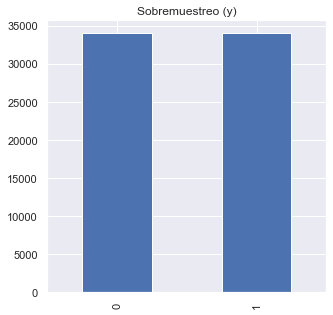

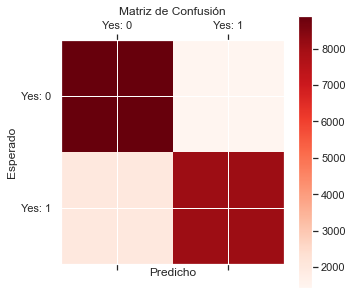

In [ ]:
# Contamos los valores de 0 y 1 de la variable objetivo
# ==============================================================================
count_class_0, count_class_1 = df_PCA.y.value_counts()

# Creamos un dataset para cada valor de y
# ==============================================================================
df_class_0 = df_PCA[df_PCA['y'] == 0]
df_class_1 = df_PCA[df_PCA['y'] == 1]


# Hacemos el remuestreo de la clase 0, eliminando registros de 0's, para obtener el mismo nº de 1's que de 0's
# ==============================================================================
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# Mostramos el recuento de los valores de y
# ==============================================================================
print('Sobremuestreo aleatorio:')
print(df_test_over.y.value_counts())

df_test_over.y.value_counts().plot(kind='bar', title='Sobremuestreo (y)',figsize=(5,5));


# Utilizamos los primeros 7 componentes, ya que con ellos conseguimos explicar el 90 por de la
# varianza 
# ==============================================================================

labels = df_test_over.columns[0:7]

# Separamos nuestros datos para obtener las características por un lado
# y la variable objetivo por otro.
# ==============================================================================
X = df_test_over[labels]
y = df_test_over['y']

# Creamos nuestros conjuntos de entrenamiento y test. Creamos nuestro modelo.
# Obtemeos las métricas de Accuracy y nuestra matriz de confunsión, ambas métricas
# necesarias para poder evaluar el buen desempeño del modelo.
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



print('-----------------------------------')
accuracy_PCA = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_PCA * 100.0))
print('-----------------------------------')

print('-----------------------------------')
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Matriz de Confusion:\n', matriz_confusion)
print('-----------------------------------')

print('-----------------------------------')
print('Classification Report')
print('-----------------------------------')
report = classification_report(y_test, y_pred)
print(report)


labels= ['Yes: 0', 'Yes: 1']
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Esperado')
plt.show()

##### Conclusiones
Este modelo nos ha dado mejor rendimiento que los demás. La detección de 1's es mejor que en los modelos anteriores, llegando casi al 80%, mientras que en accuracy obtenemos un 83%.

# 5. Tabla comparativa de resultados utilizando los diferentes conjuntos de datos

A continuación vamos a comparar los resultados obtenidos en los apartados anteriores. Esto incluye los resultados utilizando el mismo modelo, en nuestro caso, XGBClassifier, y utilizando los diferentes conjuntos de datos tratados, que recordamos son los siguientes:
   1. df: conjunto de datos tratado, sin duplicados ni atributos de ruido/ outliers
   2. df_normalized: conjunto de datos que parte del estado de df y además sus variables continuas están normalizadas el punto tres está comentado
   3. df_normalized_featureReduced: conjunto de datos que parte del estado de df_normalized y además se ha reducido el nº de variables aplicando métodos de selección de características.
   4. df_PCA: copnjunto de datos conformado por el resultado del análisis de los componentes principales.

Para pode trabajar con este modelo se requiere de variables numéricas por lo que hicimos uso de variables dummies para transformar aquellas variables categóricas en numéricas. 

Por tanto, ahora nos disponemos a conformar diversos dataset con los resultados para poder mostrarlos de forma ordenada y hacer su comparación más fácil.

In [ ]:
# Creamos las listas necesarias para crear el dataset
# ==============================================================================

accuracys = [accuracy_df_sobre,
accuracy_df_sub,
accuracy_df_normalized_reduced_sobre,
accuracy_normalized_reduced_sub,
accuracy_normalized_sobre,
accuracy_normalized_sub,
accuracy_normalized,
round(accuracy_PCA,2)]

labels_accuracys = ['Accuracy SobreMuestreo DF', 
                   'Accuracy SubMuestreo DF ',
                   'Accuracy SobreMuestreo DF FeatureSelection',
                   'Accuracy SubMuestreo DF FeatureSelection',
                   'Accuracy SobreMuestreo DF Normalized',
                   'Accuracy SubMuestreo DF Normalized',
                   'Accuracy SinRemuestreo DF normalizado',
                   'Accuracy SobreMuestreo DF PCA']

# Creamos el dataset con las listas creadas previamente
# ==============================================================================

df_accuracy = pd.DataFrame(data = accuracys ,columns = ['Accuracy'], index = labels_accuracys)

df_accuracy['Tipo_de_remuestreo'] = ['Sobremuestreo', 'Submuestreo',
                                    'Sobremuestreo','Submuestreo',
                                    'Sobremuestreo','Submuestreo',
                                    'Ninguno','Sobremuestreo']

df_accuracy['Seleccion_de_Caracteristicas'] =['No','No','Si','Si',
                                              'No', 'No', 'No', 'No']
df_accuracy['Datos_Normalizados'] = ['No','No','Si','Si',
                                    'Si','Si', 'Si','Si']

# Realizamos un groupby para agrupar por Tipo de muestreo, asi obtenemos la 
# media de los Accuracy de todos los modelos, y excluimos el conjunto de datos,
# que además no ha sido balanceado y desvirtua la media.
# ==============================================================================

group = df_accuracy.groupby(['Tipo_de_remuestreo'])
group.first()

,Accuracy,Seleccion_de_Caracteristicas,Datos_Normalizados
Tipo_de_remuestreo,,,
Ninguno,0.90,No,Si
Sobremuestreo,0.81,No,No
Submuestreo,0.73,No,No


###### Conclusiones
Con este agrupamiento podemos afirmar que la técnica de sobremuestreo nos ha dado bastante mejor rendimiento que la técnica de submuestreo, alrededor de un 10% superior de media. 

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

# Creamos nuestro conjunto de características para crear nuestro dataset
# ==============================================================================

labels_accuracy = [['Sobremuestreo', 'Submuestreo','Sobremuestreo','Submuestreo',
          'Sobremuestreo','Submuestreo','Ninguno','PCA_Sobremuestreo'],
          ['No','No','Si','Si','No', 'No', 'No', 'No'],
          ['No','No','Si','Si','Si','Si', 'Si','Si']]

# Creamos un multi índice 
# ==============================================================================
index = pd.MultiIndex.from_arrays(labels_accuracy, names=('Tipo_de_remuestreo',
                                                 'Seleccion_de_Caracteristicas',
                                                 'Datos_Normalizados'))

# Creamos el dataset con un multi índice
# ==============================================================================
df_accuracy_2= pd.DataFrame({'Accuracy': accuracys},
                  index=index)

df_accuracy_2.head(10)

,,,Accuracy
Tipo_de_remuestreo,Seleccion_de_Caracteristicas,Datos_Normalizados,
Sobremuestreo,No,No,0.81
Submuestreo,No,No,0.73
Sobremuestreo,Si,Si,0.78
Submuestreo,Si,Si,0.71
Sobremuestreo,No,Si,0.81
Submuestreo,No,Si,0.71
Ninguno,No,Si,0.90
PCA_Sobremuestreo,No,Si,0.83


##### Conclusiones
Observando esta otra tabla, observamos lo siguiente:
   1. El mejor modelo de clasificación obtenido es aquel en el que se ha utilizado el Análisis de Componentes principales, con un 83% de Accuracy, pero además si vamos al apartado 4.4.1, vemos que la detección de la clase 1 funciona en torno al 80%, siendo aceptable, y mejor que el resto.
   2. La selección de características no nos ha aportado ninguna mejora, de hecho el rendimiento ha empeorado frente al conjunto de datos que no usaba Feature Selection
   3. La normalización de los datos nos ha dado resultados similares frente al conjunto de datos que no estaba normalizado.
   4. Aparentemente el mejor modelo es el que no se le ha aplicado ningún tipo de remuestreo, pero este resultado es engañoso, pues como hemos visto en el apartado 4.3.3, ese 90% viene respaldado por el acierto de sólo una de las clases, en este caso la clase 0, por lo que es un modelo no válido.



# 6. Comparativa de modelos de clasificación

Una vez que hemos analizado los distintos métodos de preprocesamiento de datos, vamos a realizar la comparativa con varios modelos de clasficación. En este punto ya hemos realizado las pruebas con el clasificador XGBClassifier. 

Por tanto hemos decidido añadir a la comparativa los siguientes modelos de clasificación: **DecisionTree, RandomForest y SupportVectorMachine**. 

Lo que haremos será utilizar la búsqueda en malla junto con validación cruzada GridSearchCV, e indicaremos algunos conjuntos de hiperparámetros, para que realice todas las combinaciones. 

**Nota:** como el método de búsqueda en malla realiza una busqueda exhaustiva de los mejores hiperparámetros, el coste computacional es muy alto por lo que el tiempo de resolución también. Es por ello que hemos decidido incluir en la búsqueda en malla unos conjuntos de hiperparámetros no muy grandes, para aligerar la carga.

In [ ]:
# Recordamos los conjuntos de datos que hemos elaborado hasta ahora y que 
# vamos a usar para esta comparativa también.
# ==============================================================================

df_encoded_dummy = pd.get_dummies(df, dtype='float')

df_normalized_featureReduced_encoded_dummy = pd.get_dummies(df_normalized_featureReduced, dtype='float')

df_normalized_encoded_dummy = pd.get_dummies(df_normalized, dtype='float')



https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.htmlCon dataframe sin normalizar ni aplicar onehotencoder

Al modificar la profundidad máxima del arbol, obtenemos una gran mejora de rendimiento

## 6.1 Clasificador Decision Tree 
A continuzación creamos una función que incluye tanto el oversampling, como el undersampling, y utiliza como clasificador DecisionTree.

La variable con la que experimentamos en la validación cruzada es **ccalpha**. Esta variable se utiliza para poder aplicar un proceso de prunning o podado del árbol, en el que se deja crecer el árbol al máximo para luego podarlo y obtener el modelo más óptimo.

Explicación en profundidad de las ventajas de Prunning o podado.

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html


In [ ]:
def DecisionTree_clasificador_CV(df,x):
    if x == 'sub':
        # Validación con submuestreo
        # ==============================================================================
        
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]
        
        
        # Hacemos el remuestreo de la clase 0, eliminando registros de 0's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================
        df_class_0_under = df_class_0.sample(count_class_1)
        df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================
        print('Submuestreo aleatorio:')
        print(df_test_under.y.value_counts())

        df_test_under.y.value_counts().plot(kind='bar', title='Submuestreo aleatorio (y)',figsize=(5,5))

        # Conjuntos de datos de entrenamiento y test
        # ==============================================================================
        X_train, X_test, y_train, y_test = train_test_split(
                                                df_test_under.drop(columns = 'y'),
                                                df_test_under['y'],
                                                random_state = 123
                                            )


        # Post pruning (podado del árbol) por validación cruzada
        # ------------------------------------------------------------------------------
        # Valores de ccp_alpha evaluados
        param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

        # Búsqueda por validación cruzada
        grid = GridSearchCV(
                # El árbol se crece al máximo posible antes de aplicar el pruning
                estimator = DecisionTreeClassifier(
                                    max_depth         = None,
                                    min_samples_split = 2,
                                    min_samples_leaf  = 1,
                                    random_state      = 123
                               ),
                param_grid = param_grid,
                scoring    = 'accuracy',
                cv         = 10,
                refit      = True,
                return_train_score = True
              )

        grid.fit(X_train, y_train)

        # Mejor valor ccp_alpha encontrado
        # ------------------------------------------------------------------------------
        print("\nMejor parámetro de modelo tras la validación cruzada")
        print("-------------------")
        print('\n',grid.best_params_)

        # Estructura del árbol final
        # ------------------------------------------------------------------------------
        modelo_final = grid.best_estimator_
        print(f"\nProfundidad del árbol: {modelo_final.get_depth()}")
        print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

        predicciones = modelo_final.predict(X = X_test)

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)


        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")
        
        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)

        # Matriz de confusión con mapa de calor
        # ==============================================================================

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        
        
        print("Importancia de los predictores en el modelo")
        print("-------------------------------------------")
        importancia_predictores = pd.DataFrame(
                                    {'predictor': df_test_under.drop('y', axis=1).columns,
                                     'importancia': modelo_final.feature_importances_}
                                    )
        print(importancia_predictores.iloc[0:10, :].sort_values('importancia', ascending=False))
        
        return accuracy
    
    
    elif x == 'sobre':
        # Validación con sobremuestreo sin normalizar 
        # ==============================================================================
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]
        
        # Hacemos el remuestreo de la clase 1, aumentando registros de 1's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================

        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Sobremuestreo aleatorio:')
        print(df_test_over.y.value_counts())

        df_test_over.y.value_counts().plot(kind='bar', title='Sobremuestreo aleatorio (y)', figsize=(5,5))


        # Conjuntos de datos de entrenamiento y test
        # ==============================================================================
        X_train, X_test, y_train, y_test = train_test_split(
                                                df_test_over.drop(columns = 'y'),
                                                df_test_over['y'],
                                                random_state = 123
                                            )


        # Post pruning (podado del árbol) por validación cruzada
        # ==============================================================================
        # Valores de ccp_alpha evaluados
        # ==============================================================================
        param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

        # Búsqueda por validación cruzada
        grid = GridSearchCV(
                # El árbol se crece al máximo posible antes de aplicar el pruning
                estimator = DecisionTreeClassifier(
                                    max_depth         = None,
                                    min_samples_split = 2,
                                    min_samples_leaf  = 1,
                                    random_state      = 123
                               ),
                param_grid = param_grid,
                scoring    = 'accuracy',
                cv         = 10,
                refit      = True,
                return_train_score = True
              )

        grid.fit(X_train, y_train)

        # Mejor valor ccp_alpha encontrado
        # ==============================================================================
        print("\nMejor parámetro de modelo tras la validación cruzada")
        print("-------------------")
        print('\n',grid.best_params_)

        # Estructura del árbol final
        # ==============================================================================
        modelo_final = grid.best_estimator_
        print(f"\nProfundidad del árbol: {modelo_final.get_depth()}")
        print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

        predicciones = modelo_final.predict(X = X_test)

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)


        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")
        
        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)
        
        # Matriz de confusión con mapa de calor
        # ==============================================================================

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        
        # Mostramos la importancia de los predictores
        # ==============================================================================
        
        print("Importancia de los predictores en el modelo")
        print("-------------------------------------------")
        importancia_predictores = pd.DataFrame(
                                    {'predictor': df_test_over.drop('y', axis=1).columns,
                                     'importancia': modelo_final.feature_importances_}
                                    )
        print(importancia_predictores.iloc[0:10, :].sort_values('importancia', ascending=False))

        return accuracy
    
    elif x == 'pca':
        
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]

        # Hacemos el remuestreo de la clase 1, aumentando registros de 1's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================
        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Sobremuestreo aleatorio:')
        print(df_test_over.y.value_counts())

        df_test_over.y.value_counts().plot(kind='bar', title='Sobremuestreo aleatorio (y)',figsize=(5,5));

        # Utilizamos los primeros 7 componentes, ya que con ellos conseguimos explicar el 90 por de la
        # varianza (mirar apartado 4.4.1) 
        # ==============================================================================

        labels = df_test_over.columns[0:7]

        # Conjuntos de datos de entrenamiento y test
        # ==============================================================================


        X = df_test_over[labels]
        y = df_test_over['y']

        X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                random_state = 123
                                            )


        # Post pruning (podado del árbol) por validación cruzada
        # ==============================================================================

        # Valores de ccp_alpha evaluados
        # ==============================================================================

        param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

        # Búsqueda por validación cruzada
        # ==============================================================================

        grid = GridSearchCV(
                # El árbol se crece al máximo posible antes de aplicar el pruning
                estimator = DecisionTreeClassifier(
                                    max_depth         = None,
                                    min_samples_split = 2,
                                    min_samples_leaf  = 1,
                                    random_state      = 123
                               ),
                param_grid = param_grid,
                scoring    = 'accuracy',
                cv         = 10,
                refit      = True,
                return_train_score = True
              )
        
        # Entrenamos el modelo
        # ==============================================================================

        grid.fit(X_train, y_train)

        # Mejor valor ccp_alpha encontrado
        # ==============================================================================
        print("\nMejor parámetro de modelo tras la validación cruzada")
        print("-------------------")
        print(grid.best_params_)

        # Estructura del árbol final
        # ==============================================================================
        modelo_final = grid.best_estimator_
        print(f"\nProfundidad del árbol: {modelo_final.get_depth()}")
        print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

        # Cálculo de predicciones
        # ==============================================================================

        predicciones = modelo_final.predict(X = X_test)



        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)

        # Cálculo de Accuracy
        # ==============================================================================

        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")

        # Cálculo de Classification Report
        # ==============================================================================

        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)


        # Matriz de confusión con mapa de calor
        # ==============================================================================

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        

        return accuracy
    
    else:
        pass



### 6.1.1 Validación cruzada con submuestreo aleatorio y datos sin normalizar

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64

Mejor parámetro de modelo tras la validación cruzada
-------------------

 {'ccp_alpha': 0.0}

Profundidad del árbol: 31
Número de nodos terminales: 1934

Matriz de confusión
-------------------
[[672 375]
 [404 678]]

El accuracy de test es: 63.41005166744951 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1047
           1       0.64      0.63      0.64      1082

    accuracy                           0.63      2129
   macro avg       0.63      0.63      0.63      2129
weighted avg       0.63      0.63      0.63      2129



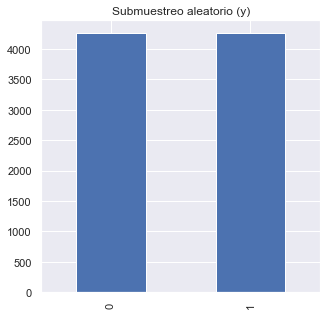

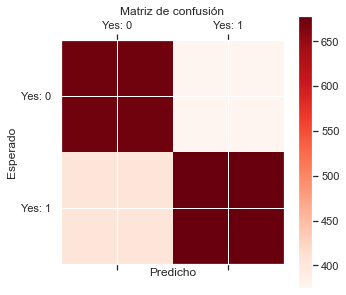

Importancia de los predictores en el modelo
-------------------------------------------
         predictor  importancia
7      nr.employed     0.205015
0              age     0.183385
6        euribor3m     0.088825
5    cons.conf.idx     0.046257
8       job_admin.     0.020950
9  job_blue-collar     0.017387
1            pdays     0.011335
2         previous     0.010466
4   cons.price.idx     0.006758
3     emp.var.rate     0.002599


In [ ]:
accuracy_DecisionTree_DF_normal_sub = DecisionTree_clasificador_CV(df_encoded_dummy,'sub')

##### Conclusiones 
El rendimiento obtenido en este modelo es bastante malo, con un 63 % de Accuracy. Además podemos observar en la matriz de confunsión que la detección de 0's y 1's es bastante similar, pero ha errado muchas predicciones.

### 6.1.2 Validación cruzada sobre datos con sobremuestreo y datos sin normalizar

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64

Mejor parámetro de modelo tras la validación cruzada
-------------------

 {'ccp_alpha': 0.0}

Profundidad del árbol: 40
Número de nodos terminales: 6029

Matriz de confusión
-------------------
[[7573  980]
 [  33 8402]]

El accuracy de test es: 94.03696727101483 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      8553
           1       0.90      1.00      0.94      8435

    accuracy                           0.94     16988
   macro avg       0.95      0.94      0.94     16988
weighted avg       0.95      0.94      0.94     16988



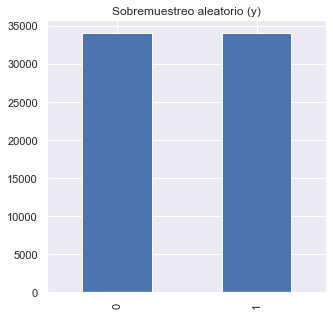

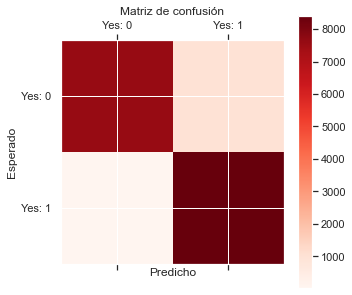

Importancia de los predictores en el modelo
-------------------------------------------
         predictor  importancia
7      nr.employed     0.208226
0              age     0.176146
6        euribor3m     0.086480
5    cons.conf.idx     0.043628
8       job_admin.     0.021612
4   cons.price.idx     0.016558
9  job_blue-collar     0.013939
1            pdays     0.011405
2         previous     0.006391
3     emp.var.rate     0.001758


In [ ]:
accuracy_DecisionTree_DF_normal_sobre = DecisionTree_clasificador_CV(df_encoded_dummy,'sobre')

##### Conclusiones
En este modelo hemos obtenido un Accuracy cercano al 94% manejando casi a la perfección la clase 1, y también una muy buena detección de la clase 0. En general el rendimiento de este modelo con este conjunto de datos es muy bueno.


### 6.1.3 Validación cruzada con submuestreo, variables normalizadas y reducción de características

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64

Mejor parámetro de modelo tras la validación cruzada
-------------------

 {'ccp_alpha': 0.0}

Profundidad del árbol: 29
Número de nodos terminales: 2071

Matriz de confusión
-------------------
[[765 282]
 [462 620]]

El accuracy de test es: 65.05401596993894 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1047
           1       0.69      0.57      0.63      1082

    accuracy                           0.65      2129
   macro avg       0.66      0.65      0.65      2129
weighted avg       0.66      0.65      0.65      2129



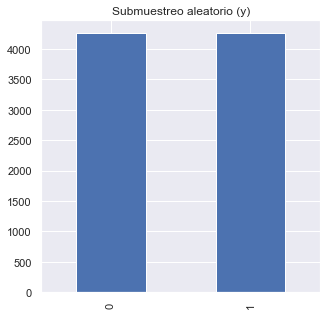

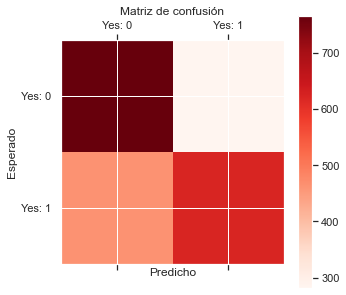

Importancia de los predictores en el modelo
-------------------------------------------
          predictor  importancia
5       nr.employed     0.266049
4     cons.conf.idx     0.072366
6        job_admin.     0.026939
7   job_blue-collar     0.025217
0             pdays     0.013104
3    cons.price.idx     0.011330
8  job_entrepreneur     0.007864
9     job_housemaid     0.007117
2      emp.var.rate     0.005603
1          previous     0.004779


In [ ]:
accuracy_DTree_DF_featureReduced_normalized = DecisionTree_clasificador_CV(df_normalized_featureReduced_encoded_dummy,'sub')

##### Conclusiones
Con este conjunto de datos hemos mejorado el desempeño en Accuracy con respecto al apartado 6.1.1 en torno a un 2%, pero sigue estando lejos de lo que se puede considerar un modelo aceptable.

### 6.1.4 Validación cruzada con sobremuestreo, variables normalizadas y reducción de características

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64

Mejor parámetro de modelo tras la validación cruzada
-------------------

 {'ccp_alpha': 0.0}

Profundidad del árbol: 32
Número de nodos terminales: 5204

Matriz de confusión
-------------------
[[7110 1443]
 [1078 7357]]

El accuracy de test es: 85.16011302095598 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8553
           1       0.84      0.87      0.85      8435

    accuracy                           0.85     16988
   macro avg       0.85      0.85      0.85     16988
weighted avg       0.85      0.85      0.85     16988



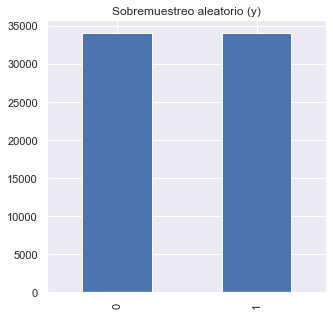

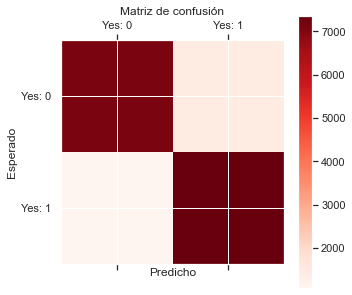

Importancia de los predictores en el modelo
-------------------------------------------
          predictor  importancia
5       nr.employed     0.277686
4     cons.conf.idx     0.068847
3    cons.price.idx     0.026595
6        job_admin.     0.023168
0             pdays     0.020305
7   job_blue-collar     0.015930
8  job_entrepreneur     0.009959
1          previous     0.009428
9     job_housemaid     0.006584
2      emp.var.rate     0.005716


In [ ]:
accuracy_Dtree_featureReduced_normalized = DecisionTree_clasificador_CV(df_normalized_featureReduced_encoded_dummy,'sobre')

##### Conclusiones
En esta prueba observamos como al hacer reducción de características y haber eliminado la variable **age**, la cual estábamos viendo que era una de las variables más importantes para predecir, el rendimiento del modelo baja en torno a un 10% con respecto al apartado 6.1.2

### 6.1.5 Validación cruzada con submuestreo y variables normalizadas

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64

Mejor parámetro de modelo tras la validación cruzada
-------------------

 {'ccp_alpha': 0.0}

Profundidad del árbol: 32
Número de nodos terminales: 1843

Matriz de confusión
-------------------
[[674 373]
 [396 686]]

El accuracy de test es: 63.87975575387506 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      1047
           1       0.65      0.63      0.64      1082

    accuracy                           0.64      2129
   macro avg       0.64      0.64      0.64      2129
weighted avg       0.64      0.64      0.64      2129



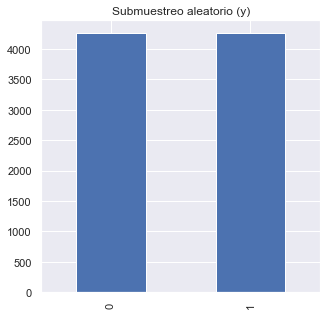

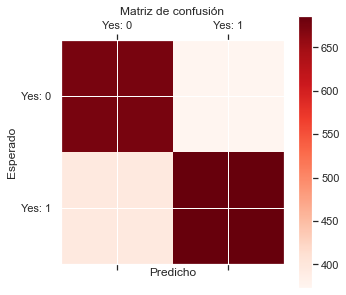

Importancia de los predictores en el modelo
-------------------------------------------
         predictor  importancia
7      nr.employed     0.206085
0              age     0.169944
6        euribor3m     0.099973
5    cons.conf.idx     0.047201
8       job_admin.     0.022296
9  job_blue-collar     0.015325
3     emp.var.rate     0.013072
1            pdays     0.008270
4   cons.price.idx     0.007754
2         previous     0.007337


In [ ]:
accuracy_Dtree_normalized_sub = DecisionTree_clasificador_CV(df_normalized_encoded_dummy,'sub')

##### Conclusiones
Seguimos con un rendmiento del modelo en torno al 64%. Maneja las clases 0 y 1 por igual, acertándo y errando un nº similar de veces.

### 6.1.6 Validación con sobremuestreo con variables continuas normalizados

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64

Mejor parámetro de modelo tras la validación cruzada
-------------------

 {'ccp_alpha': 0.0}

Profundidad del árbol: 38
Número de nodos terminales: 5897

Matriz de confusión
-------------------
[[7566  987]
 [  19 8416]]

El accuracy de test es: 94.0781728278785 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      8553
           1       0.90      1.00      0.94      8435

    accuracy                           0.94     16988
   macro avg       0.95      0.94      0.94     16988
weighted avg       0.95      0.94      0.94     16988



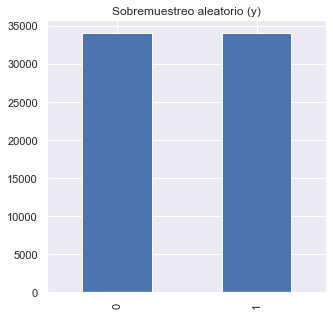

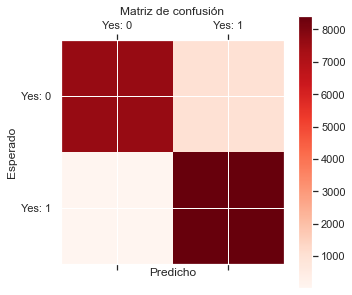

Importancia de los predictores en el modelo
-------------------------------------------
         predictor  importancia
7      nr.employed     0.205000
0              age     0.179030
6        euribor3m     0.103678
5    cons.conf.idx     0.045887
8       job_admin.     0.018199
9  job_blue-collar     0.016119
1            pdays     0.011169
2         previous     0.007941
4   cons.price.idx     0.006344
3     emp.var.rate     0.001269


In [ ]:
accuracy_Dtree_normalized_sobre = DecisionTree_clasificador_CV(df_normalized_encoded_dummy,'sobre')

###### Conclusiones
Obtenemos un muy buen rendimiento, en torno al 94%. Manejamos las dos clases 0 y 1 muy bien. De hecho la clase 1 casi la maneja a la perfección, lo cual es extremadamente interesante para nuestro problema, que es detectar cuando un cliente va a aceptar una oferta.

###  6.1.7 Validación cruzada con sobremuestreo aplicado a componentes principales

En este caso no hacemos la prueba con submuestreo, pues ya hemos observado en todas las pruebas anteriores que esta técnica funciona bastante peor.

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64

Mejor parámetro de modelo tras la validación cruzada
-------------------
{'ccp_alpha': 0.0}

Profundidad del árbol: 49
Número de nodos terminales: 4144

Matriz de confusión
-------------------
[[7566  987]
 [  30 8405]]

El accuracy de test es: 94.01342123852132 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      8553
           1       0.89      1.00      0.94      8435

    accuracy                           0.94     16988
   macro avg       0.95      0.94      0.94     16988
weighted avg       0.95      0.94      0.94     16988



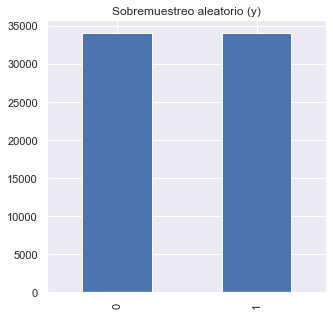

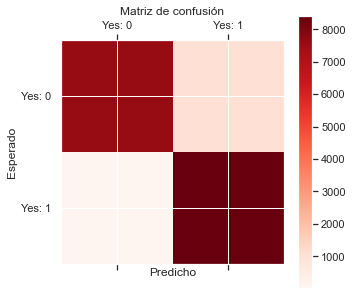

In [ ]:
accuracy_Dtree_DF_PCA = DecisionTree_clasificador_CV(df_PCA,'pca')

###### Conclusiones
Este modelo usando componentes principales también funciona muy bien, obteniendo un Accuracy cercano a 94%. Maneja la clase 1 extremadamente bien, y la clase 0 muy bien. 

## 6.2 Clasificador Random Forest

En esta sección vamos a realizar las mismas pruebas que hemos realizado en el apartado anterior pero esta vez con el modelo **RandomForest Classifier**. Empezaremos creando un método que incluirá las opciones de realizar sobremuestreo, submuestreo y el análisis de componentes principales.

Una vez realizado esto, continuaremos con los siguientes apartados que incluyen la validación cruzada con los diferentes conjuntos de datos creados anteriormente.

En este caso los hiperparámetros escogidos para hacer la búsqueda en malla son:

    1. n_estimators: el número de estimadores del modelo
    2. max_features: máximo número de características 
    3. max_depth: máxima profundidad del árbol
    4. criterion: elige la función para medir la calidad de una subrama

In [ ]:
def RandomForest_Classifier_CV(df,x):
    if x == 'sub':
        # Validación con submuestreo
        # ==============================================================================

        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]
        
        
        # Hacemos el remuestreo de la clase 0, eliminando registros de 0's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================
        df_class_0_under = df_class_0.sample(count_class_1)
        df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Submuestreo aleatorio:')
        print(df_test_under.y.value_counts())

        df_test_under.y.value_counts().plot(kind='bar', title='Submuestreo aleatorio (y)',figsize=(5,5))

        # Conjuntos de datos de entrenamiento y test
        # ------------------------------------------------------------------------------
        X_train, X_test, y_train, y_test = train_test_split(
                                                df_test_under.drop(columns = 'y'),
                                                df_test_under['y'],
                                                random_state = 123
                                            )


        # Grid de hiperparámetros evaluados
        # ==============================================================================
        param_grid = {'n_estimators': [150,250,350],
                      'max_features': [5, 7, 9],
                      'max_depth'   : [None, 30],
                      'criterion'   : ['gini', 'entropy']
                     }

        # Búsqueda por grid search con validación cruzada
        # ==============================================================================
        grid = GridSearchCV(
                estimator  = RandomForestClassifier(random_state = 123),
                param_grid = param_grid,
                scoring    = 'accuracy',
                n_jobs     = multiprocessing.cpu_count() - 1,
                cv         = 3,
#                 cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
                refit      = True,
                verbose    = 0,
                return_train_score = True
               )

        # Entrenamos el modelo
        # ==============================================================================
        grid.fit(X = X_train, y = y_train)
        
        
        # Obtenemos el mejor modelo
        # ==============================================================================
        modelo_final = grid.best_estimator_
            
        
        # Mejores hiperparámetros por validación cruzada
        # ==============================================================================
        print("----------------------------------------")
        print("Mejores hiperparámetros encontrados (cv)")
        print("----------------------------------------")
        print(grid.best_params_, ":", grid.best_score_, grid.scoring)
        
        # Cálculo de predicciones
        # ==============================================================================
        
        predicciones = modelo_final.predict(X = X_test)
        
        # Matriz de confusión 
        # ==============================================================================

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)

        # Cálculo de Accuracy
        # ==============================================================================

        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")
        
        # Cálculo de Classification Report
        # ==============================================================================

        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)

        # Matriz de confusión con mapa de calor
        # ==============================================================================
        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        
        
        # Mostramos las variables predictoras más importantes
        # ==============================================================================
               
        print("Importancia de los predictores en el modelo")
        print("-------------------------------------------")
        importancia_predictores = pd.DataFrame(
                                    {'predictor': df_test_under.drop('y', axis=1).columns,
                                     'importancia': modelo_final.feature_importances_}
                                    )
        print(importancia_predictores.iloc[0:10, :].sort_values('importancia', ascending=False))

        
        return accuracy

    elif x == 'sobre':
        
        # Validación con sobremuestreo
        # ==============================================================================
        
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]
        
        # Hacemos el remuestreo de la clase 1, aumentando registros de 1's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================

        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Sobremuestreo aleatorio:')
        print(df_test_over.y.value_counts())

        df_test_over.y.value_counts().plot(kind='bar', title='Sobremuestreo aleatorio (y)', figsize=(5,5))


        # Conjuntos de datos de entrenamiento y test
        # ==============================================================================
        X_train, X_test, y_train, y_test = train_test_split(
                                                df_test_over.drop(columns = 'y'),
                                                df_test_over['y'],
                                                random_state = 123
                                            )


        # Grid de hiperparámetros evaluados
        # ==============================================================================
        param_grid = {'n_estimators': [150,250,350],
                      'max_features': [5, 7, 9],
                      'max_depth'   : [None, 30],
                      'criterion'   : ['gini', 'entropy']
                     }

        # Búsqueda por grid search con validación cruzada del mejor estimador
        # ==============================================================================
        grid = GridSearchCV(
                estimator  = RandomForestClassifier(random_state = 123),
                param_grid = param_grid,
                scoring    = 'accuracy',
                n_jobs     = multiprocessing.cpu_count() - 1,
                cv         = 3,
#                 cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
                refit      = True,
                verbose    = 0,
                return_train_score = True
               )

        # Entrenamos el modelo
        # ==============================================================================
        grid.fit(X = X_train, y = y_train)
        
        # Obtenemos el mejor modelo
        # ==============================================================================
        
        modelo_final = grid.best_estimator_
            
        
        # Mejores hiperparámetros por validación cruzada
        # ==============================================================================
        print("----------------------------------------")
        print("Mejores hiperparámetros encontrados (cv)")
        print("----------------------------------------")
        print(grid.best_params_, ":", grid.best_score_, grid.scoring)
        
        
        # Calculamos las predicciones del modelo
        # ==============================================================================
        
        predicciones = modelo_final.predict(X = X_test)
        
        # Calculamos la matriz de confusión
        # ==============================================================================

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)
        
        # Calculamos el Accuracy
        # ==============================================================================


        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")
        
        # Cálculo de Classification Report
        # ==============================================================================

        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)


        # Matriz de confusión con mapa de calor
        # ==============================================================================

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        
        # Mostramos las variables predictoras más importantes
        # ==============================================================================
               
        print("Importancia de los predictores en el modelo")
        print("-------------------------------------------")
        importancia_predictores = pd.DataFrame(
                                    {'predictor': df_test_over.drop('y', axis=1).columns,
                                     'importancia': modelo_final.feature_importances_}
                                    )
        print(importancia_predictores.iloc[0:10, :].sort_values('importancia', ascending=False))
        
        return accuracy
        
    
    elif x == 'pca':
        
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df_PCA.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df_PCA[df_PCA['y'] == 0]
        df_class_1 = df_PCA[df_PCA['y'] == 1]
        
        # Hacemos el remuestreo de la clase 1, aumentando registros de 1's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================

        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Sobremuestreo aleatorio:')
        print(df_test_over.y.value_counts())

        df_test_over.y.value_counts().plot(kind='bar', title='Count (y)',figsize=(5,5));

        # Utilizamos los primeros 7 componentes, ya que con ellos conseguimos explicar el 90 por de la
        # varianza 
        # ==============================================================================

        labels = df_test_over.columns[0:7]

        X = df_test_over[labels]
        y = df_test_over['y']

        # Conjuntos de datos de entrenamiento y test
        # ------------------------------------------------------------------------------
        X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                random_state = 123
                                            )
        
        # Grid de hiperparámetros evaluados
        # ==============================================================================
        param_grid = {'n_estimators': [150,250,350],
                      'max_features': [5, 7, 9],
                      'max_depth'   : [None, 30],
                      'criterion'   : ['gini', 'entropy']
                     }

        # Búsqueda por grid search con validación cruzada
        # ==============================================================================
        grid = GridSearchCV(
                estimator  = RandomForestClassifier(random_state = 123),
                param_grid = param_grid,
                scoring    = 'accuracy',
                n_jobs     = multiprocessing.cpu_count() - 1,
                cv         = 3,
#                 cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
                refit      = True,
                verbose    = 0,
                return_train_score = True
               )
        
        # Entrenamos el modelo
        # ==============================================================================

        grid.fit(X = X_train, y = y_train)
        
        # Obtenemos el mejor modelo
        # ==============================================================================
        modelo_final = grid.best_estimator_
            
        
        # Mejores hiperparámetros por validación cruzada
        # ==============================================================================
        print("----------------------------------------")
        print("Mejores hiperparámetros encontrados (cv)")
        print("----------------------------------------")
        print(grid.best_params_, ":", grid.best_score_, grid.scoring)


        # Mejor valor ccp_alpha encontrado
        # ==============================================================================
        print("\nMejor parámetro de modelo tras la validación cruzada")
        print("-------------------")
        print(grid.best_params_)
        
        # Calculamos las predicciones
        # ==============================================================================

        predicciones = modelo_final.predict(X = X_test)
        
        # Calculamos la matriz de confusión
        # ==============================================================================

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)
        
        # Calculamos la precisión
        # ==============================================================================
        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")
        
        # Cálculo de Classification Report
        # ==============================================================================

        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)
        
        # Mostramos la matriz de confusión en mapa de calor
        # ==============================================================================

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        
        return accuracy

    else:
        pass
    
    
    
    
    
    

### 6.2.1 Validación cruzada con submuestreo y variables continuas sin normalizar

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 30, 'max_features': 7, 'n_estimators': 250} : 0.723102009956785 accuracy

Matriz de confusión
-------------------
[[794 253]
 [363 719]]

El accuracy de test es: 71.06622827618601 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1047
           1       0.74      0.66      0.70      1082

    accuracy                           0.71      2129
   macro avg       0.71      0.71      0.71      2129
weighted avg       0.71      0.71      0.71      2129



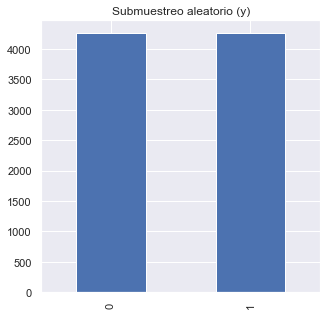

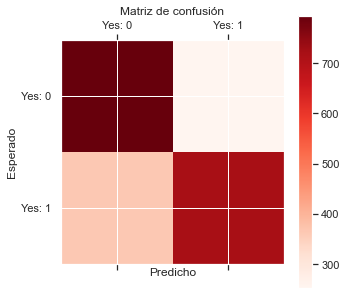

Importancia de los predictores en el modelo
-------------------------------------------
         predictor  importancia
0              age     0.177047
6        euribor3m     0.138453
7      nr.employed     0.056283
3     emp.var.rate     0.034215
5    cons.conf.idx     0.027370
4   cons.price.idx     0.024523
8       job_admin.     0.021059
1            pdays     0.018523
9  job_blue-collar     0.016620
2         previous     0.011830


In [ ]:
accuracy_RF_sinNormalizar_sub = RandomForest_Classifier_CV(df_encoded_dummy,'sub')

##### Conclusiones
Este modelo nos da un 74% de Accuracy. Además maneja muy mal la clase 1 tal como se puede ver en la matriz de confusión.

### 6.2.2 Validación cruzada sobremuestreo y variables continuas sin normalizar

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 350} : 0.9356383252433091 accuracy

Matriz de confusión
-------------------
[[7777  776]
 [  23 8412]]

El accuracy de test es: 95.29668000941841 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      8553
           1       0.92      1.00      0.95      8435

    accuracy                           0.95     16988
   macro avg       0.96      0.95      0.95     16988
weighted avg       0.96      0.95      0.95     16988



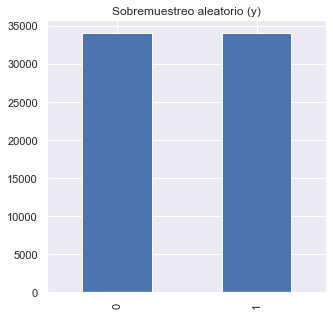

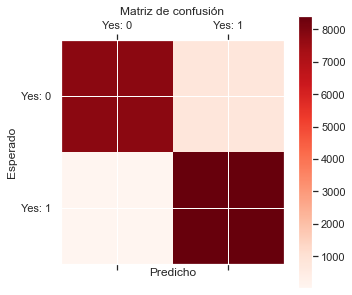

Importancia de los predictores en el modelo
-------------------------------------------
         predictor  importancia
0              age     0.206485
6        euribor3m     0.145697
7      nr.employed     0.071561
3     emp.var.rate     0.045521
5    cons.conf.idx     0.026615
4   cons.price.idx     0.023194
1            pdays     0.019444
8       job_admin.     0.018990
9  job_blue-collar     0.015181
2         previous     0.009658


In [ ]:
accuracy_RF_sinNormalizar_sobre = RandomForest_Classifier_CV(df_encoded_dummy,'sobre')

###### Conclusiones
Este modelo es el que mejor resultados nos ha dado de todas las pruebas realizadas hasta ahora. Hemos obtenido un 95% de Accuracy, pero además la clase 1 la maneja casi a la perfección. 

### 6.2.3 Validación cruzada con submuestreo, variables continuas normalizadas y reducción de características

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 30, 'max_features': 7, 'n_estimators': 250} : 0.7127641791185337 accuracy

Matriz de confusión
-------------------
[[789 258]
 [382 700]]

El accuracy de test es: 69.93893846876468 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1047
           1       0.73      0.65      0.69      1082

    accuracy                           0.70      2129
   macro avg       0.70      0.70      0.70      2129
weighted avg       0.70      0.70      0.70      2129



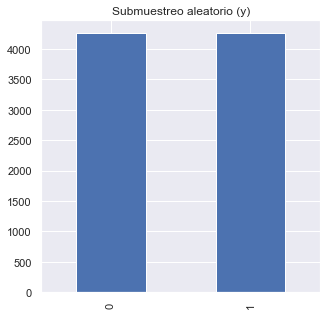

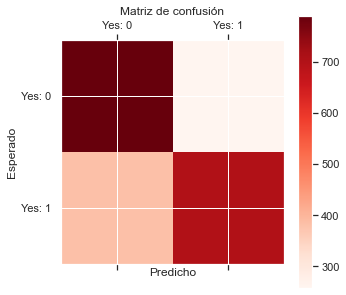

Importancia de los predictores en el modelo
-------------------------------------------
          predictor  importancia
5       nr.employed     0.100459
2      emp.var.rate     0.070708
4     cons.conf.idx     0.050587
3    cons.price.idx     0.043057
6        job_admin.     0.026130
0             pdays     0.025610
7   job_blue-collar     0.020575
1          previous     0.018466
8  job_entrepreneur     0.011485
9     job_housemaid     0.007132


In [ ]:
accuracy_RF_Normalized_FeatureReduced_sub = RandomForest_Classifier_CV(df_normalized_featureReduced_encoded_dummy,'sub')

##### Conclusiones
Usando las variables normalizadas y la reducción de características vemos como empeora el desempeño. Tal como hemos comentado anteriormente, esto se debe a que una de las variables que hemos eliminado es 'age', y hemos observado en otras pruebas que esa variable es un predictor importante.

### 6.2.4 Validación cruzada con sobremuestreo, variables continuas normalizadas y reducción de características

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 30, 'max_features': 9, 'n_estimators': 350} : 0.8432361446943132 accuracy

Matriz de confusión
-------------------
[[7071 1482]
 [ 914 7521]]

El accuracy de test es: 85.89592653637862 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      8553
           1       0.84      0.89      0.86      8435

    accuracy                           0.86     16988
   macro avg       0.86      0.86      0.86     16988
weighted avg       0.86      0.86      0.86     16988



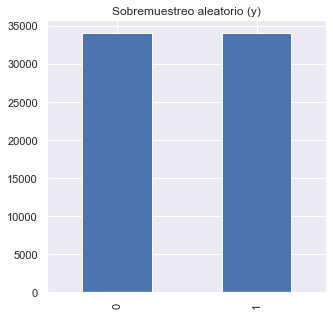

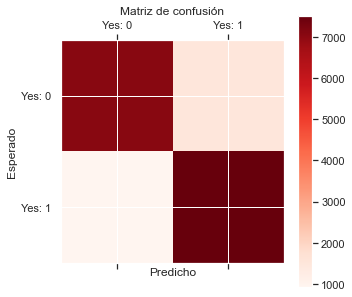

Importancia de los predictores en el modelo
-------------------------------------------
          predictor  importancia
5       nr.employed     0.089553
2      emp.var.rate     0.065726
4     cons.conf.idx     0.038230
3    cons.price.idx     0.035210
0             pdays     0.033357
6        job_admin.     0.028691
7   job_blue-collar     0.020612
1          previous     0.018208
8  job_entrepreneur     0.011954
9     job_housemaid     0.008542


In [ ]:
accuracy_RF_Normalized_FeatureReduced_sobre = RandomForest_Classifier_CV(df_normalized_featureReduced_encoded_dummy,'sobre')

##### Conclusiones
Lo que podemos observar con este modelo es que el rendimiendo empeora con respecto a la prueba realizada en el apartado 6.2.2, principalmente por no tener la variable 'age'. A pesar de eso maneja ambas clases bastante bien.

### 6.2.5 Validación cruzada con submuestreo y variables continuas normalizadas 

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} : 0.7191852341045192 accuracy

Matriz de confusión
-------------------
[[795 252]
 [392 690]]

El accuracy de test es: 69.75105683419446 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1047
           1       0.73      0.64      0.68      1082

    accuracy                           0.70      2129
   macro avg       0.70      0.70      0.70      2129
weighted avg       0.70      0.70      0.70      2129



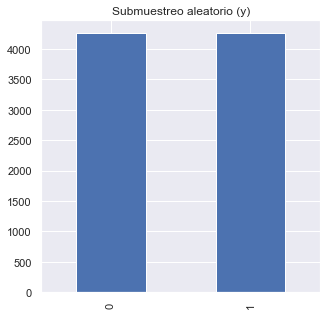

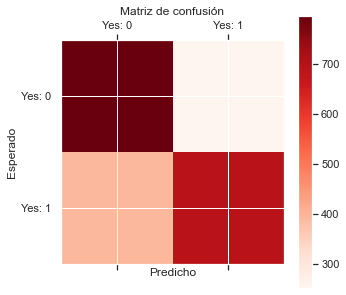

Importancia de los predictores en el modelo
-------------------------------------------
     predictor  importancia
0          age     0.222605
1          job     0.097309
3    education     0.088734
8  day_of_week     0.074813
2      marital     0.047809
4      housing     0.038166
5         loan     0.027068
7        month     0.020585
9        pdays     0.018747
6      contact     0.014197


In [ ]:
accuracy_RF_Normalized_sub = RandomForest_Classifier_CV(df_normalized_encoded,'sub')

###### Conclusiones
Aunque tengamos todas las variables obtenemos un pobre Accuracy sobre el 72%, lo cual no es aceptable. La clase 0 la maneja bastante bien, pero la clase 1 la maneja muy mal. 

### 6.2.6 Validación cruzada con sobremuestreo y variables continuas normalizadas 

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} : 0.937463239790007 accuracy

Matriz de confusión
-------------------
[[7870  683]
 [  32 8403]]

El accuracy de test es: 95.79114669178243 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8553
           1       0.92      1.00      0.96      8435

    accuracy                           0.96     16988
   macro avg       0.96      0.96      0.96     16988
weighted avg       0.96      0.96      0.96     16988



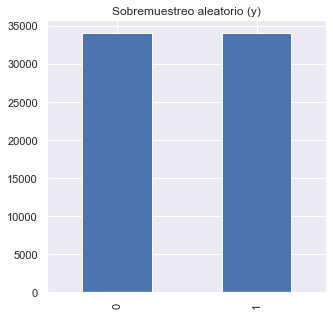

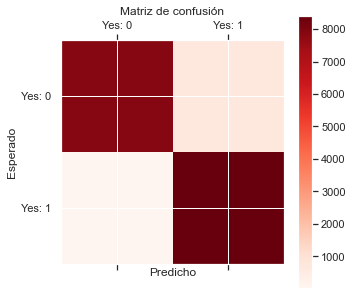

Importancia de los predictores en el modelo
-------------------------------------------
     predictor  importancia
0          age     0.217547
1          job     0.090723
3    education     0.083144
8  day_of_week     0.062326
2      marital     0.046459
4      housing     0.040813
5         loan     0.028495
9        pdays     0.016942
7        month     0.016799
6      contact     0.011149


In [ ]:
accuracy_RF_Normalized_sobre = RandomForest_Classifier_CV(df_normalized_encoded,'sobre')

###### Conclusiones
Este modelo funciona muy bien, manejando ambas clase por encima del 90% y obteniendo un Accuracy de casi 96%. Es de los mejores desempeños que hemos obtenido.

### 6.2.7 Validación cruzada sobre componentes principales con sobremuestreo

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} : 0.9303206406306161 accuracy

Mejor parámetro de modelo tras la validación cruzada
-------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 150}

Matriz de confusión
-------------------
[[7755  798]
 [  26 8409]]

El accuracy de test es: 95.14951730633389 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      8553
           1       0.91      1.00      0.95      8435

    accuracy                           0.95     16988
   macro avg       0.95      0.95      0.95     16988
weighted avg       0.96      0.95      0.95     16988



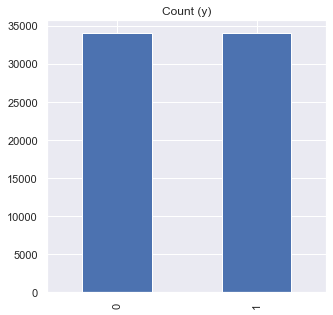

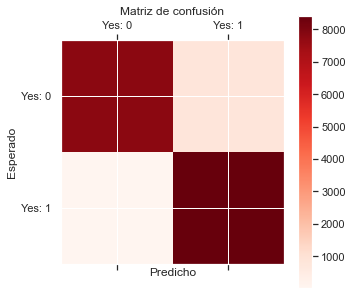

In [ ]:
accuracy_RF_PCA_sobre = RandomForest_Classifier_CV(df_PCA,'pca')

##### Conclusiones
Este modelo usando Análisis de componentes principales funciona bien. Maneja ambas clases por encima del 90% y especialmente bien la clase 1. Además obtenemos un Accuracy sobre el 95%.

## 6.3 Support Vector Machine

En este apartado realizaremos las pruebas con el último modelo de clasificación que hemos escogido, en este caso Support Vector Machine. Incluiremos las pruebas con sobremuestreo, submuestreo y análisis de componentes principales. 

Realizaremos una función que recoja el desarrollo y aplicación de este modelo, así como todas las métricas asociadas.

Para la búsqueda de hiperparámetros haremos una búsqueda en malla de valores del hiperparámetro C. Este hiperparámetros ajusta el márgen de separación para categorizar las predicciones como erróneas o no. 

https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a

**Nota**: Hemos optado por escoger el valor 100 para C y el kernel lineal por razones de tiempo, ya que la busqueda exhaustiva con más valores para estos hiperparámetros se volvía imposible de manejar. 

In [ ]:
def SVM_Classifier_CV(df,x):
    if x == 'sub':
        # Validación con submuestreo
        # ==============================================================================
        
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]

        # Hacemos el remuestreo de la clase 0, eliminando registros de 0's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================
        df_class_0_under = df_class_0.sample(count_class_1)
        df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Submuestreo aleatorio:')
        print(df_test_under.y.value_counts())

        df_test_under.y.value_counts().plot(kind='bar', title='Submuestreo aleatorio (y)',figsize=(5,5))

        # Conjuntos de datos de entrenamiento y test
        # ==============================================================================
        X_train, X_test, y_train, y_test = train_test_split(
                                                df_test_under.drop(columns = 'y'),
                                                df_test_under['y'],
                                                random_state = 123
                                            )


        # Grid de hiperparámetros evaluados
        # ==============================================================================
#         param_grid = {'C': [30,70,100]}
        param_grid = {'C': [100]}


        # Búsqueda por validación cruzada
        # ==============================================================================
        grid = GridSearchCV(
                estimator  = SVC(kernel= "linear"),
                param_grid = param_grid,
                scoring    = 'accuracy',
                n_jobs     = multiprocessing.cpu_count() - 1,
                cv         = 3, 
                verbose    = 0,
                return_train_score = True
              )

        # Se asigna el resultado a _ para que no se imprima por pantalla
        # ==============================================================================
        grid.fit(X = X_train, y = y_train)
        
        # Se obtiene el mejor estimador
        # ==============================================================================

        modelo_final = grid.best_estimator_
            
        
        # Mejores hiperparámetros por validación cruzada
        # ==============================================================================
        print("----------------------------------------")
        print("Mejores hiperparámetros encontrados (cv)")
        print("----------------------------------------")
        print(grid.best_params_, ":", grid.best_score_, grid.scoring)
        
        # Mejores hiperparámetros por validación cruzada
        # ==============================================================================
        
        predicciones = modelo_final.predict(X = X_test)
        
        # Calculamos la matriz de confusion
        # ==============================================================================

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)
        
        # Calculamos el accuracy
        # ==============================================================================

        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")
        
        # Calculamos las métricas
        # ==============================================================================
        
        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)
        
        # Representamos la matriz de confusión en mapa de calor
        # ==============================================================================

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        
#         # Representación gráfica utilizando plot_decision_regions() de mlxtend
#         # ==============================================================================
#         fig, ax = plt.subplots(figsize=(6,4))
#         plot_decision_regions(
#             X = X_train.to_numpy(),
#             y = y_train.flatten(),
#             clf = modelo,
#             ax = ax
#         )
#         ax.set_title("Resultados clasificación SVM radial");

        data = pd.Series(abs(grid.best_estimator_.coef_[0]), index=df_test_under.drop(columns = 'y').columns).nlargest(10).sort_values(ascending = True)
        data.plot(kind='barh',title='Importancia de predictores', fontsize = 20)
        plt.title('Importancia de predictores', fontsize = 30)
        plt.show()
        
        return accuracy
    

    elif x == 'sobre':
        
        # Validación con sobremuestreo
        # ==============================================================================
        
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df[df['y'] == 0]
        df_class_1 = df[df['y'] == 1]
        
        # Hacemos el remuestreo de la clase 0, eliminando registros de 0's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================

        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Sobremuestreo aleatorio:')
        print(df_test_over.y.value_counts())

        df_test_over.y.value_counts().plot(kind='bar', title='Sobremuestreo aleatorio (y)', figsize=(5,5))


        # Conjuntos de datos de entrenamiento y test
        # ==============================================================================
        X_train, X_test, y_train, y_test = train_test_split(
                                                df_test_over.drop(columns = 'y'),
                                                df_test_over['y'],
                                                random_state = 123
                                            )


        # Grid de hiperparámetros evaluados
        # ==============================================================================
#         param_grid = {'C': [30,70,100]}
        param_grid = {'C': [100]}


        # Búsqueda por validación cruzada
        # ==============================================================================
        grid = GridSearchCV(
                estimator  = SVC(kernel= "linear"),
                param_grid = param_grid,
                scoring    = 'accuracy',
                n_jobs     = multiprocessing.cpu_count() - 1,
                cv         = 3, 
                verbose    = 0,
                return_train_score = True
              )

        # Se asigna el resultado a _ para que no se imprima por pantalla
        # ==============================================================================
        _ = grid.fit(X = X_train, y = y_train)
        
        # Obtenemos el mejor modelo
        # ==============================================================================

        modelo_final = grid.best_estimator_
            
        
        # Mejores hiperparámetros por validación cruzada
        # ==============================================================================
        print("----------------------------------------")
        print("Mejores hiperparámetros encontrados (cv)")
        print("----------------------------------------")
        print(grid.best_params_, ":", grid.best_score_, grid.scoring)
        
        # Calculamos las predicciones
        # ==============================================================================
        
        predicciones = modelo_final.predict(X = X_test)
        
        # Calculamos la matriz de confusión
        # ==============================================================================

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)

        # Calculamos el Accuracy
        # ==============================================================================

        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")
        
        
        # Calculamos las métricas
        # ==============================================================================
        
        print('-----------------------------------')
        print('Classification Report')
        print('-----------------------------------')
        report = classification_report(y_test, predicciones)
        print(report)
        
        # Representamos la matriz de confusión en mapa de calor
        # ==============================================================================

        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
        
        # Representación gráfica utilizando plot_decision_regions() de mlxtend
#         # ==============================================================================
#         fig, ax = plt.subplots(figsize=(6,4))
#         plot_decision_regions(
#             X = X_train.to_numpy(),
#             y = y_train.flatten(),
#             clf = modelo,
#             ax = ax
#         )
#         ax.set_title("Resultados clasificación SVM radial"); 

        data = pd.Series(abs(grid.best_estimator_.coef_[0]), index=df_test_over.drop(columns = 'y').columns).nlargest(10).sort_values(ascending = True)
        data.plot(kind='barh',title='Importancia de predictores', fontsize = 20)
        plt.title('Importancia de predictores', fontsize = 30)
        plt.show()
        
        return accuracy
    
    elif x == 'pca':
        # Validación con sobremuestreo con PCA
        # ==============================================================================
        
        # Contamos los valores de 0 y 1 de la variable objetivo
        # ==============================================================================
        count_class_0, count_class_1 = df_PCA.y.value_counts()

        # Creamos un dataset para cada valor de y
        # ==============================================================================
        df_class_0 = df_PCA[df_PCA['y'] == 0]
        df_class_1 = df_PCA[df_PCA['y'] == 1]
        
        # Hacemos el remuestreo de la clase 1, aumentando registros de 1's, 
        # para obtener el mismo nº de 1's que de 0's
        # ==============================================================================

        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
        
        # Mostramos el recuento de los valores de y
        # ==============================================================================

        print('Sobremuestreo aleatorio:')
        print(df_test_over.y.value_counts())

        df_test_over.y.value_counts().plot(kind='bar', title='Count (y)',figsize=(5,5));

        # Utilizamos los primeros 7 componentes, ya que con ellos conseguimos explicar el 90 por de la
        # varianza 
        # ==============================================================================

        labels = df_test_over.columns[0:7]

        X = df_test_over[labels]
        y = df_test_over['y']

        # Conjuntos de datos de entrenamiento y test
        # ==============================================================================
        X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                random_state = 123
                                            )
        
        # Grid de hiperparámetros evaluados
        # ==============================================================================
#         param_grid = {'C': [30,70,100]}
        param_grid = {'C': [100]}

        # Búsqueda por validación cruzada
        # ==============================================================================
        grid = GridSearchCV(
                estimator  = SVC(kernel= 'linear'),
                param_grid = param_grid,
                scoring    = 'accuracy',
                n_jobs     = multiprocessing.cpu_count() - 1,
                cv         = 3, 
                verbose    = 0,
                return_train_score = True
              )
        
        # Entrenamos el modelo
        # ==============================================================================

        grid.fit(X = X_train, y = y_train)
        
        
        # Obtenemos el mejor modelo        
        # ==============================================================================
        modelo_final = grid.best_estimator_
            
        # Mejores hiperparámetros por validación cruzada
        # ==============================================================================
        print("----------------------------------------")
        print("Mejores hiperparámetros encontrados (cv)")
        print("----------------------------------------")
        print(grid.best_params_, ":", grid.best_score_, grid.scoring)

        
        # Calculamos las mejores predicciones
        # ==============================================================================
        predicciones = modelo_final.predict(X = X_test)
        
        # Calculamos la matriz de confusión
        # ==============================================================================

        print("\nMatriz de confusión")
        print("-------------------")
        matriz_confusion = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones
        )
        print(matriz_confusion)

        # Calculamos el Accuracy
        # ==============================================================================
        accuracy = accuracy_score(
                    y_true    = y_test,
                    y_pred    = predicciones,
        #             normalize = True
                   )
        print(f"\nEl accuracy de test es: {100 * accuracy} %\n")


        # Mostramos la matriz de confusión con mapa de calor
        # ==============================================================================
        labels= ['Yes: 0', 'Yes: 1']
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot()
        cax = ax.matshow(matriz_confusion, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_title('Matriz de confusión')
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicho')
        plt.ylabel('Esperado')
        plt.show()
    


#         # Calculamos los predictores más importantes y los mostramos
#         # ==============================================================================
#         data = pd.Series(abs(grid.best_estimator_.coef_[0]), index=df_test_under.drop(columns = 'y').columns).nlargest(10).sort_values(ascending = True)
#         data.plot(kind='barh',title='Importancia de predictores', fontsize = 20)
#         plt.title('Importancia de predictores', fontsize = 30)
#         plt.show()
        
        return accuracy
        
    else:
        pass

### 6.3.1 Validación cruzada con submuestreo y variables sin normalizar

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 100} : 0.7209077031470174 accuracy

Matriz de confusión
-------------------
[[952  95]
 [510 572]]

El accuracy de test es: 71.58290277125411 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1047
           1       0.86      0.53      0.65      1082

    accuracy                           0.72      2129
   macro avg       0.75      0.72      0.71      2129
weighted avg       0.76      0.72      0.71      2129



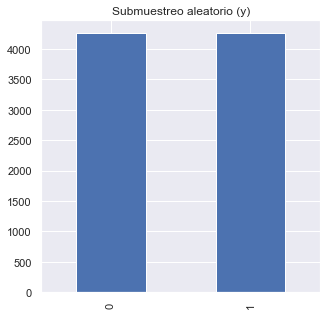

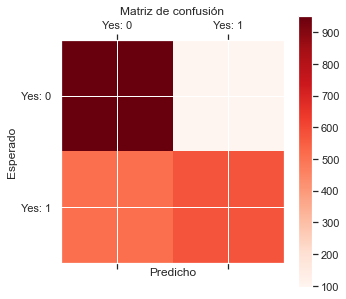

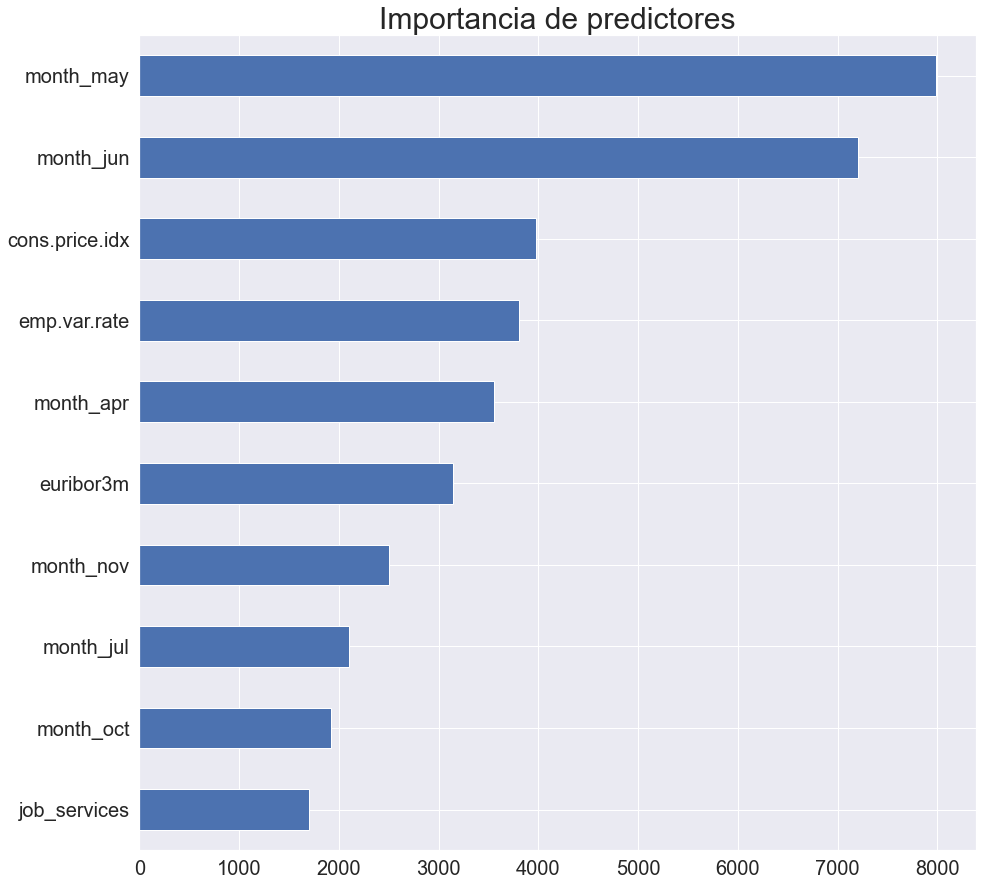

In [ ]:
accuracy_SVM_sinNormalizar_sub = SVM_Classifier_CV(df_encoded_dummy,'sub')

### 6.3.2 Validación cruzada con sobremuestreo y variables sin normalizar

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 100} : 0.7262666621700911 accuracy

Matriz de confusión
-------------------
[[7640  913]
 [3784 4651]]

El accuracy de test es: 72.35107134447846 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.89      0.76      8553
           1       0.84      0.55      0.66      8435

    accuracy                           0.72     16988
   macro avg       0.75      0.72      0.71     16988
weighted avg       0.75      0.72      0.72     16988



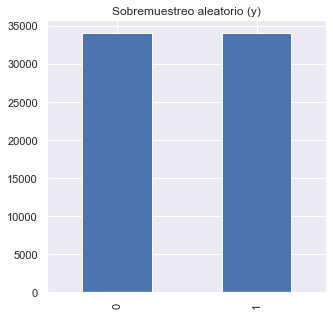

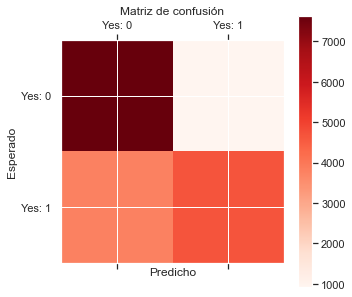

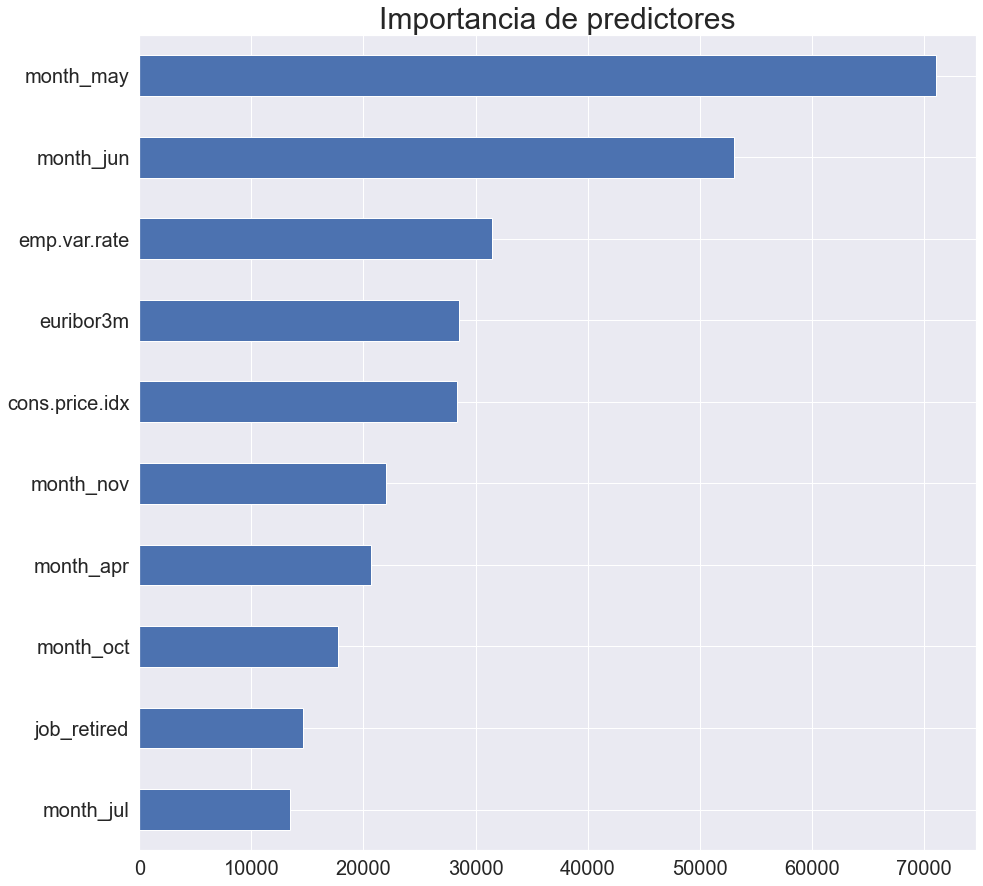

In [ ]:
accuracy_SVM_sinNormalizar_sobre = SVM_Classifier_CV(df_encoded_dummy,'sobre')

### 6.3.3 Validación cruzada con submuestreo, variables continuas normalizadas y reducción de variables

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 100} : 0.7359444878047632 accuracy

Matriz de confusión
-------------------
[[915 132]
 [454 628]]

El accuracy de test es: 72.47534053546266 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.87      0.76      1047
           1       0.83      0.58      0.68      1082

    accuracy                           0.72      2129
   macro avg       0.75      0.73      0.72      2129
weighted avg       0.75      0.72      0.72      2129



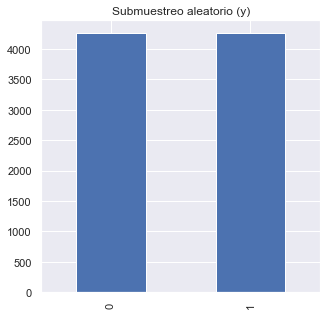

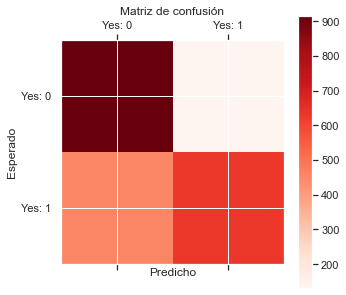

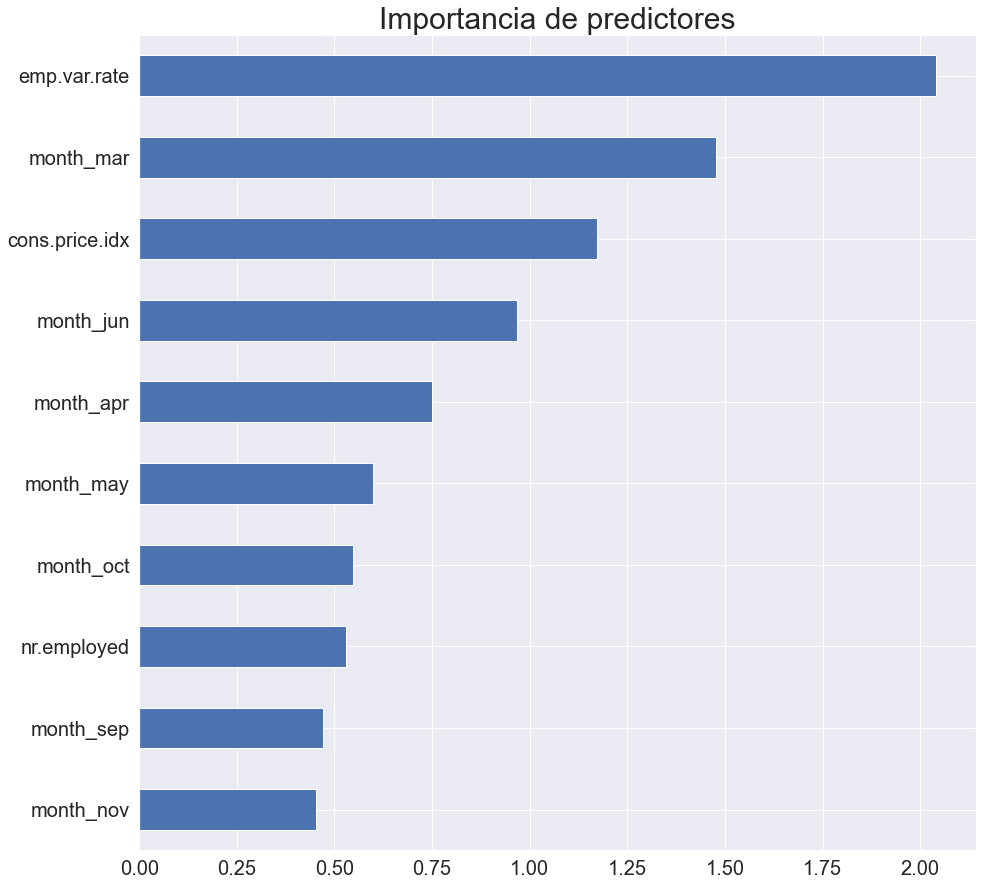

In [ ]:
accuracy_SVM_Normalized_FeatureReduced_sub = SVM_Classifier_CV(df_normalized_featureReduced_encoded_dummy,'sub')

### 6.3.4 Validación cruzada con sobremuestreo, variables continuas normalizadas y reducción de variables

###### Hemos obviado este modelo porque nunca llegué a obtener resultados por el tiempo de ejecución tan dilatado

In [ ]:
# accuracy_SVM_Normalized_FeatureReduced_sobre = SVM_Classifier_CV(df_normalized_featureReduced_encoded_dummy,'sobre')

### 6.3.5 Validación cruzada con submuestreo y variables continuas normalizadas

Submuestreo aleatorio:
0    4257
1    4257
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 100} : 0.7317148701956865 accuracy

Matriz de confusión
-------------------
[[926 121]
 [454 628]]

El accuracy de test es: 72.99201503053077 %

-----------------------------------
Classification Report
-----------------------------------
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1047
           1       0.84      0.58      0.69      1082

    accuracy                           0.73      2129
   macro avg       0.75      0.73      0.72      2129
weighted avg       0.76      0.73      0.72      2129



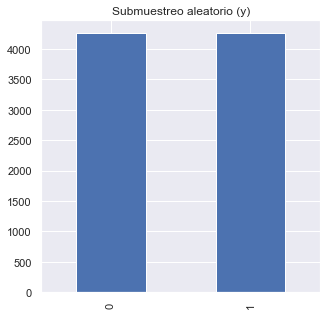

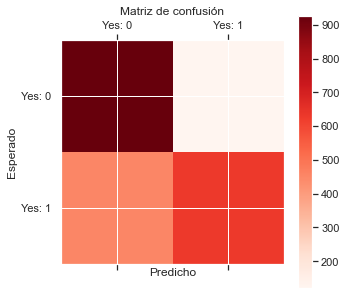

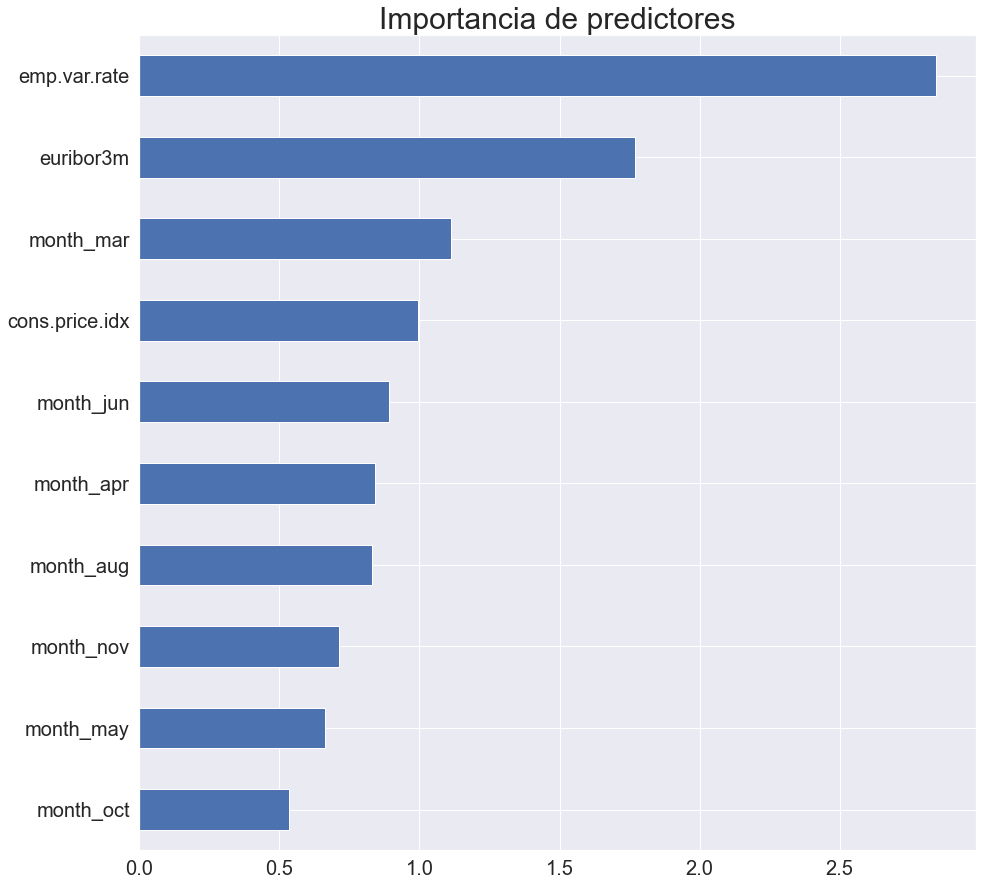

In [ ]:
accuracy_SVM_Normalized_sub = SVM_Classifier_CV(df_normalized_encoded_dummy,'sub')

### 6.3.6 Validación cruzada con sobremuestreo y variables continuas normalizadas

###### Hemos obviado este modelo porque nunca llegué a obtener resultados por el tiempo de ejecución tan dilatado

In [ ]:
# accuracy_SVM_Normalized_sobre = SVM_Classifier_CV(df_normalized_encoded_dummy,'sobre')

### 6.3.7 Validación cruzada sobre componentes principales con sobremuestreo

Sobremuestreo aleatorio:
0    33975
1    33975
Name: y, dtype: int64
----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 100} : 0.7134727749513313 accuracy

Matriz de confusión
-------------------
[[6133 2420]
 [2454 5981]]

El accuracy de test es: 71.30915940663998 %



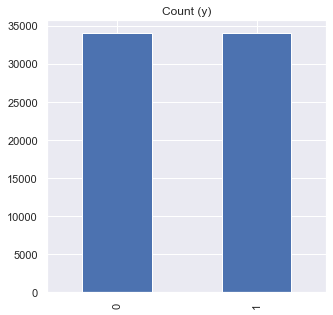

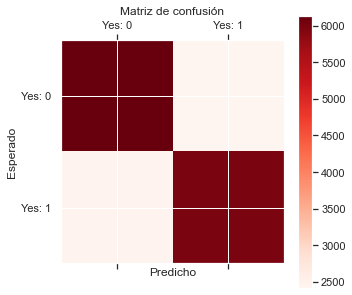

In [ ]:
accuracy_SVM_PCA_sub = SVM_Classifier_CV(df_PCA,'pca')

## 6.4 Tabla comparativa de modelos

Llegados a este punto reorganizamos todos los Accuracy obtenidos en un DataFrame y los mostramos de forma que su comparación sea mucho más fácil, haciendo agrupaciones entre las distintas características de las pruebas realizadas.

In [ ]:
#Realmente en PCA hemos hecho sobre muestreo pero me equivoqué con la nomenclatura 
# y por el rendimiento de este modelo, no podía repetir otra vez la simulación.
# ==============================================================================

accuracy_SVM_PCA = accuracy_SVM_PCA_sub

A continuación construimos el dataset, recopilando todos los Accuracy e indicando todas sus características

In [ ]:
accuracy_2 =[accuracy_df_sobre,
accuracy_df_sub,
accuracy_df_normalized_reduced_sobre,
accuracy_normalized_reduced_sub,
accuracy_normalized_sobre,
accuracy_normalized_sub,
accuracy_normalized,
round(accuracy_PCA,2),
round(accuracy_DecisionTree_DF_normal_sub,2),
round(accuracy_DecisionTree_DF_normal_sobre,2),
round(accuracy_DTree_DF_featureReduced_normalized,2),
round(accuracy_Dtree_featureReduced_normalized,2),
round(accuracy_Dtree_normalized_sub,2),
round(accuracy_Dtree_normalized_sobre,2),
round(accuracy_Dtree_DF_PCA,2),
round(accuracy_RF_sinNormalizar_sub,2),
round(accuracy_RF_sinNormalizar_sobre,2),
round(accuracy_RF_Normalized_FeatureReduced_sub,2),
round(accuracy_RF_Normalized_FeatureReduced_sobre,2),
round(accuracy_RF_Normalized_sub,2),
round(accuracy_RF_Normalized_sobre,2),
round(accuracy_RF_PCA_sobre,2),      
round(accuracy_SVM_sinNormalizar_sub,2),
round(accuracy_SVM_sinNormalizar_sobre,2),
round(accuracy_SVM_Normalized_FeatureReduced_sub,2),
round(accuracy_SVM_Normalized_sub,2),
round(accuracy_SVM_PCA,2)]

labels_accuracys_2 = ['Accuracy XGB SobreMuestreo DF', 
                   'Accuracy XGB SubMuestreo DF ',
                   'Accuracy XGB SobreMuestreo DF FeatureSelection',
                   'Accuracy XGB SubMuestreo DF FeatureSelection',
                   'Accuracy XGB SobreMuestreo DF Normalized',
                   'Accuracy XGB SubMuestreo DF Normalized',
                   'Accuracy XGB SinRemuestreo DF normalizado',
                   'Accuracy XGB SobreMuestreo DF PCA',
                   'Accuracy DTree SubMuestreo DF',
                   'Accuracy DTree SobreMuestreo DF',
                    'Accuracy DTree SubMuestreo DF FeatureSelection Normalizado',
                    'Accuracy DTree SobreMuestreo DF FeatureSelection Normalizado',
                    'Accuracy DTree SubMuestreo DF Normalizado',
                    'Accuracy DTree SobreMuestreo DF Normalizado',
                    'Accuracy DTree SobreMuestreo DF PCA',
                    'Accuracy RForest SubMuestreo DF',
                    'Accuracy RForest SobreMuestreo DF',
                    'Accuracy RForest SubMuestreo DF FeatureSelection Normalizado',
                    'Accuracy RForest SobreMuestreo DF FeatureSelection Normalizado',
                    'Accuracy RForest SubMuestreo DF Normalizado',
                    'Accuracy RForest SobreMuestreo DF Normalizado',
                    'Accuracy RForest SobreMuestreo DF PCA',
                    'Accuracy SVM SubMuestreo DF',
                    'Accuracy SVM SobreMuestreo DF',
                    'Accuracy SVM SubMuestreo DF FeatureSelection Normalizado',
                    'Accuracy SVM SubMuestreo DF Normalizado',
                    'Accuracy SVM SobreMuestreo DF PCA'
                   ]

df_accuracy_2 = pd.DataFrame(data = accuracy_2 ,columns = ['Accuracy'], index = labels_accuracys_2)

df_accuracy_2['Tipo_de_remuestreo'] = ['Sobremuestreo', 'Submuestreo',
                                    'Sobremuestreo','Submuestreo',
                                    'Sobremuestreo','Submuestreo',
                                    'Ninguno','Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo','Submuestreo',
                                    'Sobremuestreo']

df_accuracy_2['Seleccion_de_Caracteristicas'] =['No','No','Si','Si',
                                              'No', 'No', 'No', 'No',
                                             'No','No','Si','Si',
                                              'No', 'No', 'No',
                                             'No','No','Si','Si',
                                              'No', 'No', 'No',
                                             'No','No','Si',
                                              'No', 'No']

df_accuracy_2['Datos_Normalizados'] = ['No','No','Si','Si',
                                    'Si','Si', 'Si','Si',
                                    'No','No','Si','Si',
                                    'Si','Si', 'Si',
                                    'No','No','Si','Si',
                                    'Si','Si', 'Si',
                                    'No','No','Si','Si',
                                    'Si']
df_accuracy_2.head(30)



,Accuracy,Tipo_de_remuestreo,Seleccion_de_Caracteristicas,Datos_Normalizados
Accuracy XGB SobreMuestreo DF,0.81,Sobremuestreo,No,No
Accuracy XGB SubMuestreo DF,0.73,Submuestreo,No,No
Accuracy XGB SobreMuestreo DF FeatureSelection,0.78,Sobremuestreo,Si,Si
Accuracy XGB SubMuestreo DF FeatureSelection,0.71,Submuestreo,Si,Si
Accuracy XGB SobreMuestreo DF Normalized,0.81,Sobremuestreo,No,Si
Accuracy XGB SubMuestreo DF Normalized,0.71,Submuestreo,No,Si
Accuracy XGB SinRemuestreo DF normalizado,0.90,Ninguno,No,Si
Accuracy XGB SobreMuestreo DF PCA,0.83,Sobremuestreo,No,Si
Accuracy DTree SubMuestreo DF,0.63,Submuestreo,No,No
Accuracy DTree SobreMuestreo DF,0.94,Sobremuestreo,No,No


In [ ]:
# Realizamos un groupby para agrupar por Tipo de muestreo, asi obtenemos la 
# media de los Accuracy de todos los modelos, y excluimos el conjunto de datos
# que además no ha sido balanceado y desvirtua la media.
# ==============================================================================

group_2 = df_accuracy_2.groupby(['Tipo_de_remuestreo'])
group_2.first()

,Accuracy,Seleccion_de_Caracteristicas,Datos_Normalizados
Tipo_de_remuestreo,,,
Ninguno,0.90,No,Si
Sobremuestreo,0.81,No,No
Submuestreo,0.73,No,No


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

# Creamos nuestro conjunto de características para crear nuestro dataset
# ==============================================================================

labels_accuracy_multiIndex = [['Sobremuestreo', 'Submuestreo',
                                    'Sobremuestreo','Submuestreo',
                                    'Sobremuestreo','Submuestreo',
                                    'Ninguno','PCA_Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'PCA_Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'PCA_Sobremuestreo',
                                    'Submuestreo', 'Sobremuestreo',
                                    'Submuestreo','Submuestreo',
                                    'PCA_Sobremuestreo'],
                                  ['No','No','Si','Si',
                                              'No', 'No', 'No', 'No',
                                             'No','No','Si','Si',
                                              'No', 'No', 'No',
                                             'No','No','Si','Si',
                                              'No', 'No', 'No',
                                             'No','No','Si',
                                              'No', 'No'],
                             ['No','No','Si','Si',
                                    'Si','Si', 'Si','Si',
                                    'No','No','Si','Si',
                                    'Si','Si', 'Si',
                                    'No','No','Si','Si',
                                    'Si','Si', 'Si',
                                    'No','No','Si','Si',
                                    'Si'],
                             ['XGB','XGB','XGB','XGB',
                                    'XGB','XGB', 'XGB','XGB',
                                    'Dtree','Dtree','Dtree','Dtree',
                                    'Dtree','Dtree', 'Dtree',
                                    'RForest','RForest','RForest','RForest',
                                    'RForest','RForest', 'RForest',
                                    'SVM','SVM','SVM','SVM',
                                    'SVM']]

# Creamos un multi índice 
# ==============================================================================
index = pd.MultiIndex.from_arrays(labels_accuracy_multiIndex, names=('Tipo_de_remuestreo',
                                                 'Seleccion_de_Caracteristicas',
                                                 'Datos_Normalizados',
                                                 'Modelo_Utilizado'))

# Creamos el dataset con un multi índice
# ==============================================================================
df_accuracy_2_multiIndex= pd.DataFrame({'Accuracy': accuracy_2},
                  index=index)

df_accuracy_2_multiIndex.head(50)

,,,,Accuracy
Tipo_de_remuestreo,Seleccion_de_Caracteristicas,Datos_Normalizados,Modelo_Utilizado,
Sobremuestreo,No,No,XGB,0.81
Submuestreo,No,No,XGB,0.73
Sobremuestreo,Si,Si,XGB,0.78
Submuestreo,Si,Si,XGB,0.71
Sobremuestreo,No,Si,XGB,0.81
Submuestreo,No,Si,XGB,0.71
Ninguno,No,Si,XGB,0.90
PCA_Sobremuestreo,No,Si,XGB,0.83
Submuestreo,No,No,Dtree,0.63


In [ ]:
df_accuracy_2_multiIndex.sort_values(by='Accuracy',ascending=False).head(10)

Accuracy
Tipo_de_remuestreo Seleccion_de_Caracteristicas Datos_Normalizados Modelo_Utilizado          
Sobremuestreo      No                           Si                 RForest               0.96
PCA_Sobremuestreo  No                           Si                 RForest               0.95
Sobremuestreo      No                           No                 RForest               0.95
                                                Si                 Dtree                 0.94
PCA_Sobremuestreo  No                           Si                 Dtree                 0.94
Sobremuestreo      No                           No                 Dtree                 0.94
Ninguno            No                           Si                 XGB                   0.90
Sobremuestreo      Si                           Si                 RForest               0.86
                                                                   Dtree                 0.85
                   No                           Si                 XGB                   0.83

##### Conclusiones
Después de este extenso análsis donde hemos comparado 4 modelos de clasificación, y realizado búsqueda exhaustiva de varios hiperparámetros en algunos de ellos y un menor número en otros debido al tiempo de simulación, podemos observar lo siguiente:
   1. Los mejores modelos para nuestro problema de clasificación son el Random Forest y el Decisión Tree. Ambos dan un rendimiento excepcional pero además manejan muy bien las dos clases 0 y 1. 
   2. A raíz de las pruebas, queda claro que el sobremuestreo nos da mejores resultados que el submuestreo, entendiendo por tanto que por la naturaleza de nuestro conjunto de datos, es muy útil tener muchos más datos para entrenar nuestros modelo.
   3. No hemos incluido en el análisis algunos test que incluían el sobremuestreo en SVM ya que tardaba muchísimo tiempo en darnos los resultados, bloqueando el ordenador incluso. De igual forma con los resultados obtenidos en SVM entendemos que tampoco hubieran sido relevantes para escoger nuestro modelo.
   4. En el top 10 se cuela el modelo en el que no se aplico ningún tipo de remuestreo, obteniendo un Accuracy de 90% engañoso, ya que como vimos en el apartado 4.3.3, solo maneja bien la clase mayoritaria, es decir, los 0. 
   5. Observamos que la normalización  aporte un margen de mejora pequeño a los modelos.
   6. La selección de características no ayuda, sobre todo en los modelos de RandomForest y DecisionTree ya que tal como hemos comentado anteriormente, al quitar la variable predictora Age, la cual era muy importante para estos dos modelos, el rendimiento bajaba casi un 10%.
   
Finalmente, nos quedamos con el modelo RandomForest con los siguientes hiperparámetros y matriz de confusión:
   - 'criterion': 'gini' 
   - 'max_depth': None
   - 'max_features': 7
   - 'n_estimators': 150

# 7.Clustering del conjunto de datos


A continuación vamos a trabajar con modelos de clustering, es decir, con modelos de agrupamiento. Vamos a escoger algunas variables que consideramos interesantes para establecer posibles grupos en base a las características de cada registro. En las siguientes líneas expondremos los pasos a seguir.

Pasos a seguir:
   1. Utilizando el dataset original, normalizamos los datos continuos utilizando la técnica del Escalado Min-Max.
   2. Obtener variables dummies a partir de aquellas variables categóricas
   3. Una vez hecho el clustering, añadimos los clústeres al dataset original
   4. Representamos las variables y observamos si vemos grupos claros. 

Hemos optado en un principio por las variables 'age', 'job','marital', 'education', 'housing' y 'loan' por considerar que son variables más personales, con respecto a las otras variables del data set que se refieren a índices económicos y otras cuestiones.

**Nota**: tomamos una muestra de 100 registros del dataset ya que las variables escogidas son categóricas y su representación en un gráfico de dispersión es complicada.

In [ ]:
# Creamos un nuevo dataframe con aquellas variables que queremos usar
# para analizar los posibles grupos
# ==============================================================================
    
df_clustering = df.copy()
df_clustering = df_clustering[['age', 'job','marital', 'education', 'housing', 'loan']]

# Aplicamos el normalizado a la única variable continua 'age'
# ==============================================================================
mm_scaler = preprocessing.MinMaxScaler()
col_names=['age']
df_mm = df_clustering[col_names]
df_mm = mm_scaler.fit_transform(df_mm)

# Reemplazamos la columna 'age' por la nueva columna 'age' normalizada
# ==============================================================================
df_clustering_scaled = df_clustering.copy()
df_clustering_scaled['age'] = df_mm

# Obtenemos las variables dummy
# ==============================================================================
df_clustering_scaled.head()
df_clustering_scaled_dummy = pd.get_dummies(df_clustering_scaled, dtype='float')

# Reducimmos los registros a 100, para la facilidad de la representación en gráficas
# y que también la mayoría de nuestras variables son categóricas, algo que 
# a priori no es compatible 
# ==============================================================================
df_clustering_scaled_dummy_100 = df_clustering_scaled_dummy.head(100)



Realizamos esta reducción de las variables escogidas por los resultados obtenidos en el anterior conjunto de datos, ya que el cómputo se estaba desarrollando de una manera muy lenta

In [ ]:
# Reducimos el número de vairables y obtenemos los 100 primeros registros de 
# nuevo
# ==============================================================================
df_clustering_scaled_dummy_100_reduced = df_clustering_scaled[['age','job','marital', 'education']].head(100)
df_clustering_scaled_dummy_100_reduced = pd.get_dummies(df_clustering_scaled_dummy_100_reduced, dtype='float')
df_clustering_scaled_dummy_100_reduced.shape

(100, 20)

## 7.1 Clustering utilizando K-means

In [ ]:
###### Explicar sobre el clustering con Kmeans

### 7.1.1 Clustering con las variables age, job, marital y education y 100 registros
En este apartado utilizaremos los métodos del análisis de codo y el método de Silhoutte para determinar el nº óptimo de clusters que deberemos usar para formar los grupos necesarios de una forma óptima.

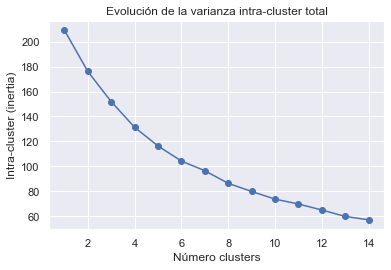

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================

range_n_clusters = range(1, 15)
inertias = []

# Calculamos la Varianza intra-cluster para cada nº de clúster propuesto
# ==============================================================================
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(df_clustering_scaled_dummy_100_reduced)
    inertias.append(modelo_kmeans.inertia_)

# Representamos la Varianza previamente calculada
# ==============================================================================

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

##### Conclusiones
Una vez utilizado el método de Elbow, observamos en la gráfica que podríamos establecer el nº de grupos en 5.

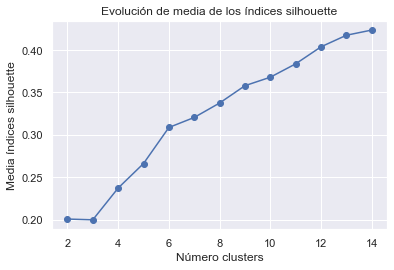

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

# Calculamos la puntuación del método Silhouette
# ==============================================================================

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(df_clustering_scaled_dummy_100_reduced)
    silhouette_avg = silhouette_score(df_clustering_scaled_dummy_100_reduced, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
# Mostramos los resultados 
# ==============================================================================
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

###### Conclusiones
Con este método no obtenemos un resultado concluyente de cuantos grupos podemos establecer. Por otras pruebas realizadas tenemos conocimiento de que alrededor de los 60 clústeres se obtiene el corte que indica el nº de clústeres. No lo hemos tenido en cuenta ya que siendo 60 en 100 registros, algunos de los grupos formados serán algunos de menos de 2 personas 

In [ ]:
# A continuación construimos el nuevo dataset añadiendo los grupos determinados
# por el algoritmo
# ==============================================================================

kmeans = KMeans(5)
clusters = kmeans.fit_predict(df_clustering_scaled_dummy_100_reduced)
df_clustering_kmeans_5 = df_clustering[['age','job','marital', 'education']].head(100)
df_clustering_kmeans_5['clusters'] = clusters

df_clustering_kmeans_5.head()


,age,job,marital,education,clusters
0,56,housemaid,married,basic.4y,4
1,57,services,married,high.school,2
2,37,services,married,high.school,2
3,40,admin.,married,basic.6y,0
4,56,services,married,high.school,2


In [ ]:
# Realizamos una función para la visualización de los datos agrupados
# ==============================================================================

def scatter(x,y,c):
    plt.figure(figsize=(7,7))
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.scatterplot(x=x,  
                    y=y, 
                    c=c,
                    hue=c,
                    style=c,
                    palette="deep",
                    s=300)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Cluster')
    plt.title('Clústeres')




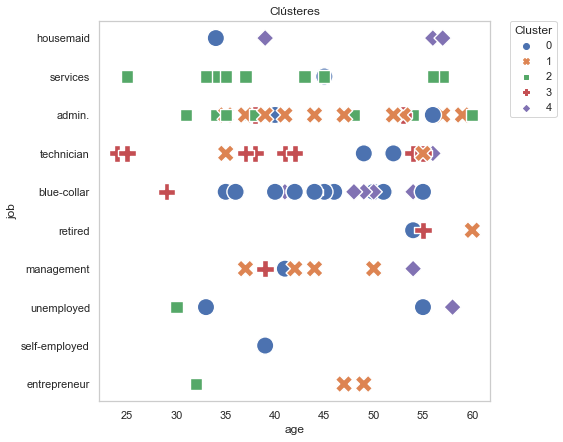

In [ ]:
scatter(df_clustering_kmeans_5['age'],df_clustering_kmeans_5['job'],df_clustering_kmeans_5['clusters'])

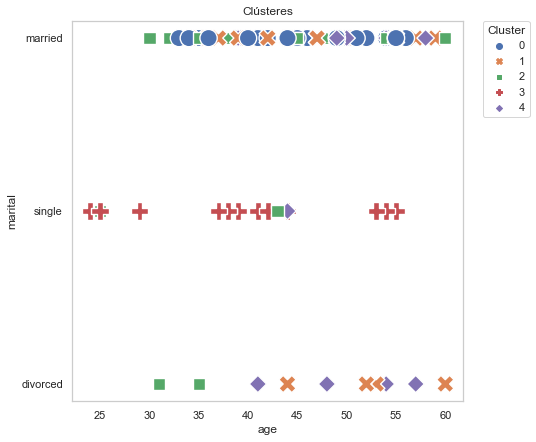

In [ ]:
scatter(df_clustering_kmeans_5['age'],df_clustering_kmeans_5['marital'],df_clustering_kmeans_5['clusters'])

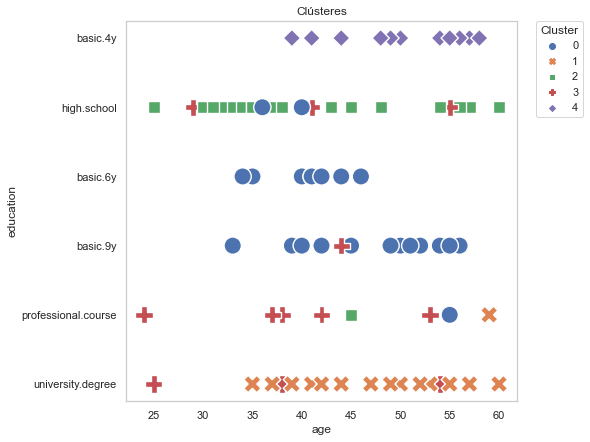

In [ ]:
scatter(df_clustering_kmeans_5['age'],df_clustering_kmeans_5['education'],df_clustering_kmeans_5['clusters'])

###### Conclusiones
Una vez observados los diferentes gráficos podemos concluir lo siguiente:
   1. Parece que el algoritmo ha usado para establecer grupos la variable 'education', ya que es en el gráfico 'education' vs 'age' donde se aprecian grupos más definidos. 
   2. El grupo 3 parece que está principalmente compuesto por solteros con una ocupación principalmente de técnicos. Su formación está más distribuida.
   3. El grupo 0 parece que principalmente tiene formación básica y la mayoría se encuentra casado. En cuanto a ocupación, parecen encontrarse en 'blue-collar', que hace referencia a trabajos manuales.
   4. El grupo 1 parece ser el de aquellas personas con estudios universitarios, y se dividen entre algunos divorciados y la mayoría casados. En cuando a la ocupación se reparten entre trabajos de administración, gerencia y emprendedores, lo cual tiene bastante sentido.
   5. El grupo 2 parece tener a personas principalemnte con estudios de instituto, generalmente casados yq ue trabajan principalmente en el sector de los servicios y a administración.
   6. El grupo 4 parecen ser los que tienen la formación más básica, en su mayoría casados y trabajos generalmente manuales. 

## 7.1.2 Clustering con las variables 'age', 'job', 'marital', 'education', 'housing' y 'loan' y 100 registros

En esta sección seguiremos los mismos pasos que en el apartado anterior, calculando primero el número de grupos óptimos para luego visualizar los datos y ver la información que podemos extraer de los grupos formados.

En este apartado utilizaremos un dataset que incluye las variables que se indican en el título. Estas variables estarán normalizadas y convertidas a variables dummy.

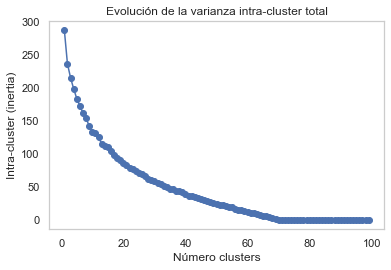

In [ ]:
# Método elbow para identificar el número óptimo de clusters desde 1 a 100 grupos
# ==============================================================================
range_n_clusters = range(1, 100)
inertias = []

# Calculamos la Varianza intra-cluster para cada nº de clúster propuesto
# ==============================================================================
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(df_clustering_scaled_dummy_100)
    inertias.append(modelo_kmeans.inertia_)

    
# Mostramos los resultados 
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

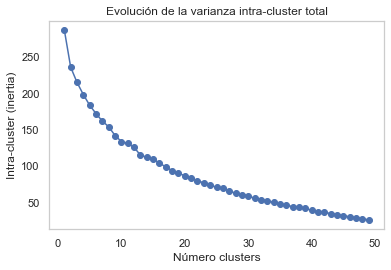

In [ ]:
# Método elbow para identificar el número óptimo de clusters desde 1 a 50 grupos
# ==============================================================================
range_n_clusters = range(1, 50)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(df_clustering_scaled_dummy_100)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

##### Conclusiones
En esta ocasión hemos decidido llevar el método de Elbow hasta su límite, es decir, el nº de grupos igual al número de registros, observando que la varianza se hace 0 entorno a los 70 grupos, lo cual no tiene sentido. Escogeremos el mismo nº de grupos que en el apartado anterior, es decir, 5 grupos.

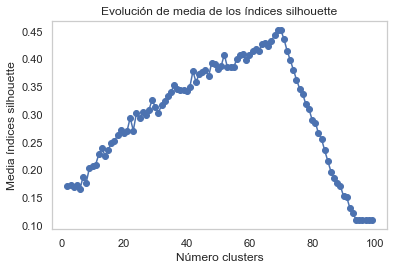

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 100)
valores_medios_silhouette = []

# Calculamos la puntuación del método Silhouette
# ==============================================================================

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(df_clustering_scaled_dummy_100)
    silhouette_avg = silhouette_score(df_clustering_scaled_dummy_100, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
# Mostramos los resultados 
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

##### Conclusiones
Los resultados son muy similares a los obtenidos en el método de Elbow. Con el método de Silhouette obtenemos que el nº óptimo de grupos será en torno a 70. Por lo tanto, realizaremos los pruebas con 5 grupos.

In [ ]:
# A continuación construimos el nuevo dataset añadiendo los grupos determinados
# por el algoritmo
# ==============================================================================
kmeans = KMeans(5)
clusters = kmeans.fit_predict(df_clustering_scaled_dummy_100)
df_clustering_kmeans_5_SixFeatures = df_clustering[['age','job','marital', 'education', 'housing','loan']].head(100)
df_clustering_kmeans_5_SixFeatures['clusters'] = clusters

df_clustering_kmeans_5_SixFeatures.head()


,age,job,marital,education,housing,loan,clusters
0,56,housemaid,married,basic.4y,no,no,1
1,57,services,married,high.school,no,no,1
2,37,services,married,high.school,yes,no,3
3,40,admin.,married,basic.6y,no,no,1
4,56,services,married,high.school,no,yes,0


En las siguientes celdas vamos a utilizar los gráficos de dispersión para poder estudiar los diferentes grupos.

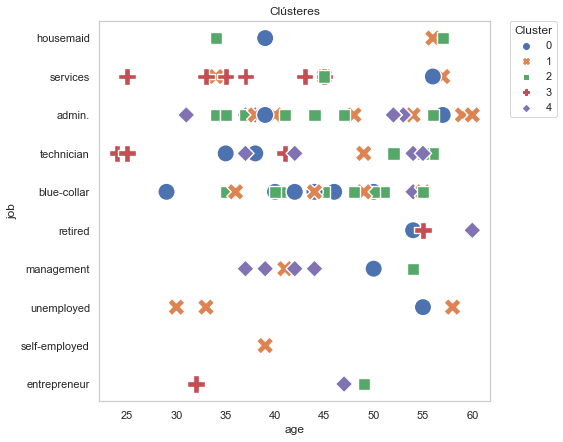

In [ ]:
scatter(df_clustering_kmeans_5_SixFeatures['age'],df_clustering_kmeans_5_SixFeatures['job'],df_clustering_kmeans_5_SixFeatures['clusters'])

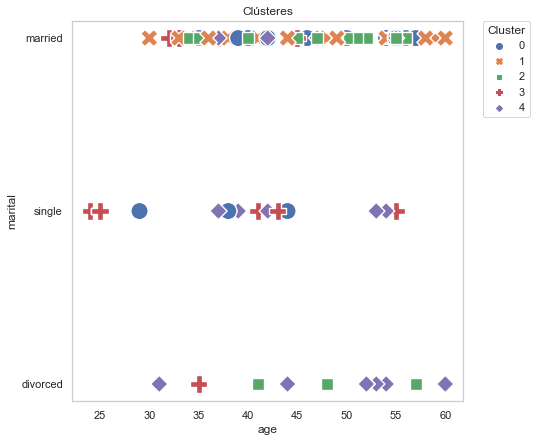

In [ ]:
scatter(df_clustering_kmeans_5_SixFeatures['age'],df_clustering_kmeans_5_SixFeatures['marital'],df_clustering_kmeans_5_SixFeatures['clusters'])

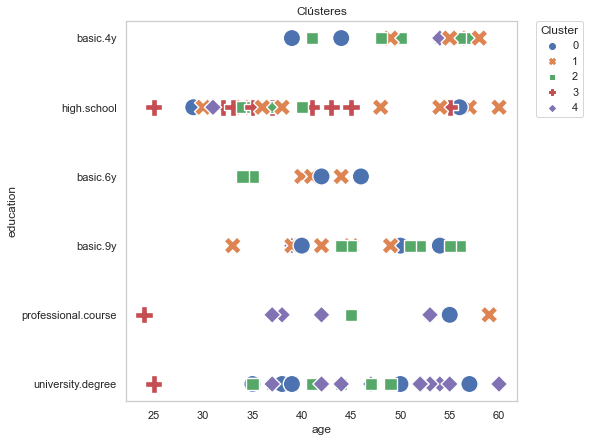

In [ ]:
scatter(df_clustering_kmeans_5_SixFeatures['age'],df_clustering_kmeans_5_SixFeatures['education'],df_clustering_kmeans_5_SixFeatures['clusters'])

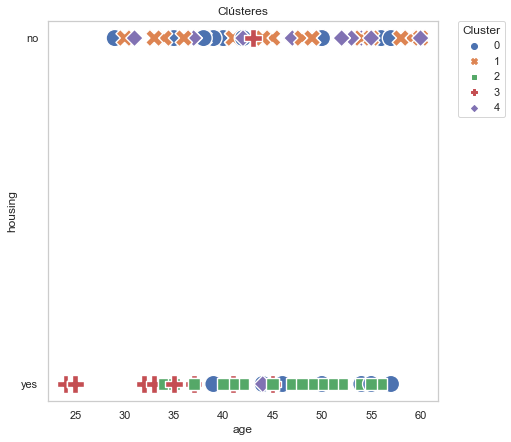

In [ ]:
scatter(df_clustering_kmeans_5_SixFeatures['age'],df_clustering_kmeans_5_SixFeatures['housing'],df_clustering_kmeans_5_SixFeatures['clusters'])

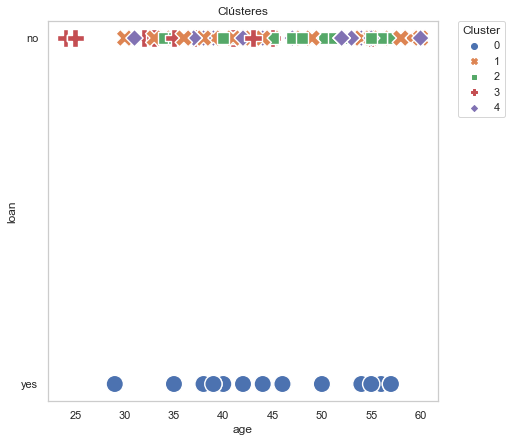

In [ ]:
scatter(df_clustering_kmeans_5_SixFeatures['age'],df_clustering_kmeans_5_SixFeatures['loan'],df_clustering_kmeans_5_SixFeatures['clusters'])

##### Conclusiones
Observando las diferentes gráficas podemos concluir lo siguiente:
   1. Con respecto a la nueva variable 'Housing' se ve claramente que los grupos 0,2 y 3 tienen una hipoteca, mientras que los grupos 1 y 4 no lo tienen generalmente.
   2. En cuanto a la otra nueva variable 'Loan', se observa claramente que el grupo 0 no tiene préstamos mientras que el resto de grupos sí.
   3. Podemos asegurar también que el resto de resultados son similares a los obtenidos en el apartado anterior, aunque cambie el nº del grupo asignado.

## 7.2 Clustering jerárquico

En esta sección vamos a utilizar la técnica del clustering jerárquico de tipo aglomerativo. Empezamos a agrupar desde cada elemento individual. Al inicio cada punto o dato está en un clúster separado. A cada paso, los dos clústers más cercanos se fusionan. Estas fusiones de clústers se siguen produciendo de forma sucesiva produciendo una jerarquía de resultados de clustering. Al final del proceso solo queda un único clúster que aglutina todos los elementos.


Expondremos 3 modelos variando el 'linkage'. El criterio de Linkage determina la distancia a utilizar entre los conjuntos de observación. El algoritmo fusionará los pares de cluster que minimicen este criterio.

    - 'ward': minimiza la varianza de los clusters que se fusionan.

    - 'average': utiliza la media de las distancias de cada observación de los dos conjuntos.

    - 'complete' o 'maximum': utiliza las distancias máximas entre todas las observaciones de los dos conjuntos.

    - 'simple': utiliza el mínimo de las distancias entre todas las observaciones de los dos conjuntos.


Hemos optado primero por indicar la distancia a 0 y el nº de clusters a None para que sea el propio modelo quien haga sus ajustes. Posteriormente estudiaremos el número de grupos óptimos mediante la técnica de Silhouette.

In [ ]:
# Modelos de cluastering aglomerativos con diferentes Linkage's
# ==============================================================================
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=df_clustering_scaled_dummy_100)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=df_clustering_scaled_dummy_100)

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=df_clustering_scaled_dummy_100)


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
# Función para dibujar el dendograma
# ==============================================================================
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

A continuación visualizaremos los tres dendogramas formados para cada modelo.

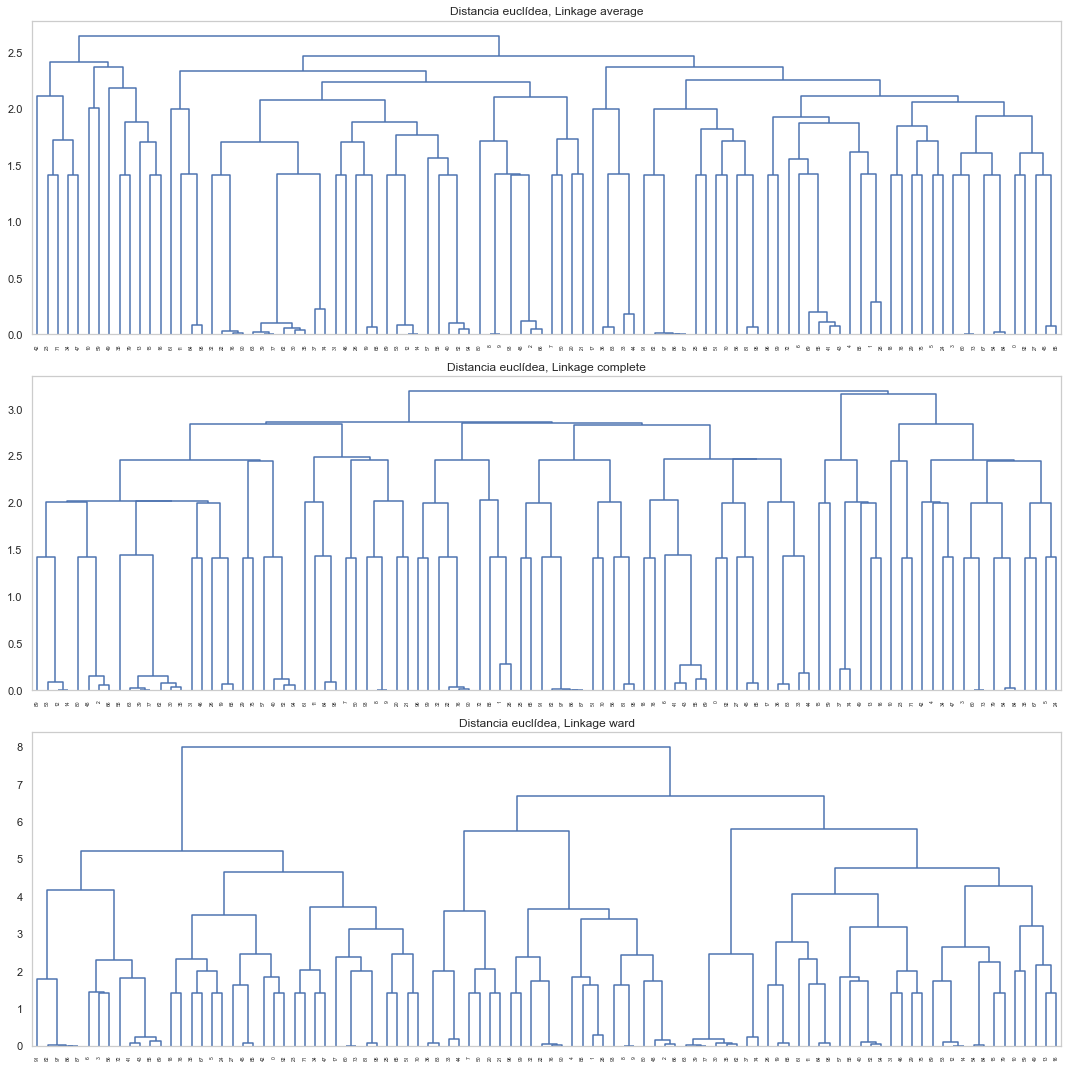

In [ ]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

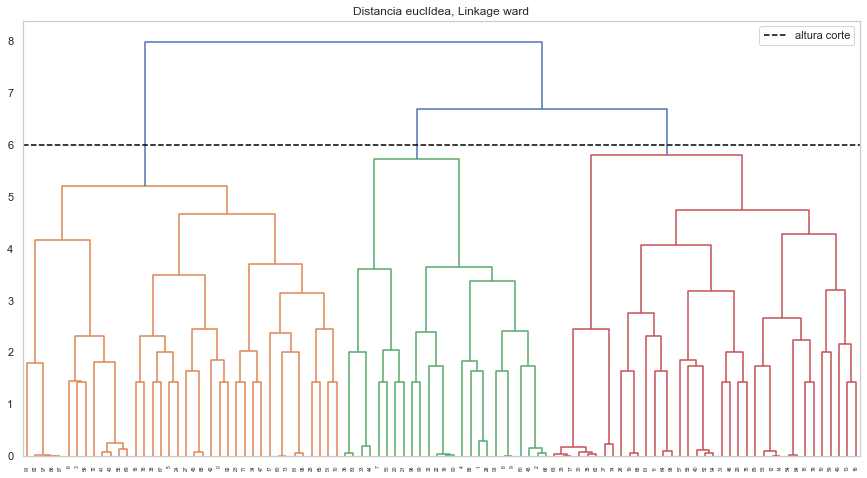

In [ ]:
# Mostramos el dendograma indicando la altura de corte ideal que consideramos
# hay varios grupos ya definidos.
# ==============================================================================

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
altura_corte = 6
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

##### Coclusiones
Estudiando más detenidamente el modelo usando el atributo 'ward' para Linkage, se observan 4 grupos definidos principales. 

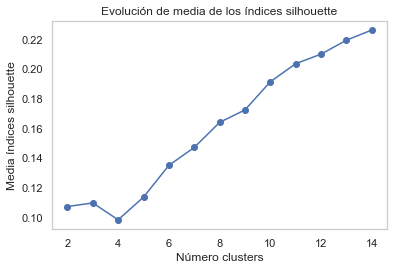

In [ ]:
# Método silhouette para identificar el número óptimo de clusters con el método
# aglomerativo
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df_clustering_scaled_dummy_100)
    silhouette_avg = silhouette_score(df_clustering_scaled_dummy_100, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

##### Conclusiones
Utilziando el método de Silhouette corroboramos que con 4 clústeres el índice baja y luego sigue subiendo. Escogeremos 4 como el nº de clústeres para hacer nuestras pruebas.

In [ ]:
# Escogemos el modelo aglomerativo con el atributo 'ward', y 5 clústeres.
# ==============================================================================
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 4
                     )
clusters_hierarchical = modelo_hclust_ward.fit_predict(X=df_clustering_scaled_dummy_100)

In [ ]:
# Creamos nuestro dataset utilizando clustering jerárquico añadiendo los clúster
# ==============================================================================

df_clustering_hierarchical_4 = df_clustering[['age','job','marital', 'education','housing', 'loan']].head(100)
df_clustering_hierarchical_4['clusters'] = clusters_hierarchical

df_clustering_hierarchical_4.head()

,age,job,marital,education,housing,loan,clusters
0,56,housemaid,married,basic.4y,no,no,1
1,57,services,married,high.school,no,no,0
2,37,services,married,high.school,yes,no,0
3,40,admin.,married,basic.6y,no,no,1
4,56,services,married,high.school,no,yes,0


Realizamos varios gráficos de dispersión en las variables para observar los grupos.

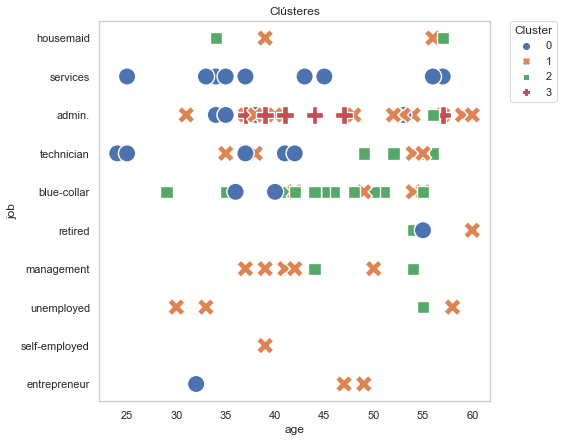

In [ ]:
scatter(df_clustering_hierarchical_4['age'],df_clustering_hierarchical_4['job'], df_clustering_hierarchical_4['clusters'])

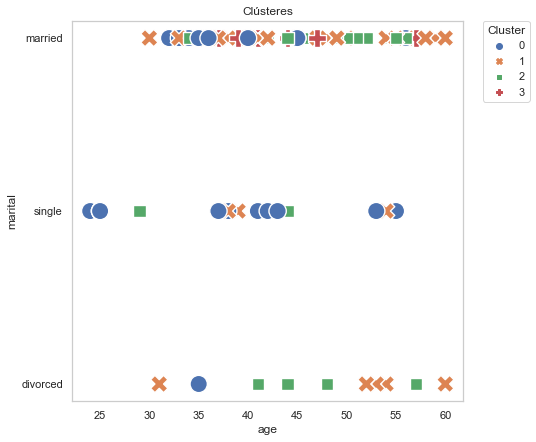

In [ ]:
scatter(df_clustering_hierarchical_4['age'],df_clustering_hierarchical_4['marital'], df_clustering_hierarchical_4['clusters'])

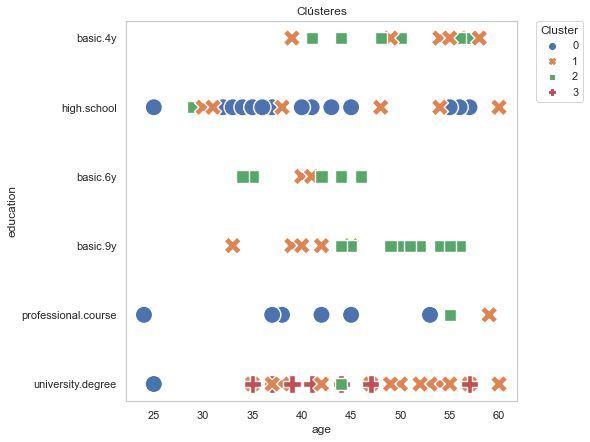

In [ ]:
scatter(df_clustering_hierarchical_4['age'],df_clustering_hierarchical_4['education'], df_clustering_hierarchical_4['clusters'])

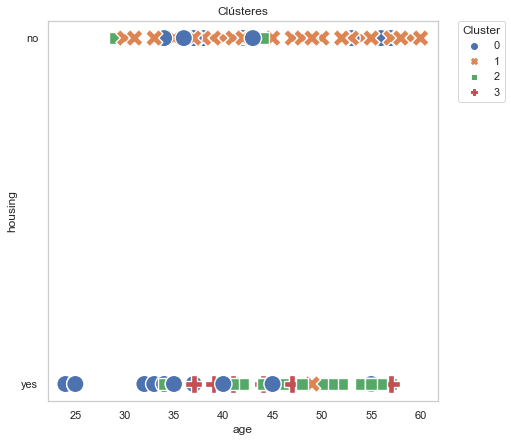

In [ ]:
scatter(df_clustering_hierarchical_4['age'],df_clustering_hierarchical_4['housing'], df_clustering_hierarchical_4['clusters'])

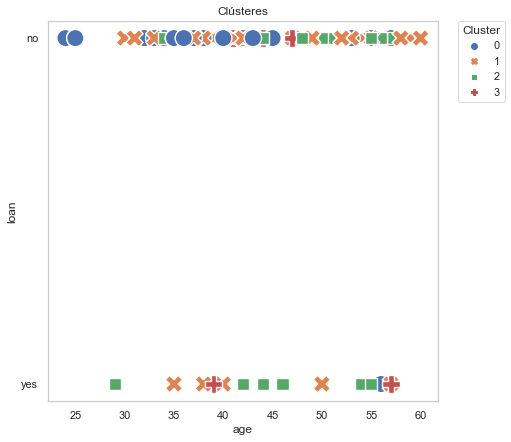

In [ ]:
scatter(df_clustering_hierarchical_4['age'],df_clustering_hierarchical_4['loan'], df_clustering_hierarchical_4['clusters'])

###### Conclusiones
Una vez realizadas las gráficas, podemos determinar lo siguiente:
   - El grupo 0 parece estar compuesto por personas generalmente con estudios de instituto o cursos profesionales, que no tienen un préstamo personal, que pueden estar casado o solteros, y en su mayoría están ocupados en trabjos de servicios, administración o técnicos. El rango de edad es relativamente joven, desde los 30 a los 45 principalmente.
   - El grupo 1 parece que su estado civil es principalente es casado, sin hipoteca ni préstamos, y con formación bastante diversa, aunque principalmente universitarios. Las ocupaciones también son bastante diversas. El rango de edad de este grupo es muy extenso.
   - El grupo 2 observamos que la educación principalmente es básica en sus distintas variantes, no tienen préstamos personales pero sí hipotecas, y su ocupación principalmente son trabajos manuales. Además la media de edad es alta.
   - El grupo 3 parece compuesto principalmente por personas con educación universitaria, aunque en este grupo el tipo de formación está bastante repartida, con hipoteca, sin préstamos personales, dedicados casi en exclusiva a trabajos de administración y un rango de edad entre los 35 y los 45 principalmente.

# Código no utilizado y notas

In [ ]:
# # Modelos de cluastering aglomerativos con diferentes Linkage's
# # ==============================================================================
# modelo_hclust_complete_2 = AgglomerativeClustering(
#                             affinity = 'euclidean',
#                             linkage  = 'complete',
#                             distance_threshold = 3,
#                             n_clusters         = None
#                         )
# modelo_hclust_complete_2.fit(X=df_clustering_scaled_dummy_100)

# modelo_hclust_average_2 = AgglomerativeClustering(
#                             affinity = 'euclidean',
#                             linkage  = 'average',
#                             distance_threshold = 3,
#                             n_clusters         = None
#                         )
# modelo_hclust_average_2.fit(X=df_clustering_scaled_dummy_100)

# modelo_hclust_ward_2 = AgglomerativeClustering(
#                             affinity = 'euclidean',
#                             linkage  = 'ward',
#                             distance_threshold = None,
#                             n_clusters         = 10,
#                             compute_distances = True
#                      )
# modelo_hclust_ward_2.fit(X=df_clustering_scaled_dummy_100)

AgglomerativeClustering(compute_distances=True, n_clusters=10)

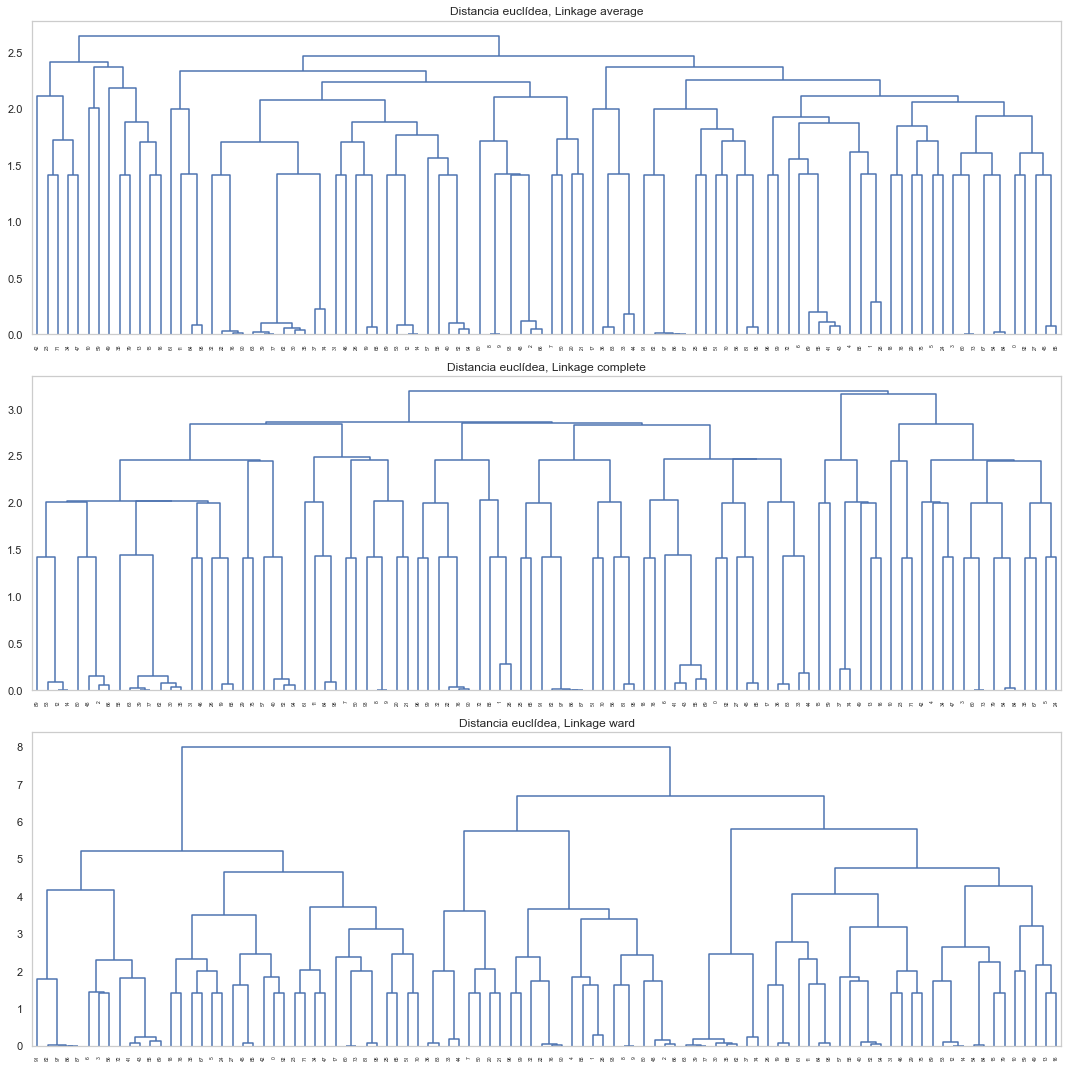

In [ ]:
# # Dendrogramas
# # ==============================================================================
# fig, axs = plt.subplots(3, 1, figsize=(15, 15))
# plot_dendrogram(modelo_hclust_average_2, color_threshold=0, ax=axs[0])
# axs[0].set_title("Distancia euclídea, Linkage average")
# plot_dendrogram(modelo_hclust_complete_2, color_threshold=0, ax=axs[1])
# axs[1].set_title("Distancia euclídea, Linkage complete")
# plot_dendrogram(modelo_hclust_ward_2, color_threshold=0, ax=axs[2])
# axs[2].set_title("Distancia euclídea, Linkage ward")
# plt.tight_layout();




##### Clustering basado en densidad


In [ ]:
# # Clustering basado en densidad
# # ==============================================================================

# from sklearn.cluster import DBSCAN


# modelo_dbscan = DBSCAN(
#                     eps          = 0.5,
#                     min_samples  = 2,
#                     metric       = 'euclidean',
#                 )

# modelo_dbscan.fit(X=df_clustering_scaled_dummy_100_reduced)

# labels = modelo_dbscan.labels_

# # Número de clusters y observaciones "outliers"
# # ==============================================================================
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise    = list(labels).count(-1)

# print(f'Número de clusters encontrados: {n_clusters}')
# print(f'Número de outliers encontrados: {n_noise}')

In [ ]:
# # Número de clusters y observaciones "outliers"
# # ==============================================================================
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise    = list(labels).count(-1)

# print(f'Número de clusters encontrados: {n_clusters}')
# print(f'Número de outliers encontrados: {n_noise}')

In [ ]:
# # https://www.cienciadedatos.net/documentos/py19-pca-python.html

## Dudas

##### Para que se usa .target() cuando se carga el dataset? Entiendo que es porque el dataset que viene en las librerías no viene con la variable target, por eso tienes que especificar el target en otra variable y añadirla.
##### La forma para calcular la correlación con variables categóricas es usando por ejemplo el test de chi2 con la variable a estudiar y la variable objetivo no?
##### 


In [ ]:
# # df['job','marital', 'education'].hist()
# fig, (ax0, ax1, ax2, ax3) = plt.subplots( nrows=4, figsize=(20,20), tight_layout = True)


# # ax0.hist(df['job'])
# # sns.barplot(x = value[0:7], y=value_2[0:7])
# # ax0.set_xticklabels(df['job'].unique(),rotation= 45)
# sns.barplot(x = value[0:7], y=value_2[0:7])
# df['job'].hist(ax=ax0, xrot=45, bins=len(df['job'].unique()), width=0.3, )
# # plt.plot(position = 0, title = 'mytitle', fontsize = 30, width=0.3, align ='center')


# ax1.set_title('Marital')
# df['marital'].value_counts().plot(kind='bar',ax=ax1, position = 0, title = 'mytitle', fontsize = 30, width=0.3, align ='center')

# ax2.set_title('Education')
# df['education'].value_counts().plot(kind='bar',ax=ax2, position = 0, title = 'mytitle', fontsize = 30, width=0.3, align ='center')

# ax3.set_title('Yes')
# df['y'].value_counts().plot(kind='bar',ax=ax3, position = 0, title = 'mytitle', fontsize = 30, width=0.3, align ='center')


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA()

# pca.fit(df_normalized_encoded.iloc[:,:-1])
# X = pca.transform(df_normalized_encoded.iloc[:,:-1])
# print(pca.components_)

# print(pca.explained_variance_)
# print(pca.components_)
# print(pca.explained_variance_ratio_)

# np.cumsum(pca.explained_variance_ratio_)

# pd.DataFrame(
#     data    = pca.components_,
#     columns = df_normalized_encoded.columns[:-1],
#     index   = ['componente ' + str(i) for i, x in enumerate(df_normalized_encoded.columns[:-1])]
# )

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

# # https://www.cienciadedatos.net/documentos/py19-pca-python.html

# # Porcentaje de varianza explicada por cada componente
# # ==============================================================================
# print('----------------------------------------------------')
# print('Porcentaje de varianza explicada por cada componente')
# print('----------------------------------------------------')
# print(pca.explained_variance_ratio_)

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
# ax.bar(
#     x      = np.arange(pca.n_components_) + 1,
#     height = pca.explained_variance_ratio_
# )

# for x, y in zip(np.arange(len(df_normalized_encoded.columns[:-1])) + 1, pca.explained_variance_ratio_):
#     label = round(y, 2)
#     ax.annotate(
#         label,
#         (x,y),
#         textcoords="offset points",
#         xytext=(0,10),
#         ha='center'
#     )

# ax.set_xticks(np.arange(pca.n_components_) + 1)
# ax.set_ylim(0, 1.1)
# ax.set_title('Porcentaje de varianza explicada por cada componente')
# ax.set_xlabel('Componente principal')
# ax.set_ylabel('Por. varianza explicada');

# componentes = ['componente ' + str(x) for x in range(14)]
# componentes

# df_PCA = pd.DataFrame(data = X, columns = ['PC' + str(i) for i, x in enumerate(df_normalized_encoded.columns[:-1])])
# df_PCA

# df_PCA['y']=df_normalized_encoded['y']
# df_PCA.head(5)